In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from scipy.integrate import solve_ivp
from scipy import optimize
import seaborn as sns
from shelllock import PyCCELL_PRFQT as px

In [2]:
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (8,5)
sns.set_palette("colorblind")

In [3]:
def endpoint(df):
    end_point = pd.DataFrame(df.max(axis=0))
    end_point = end_point.T
    end_point= end_point.drop(columns=[i for i in end_point.columns if 'Time'in i or'NC'in i or'std' in i])
    return end_point

In [2]:
targets = px.mainf('../../data/040122.xlsx'
               ,1,'col',['E15','F15','G15'])

'''
pour le gain c'est 

0: le premier que tu as mis
1: le 2eme
2: le 3 eme
3: le 4 eme

''' 

"\npour le gain c'est \n\n0: le premier que tu as mis\n1: le 2eme\n2: le 3 eme\n3: le 4 eme\n\n"

In [53]:
# For the correction 

correction = [186,2100,3410,283567] # correction pour 50,70,75,100 de gain et sur le synergy 

# apres tu peux faire

#c = [x for x in targets.columns if x != 'Time'] # columns to be corrected
#targets = targets[c]/correction[x] 

In [3]:
targets

['B2', 'C2', 'D2']  ['E2', 'F2', 'G2']  ['B3', 'C3', 'D3']  \
0                  0.0                 0.0            0.000000   
1                  0.0                 0.0            0.000000   
2                  0.0                 0.0            0.000000   
3                  0.0                 0.0            0.000000   
4                  0.0                 0.0            0.000000   
5                  0.0                 0.0            0.000000   
6                  0.0                 0.0            0.000000   
7                  0.0                 0.0            0.000000   
8                  0.0                 0.0            0.000000   
9                  0.0                 0.0            0.000000   
10                 0.0                 0.0            0.000000   
11                 0.0                 0.0            0.000000   
12                 0.0                 0.0            0.000000   
13                 0.0                 0.0            0.000000   
14                 0.0                 0.0            0.000000   
15                 0.0                 0.0            0.000000   
16                 0.0                 0.0            0.000000   
17                 0.0                 0.0            0.000000   
18                 0.0                 0.0            0.000000   
19                 0.0                 0.0            0.000000   
20                 0.0                 0.0            0.000000   
21                 0.0                 0.0            0.000000   
22                 0.0                 0.0           52.333333   
23                 0.0                 0.0            0.000000   
24                 0.0                 0.0            0.000000   
25                 0.0                 0.0            0.000000   
26                 0.0                 0.0           53.666667   
27                 0.0                 0.0            0.000000   
28                 0.0                 0.0            0.000000   
29                 0.0                 0.0            0.000000   
30                 0.0                 0.0            0.000000   
31                 0.0                 0.0            0.000000   
32                 0.0                 0.0            0.000000   

    ['E3', 'F3', 'G3']  ['B4', 'C4', 'D4']  ['E4', 'F4', 'G4']  \
0             0.000000         2385.666667            0.000000   
1             0.000000            0.000000            0.000000   
2             0.000000            0.000000            0.000000   
3             0.000000            0.000000            0.000000   
4             0.000000            0.000000            0.000000   
5             0.000000            0.000000            0.000000   
6             0.000000            0.000000            0.000000   
7             0.000000            0.000000            0.000000   
8             0.000000            0.000000            0.000000   
9             0.000000            0.000000            0.000000   
10            0.000000            0.000000            0.000000   
11            0.000000            0.000000            0.000000   
12           12.000000            0.000000            0.000000   
13          626.666667          368.666667            0.000000   
14          846.333333         1047.333333            0.000000   
15         1898.666667         1636.000000            0.000000   
16         2203.666667         1830.000000            0.000000   
17         2389.333333         2065.333333            0.000000   
18         3230.333333         3451.666667            0.000000   
19         4033.000000         3710.666667            0.000000   
20         4385.333333         4491.666667          439.666667   
21         4441.000000         3872.000000           56.333333   
22         4767.333333         4361.000000          520.666667   
23         4512.333333         4507.666667          174.333333   
24         4295.666667         4182.666667            0.000000   
25         4464.666667         4104.000000 

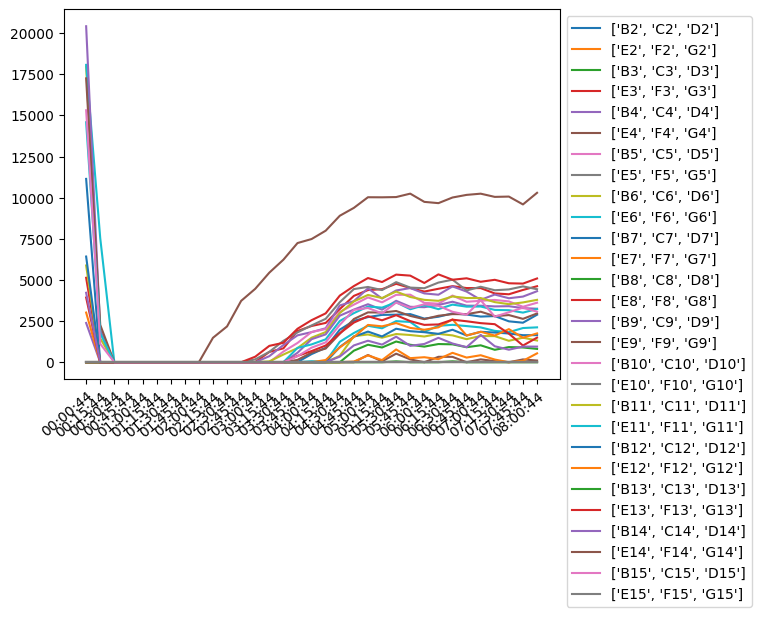

In [4]:
for i in targets.columns:
    if i != 'Time' and type(i) != int:
        targets[i].plot()
  
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(targets.index.values,targets.Time,rotation=40,rotation_mode="anchor",ha='right')
plt.show()

## Rename all the columns using the text file containing the well plan

In [5]:
# Open the file 

name = pd.ExcelFile('../../data/well_plate_040122.xlsx') 
     
test = pd.DataFrame(name.parse(0))

# remove first column

test.drop(test.columns[0],axis=1,inplace=True)

In [6]:
# get the name of all conditions tested
names = [x for x in test.values.flatten() if str(x) != 'nan' ]

# take only one of the repeated names (the name of the triplicate)
n = [names[0]]

for i in names:
    if i not in n:
        n.append(i)

# create the sd names 
sd = [x +"_sd" for x in n]

# add the time column 

n = np.append(n,['Time'])
n = np.append(n,sd)

In [7]:
# rename the columns 

for i in range(len(targets.columns)):
    targets.rename(columns={targets.columns[i]:n[i]},inplace=True)
    
targets.columns

Index(['toxR_1.1', 'toxR_1.3', 'toxR_1.5', 'toxR_2.2', 'toxR_2.4', 'toxR_3.1',
       'toxR_3.3', 'toxR_3.5', 'toxR_4.2', 'toxR_4.4', 'toxR_5.1', 'toxR_5.3',
       'toxR_5.5', 'toxR', 'toxR_1.2', 'toxR_1.4', 'toxR_2.1', 'toxR_2.3',
       'toxR_2.5', 'toxR_3.2', 'toxR_3.4', 'toxR_4.1', 'toxR_4.3', 'toxR_4.5',
       'toxR_5.2', 'toxR_5.4', 'PC', 'NC', 'Time', 'toxR_1.1_sd',
       'toxR_1.3_sd', 'toxR_1.5_sd', 'toxR_2.2_sd', 'toxR_2.4_sd',
       'toxR_3.1_sd', 'toxR_3.3_sd', 'toxR_3.5_sd', 'toxR_4.2_sd',
       'toxR_4.4_sd', 'toxR_5.1_sd', 'toxR_5.3_sd', 'toxR_5.5_sd', 'toxR_sd',
       'toxR_1.2_sd', 'toxR_1.4_sd', 'toxR_2.1_sd', 'toxR_2.3_sd',
       'toxR_2.5_sd', 'toxR_3.2_sd', 'toxR_3.4_sd', 'toxR_4.1_sd',
       'toxR_4.3_sd', 'toxR_4.5_sd', 'toxR_5.2_sd', 'toxR_5.4_sd', 'PC_sd',
       'NC_sd'],
      dtype='object')

# Plotting

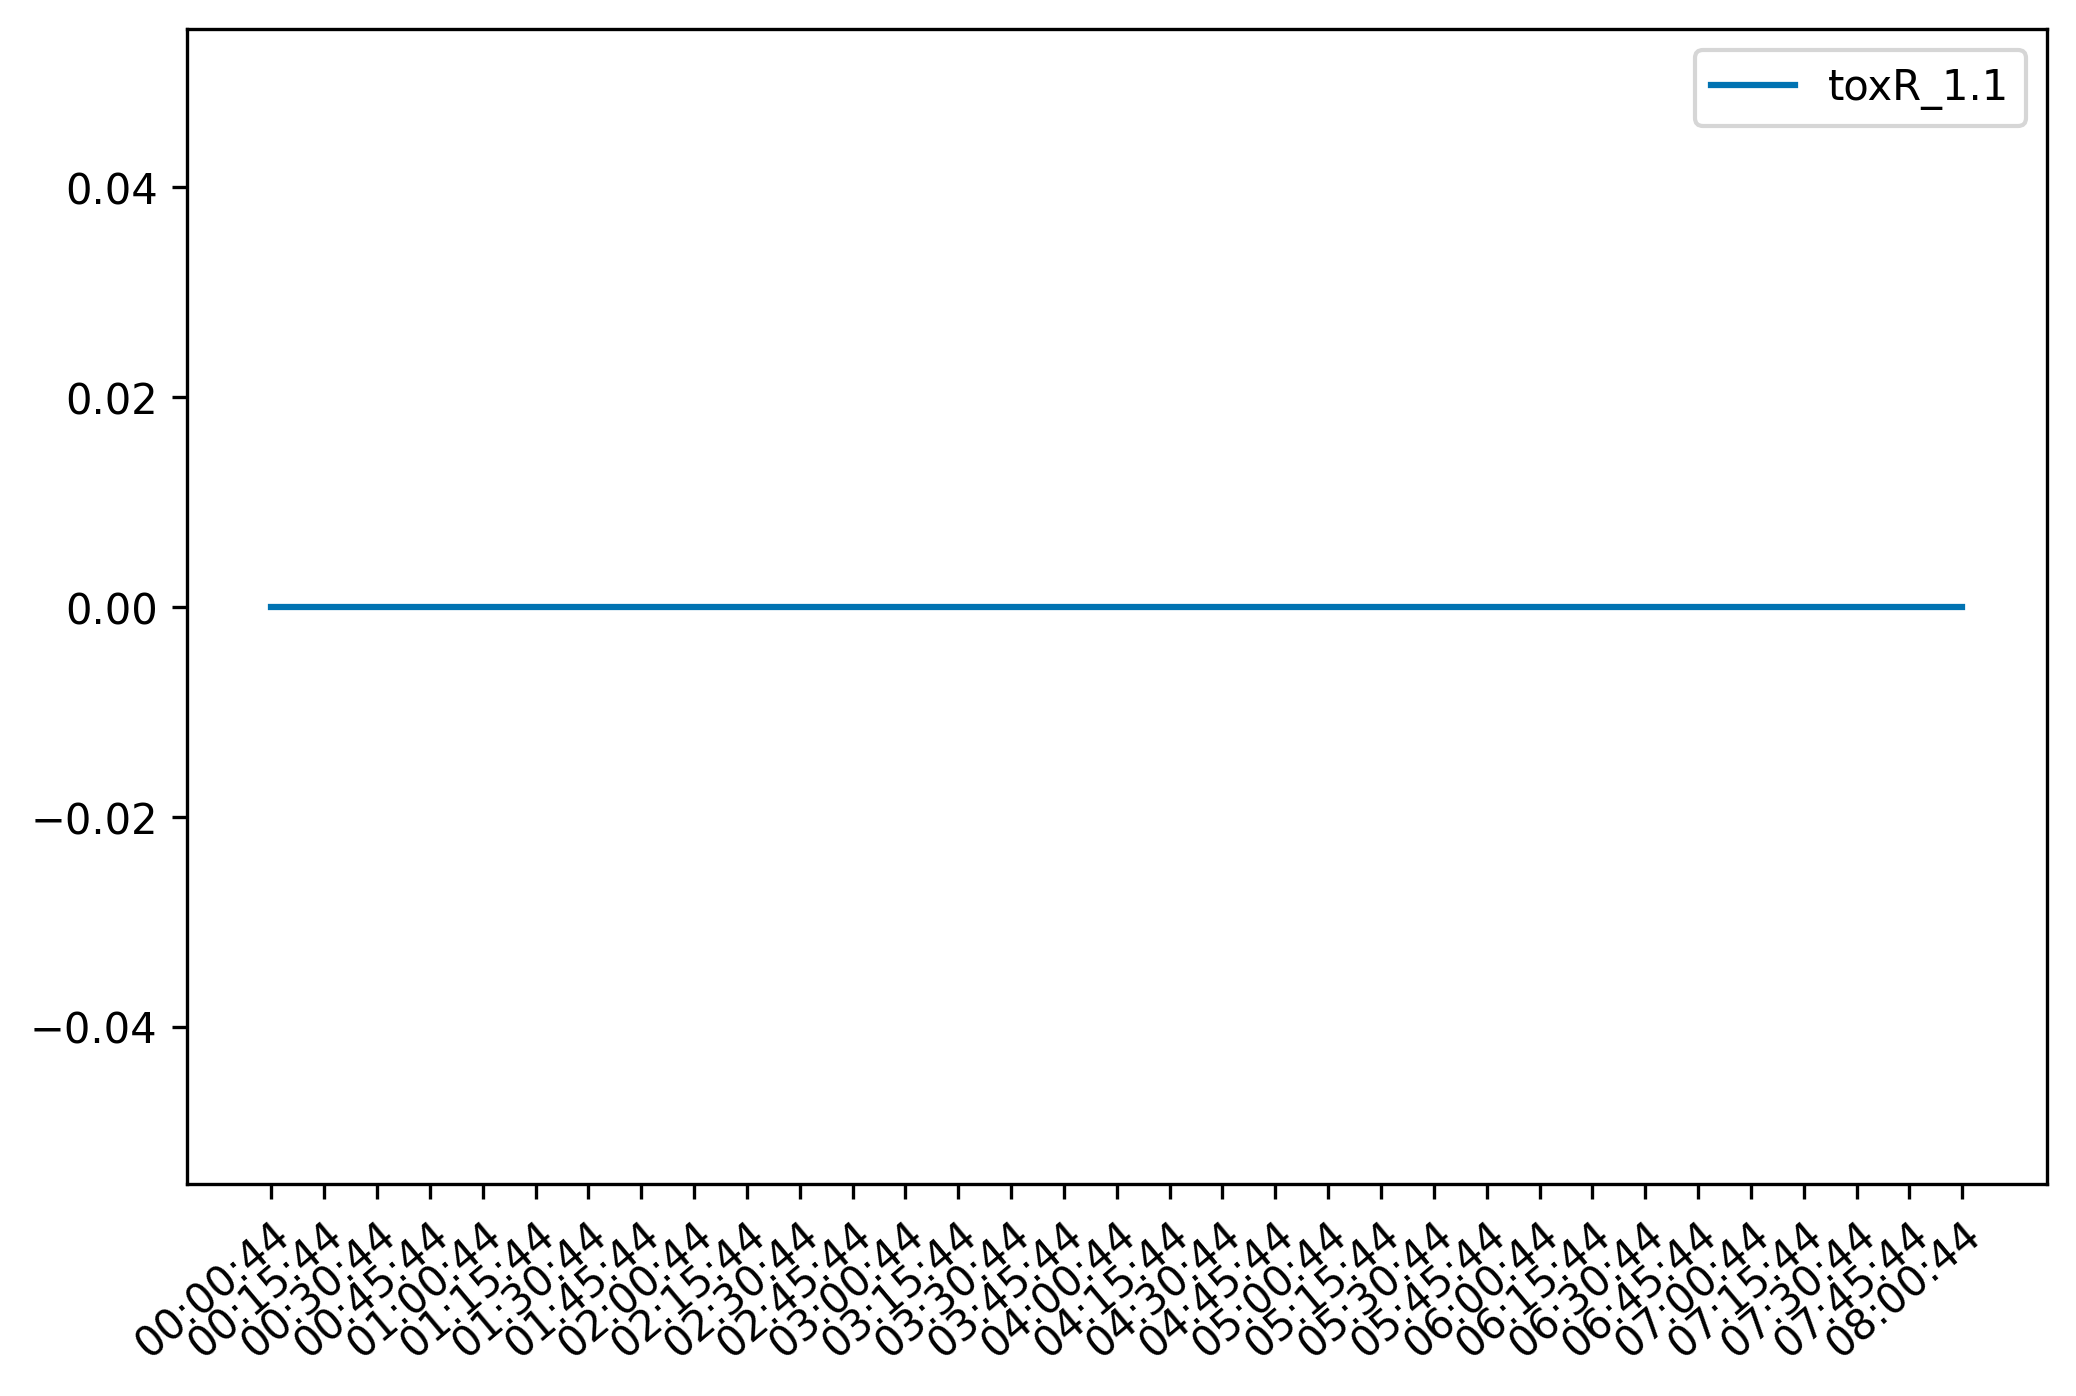

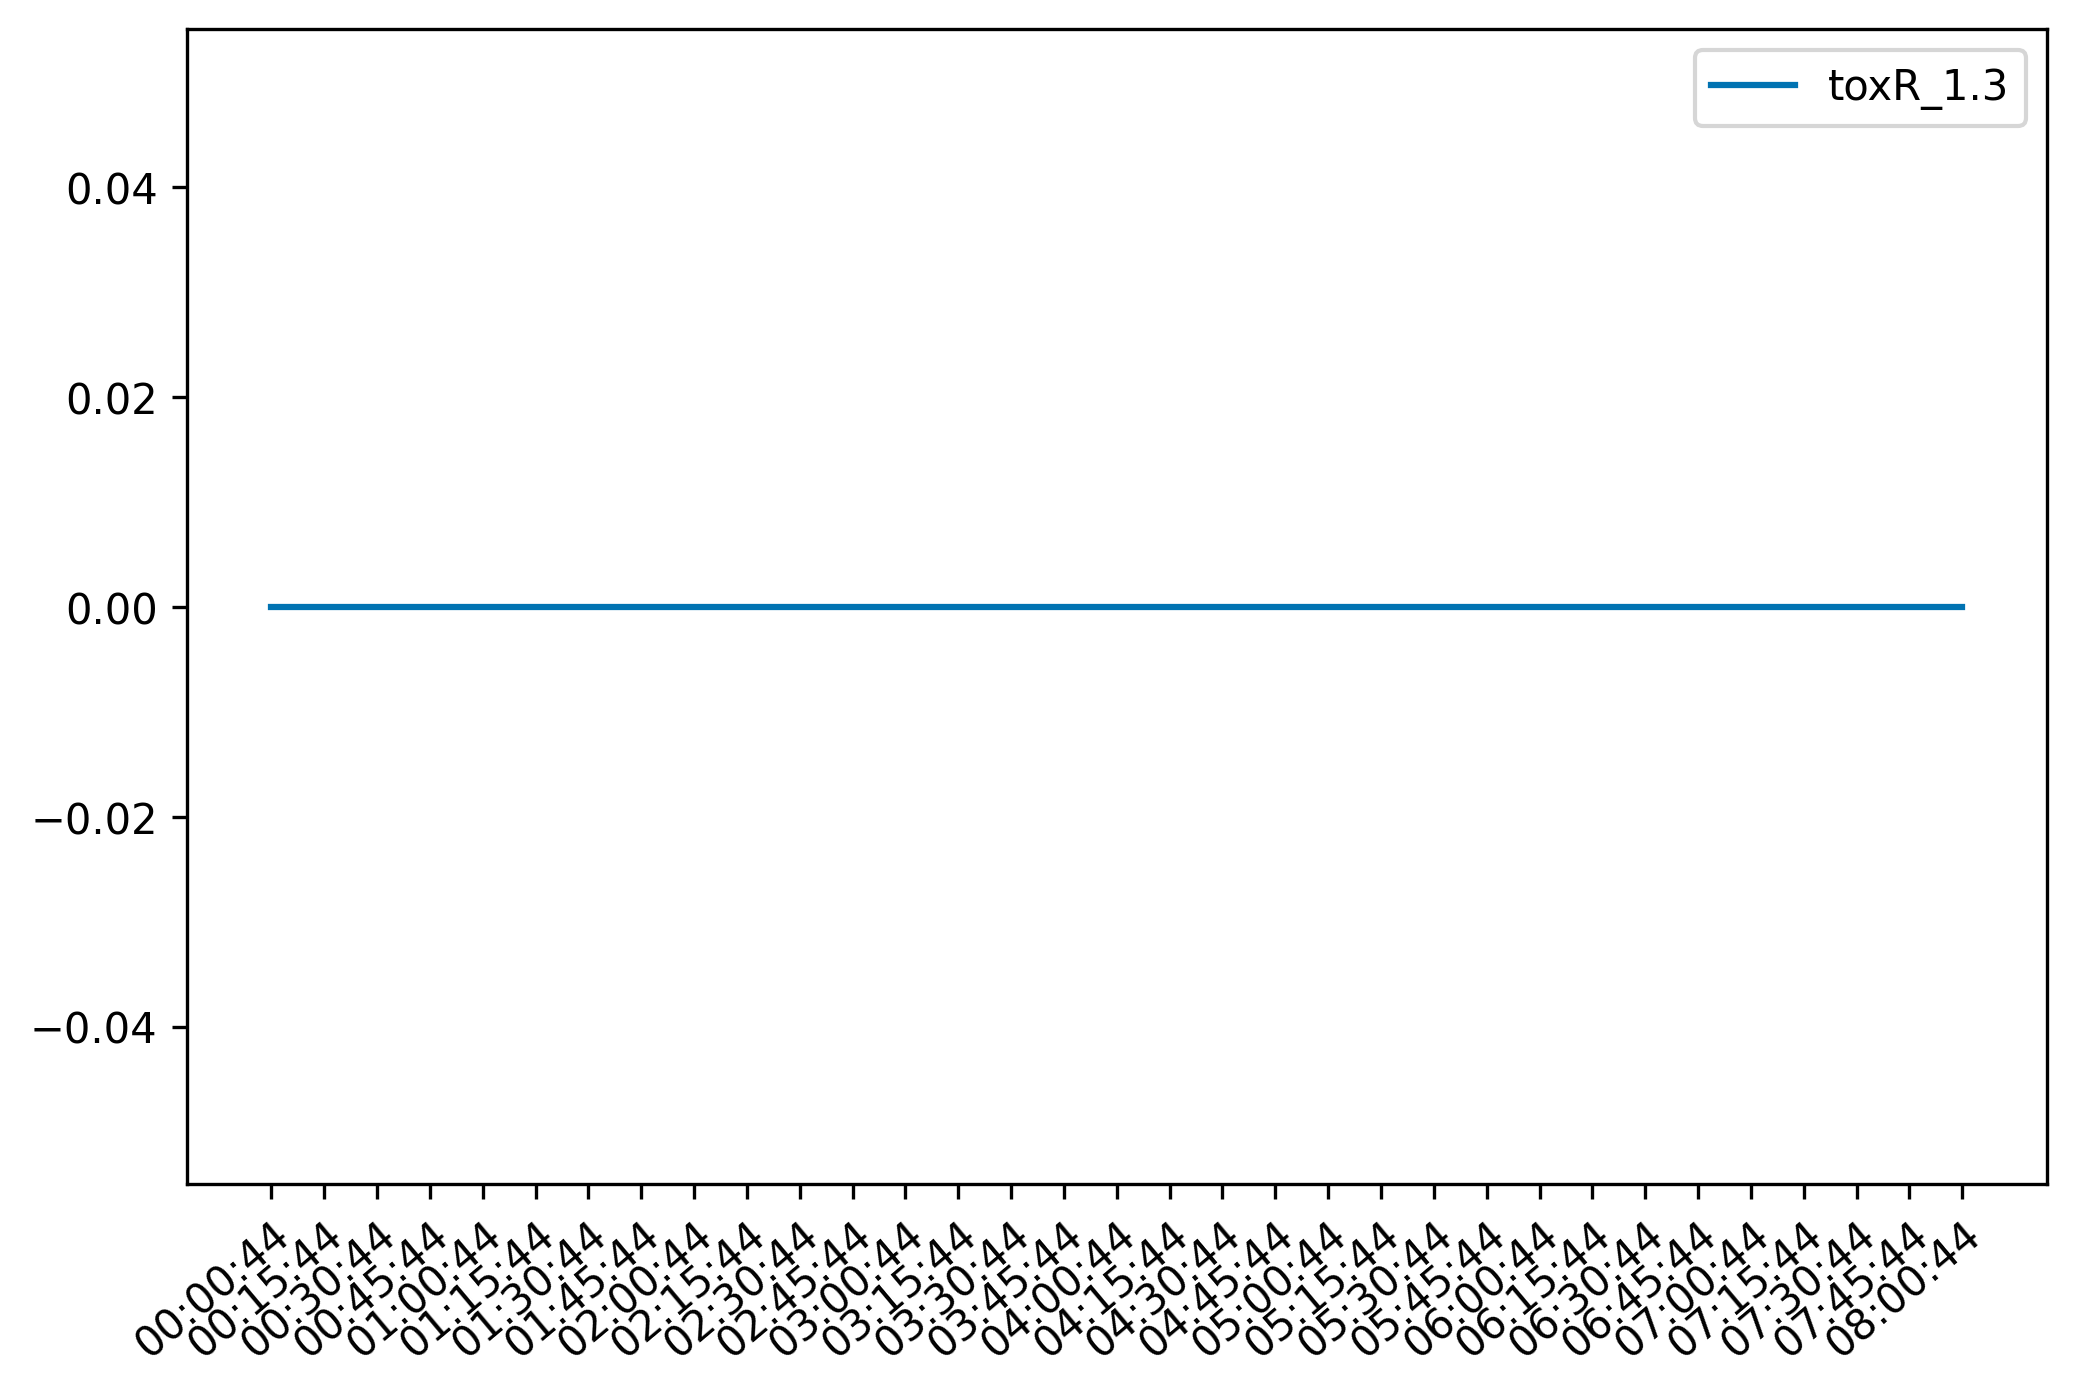

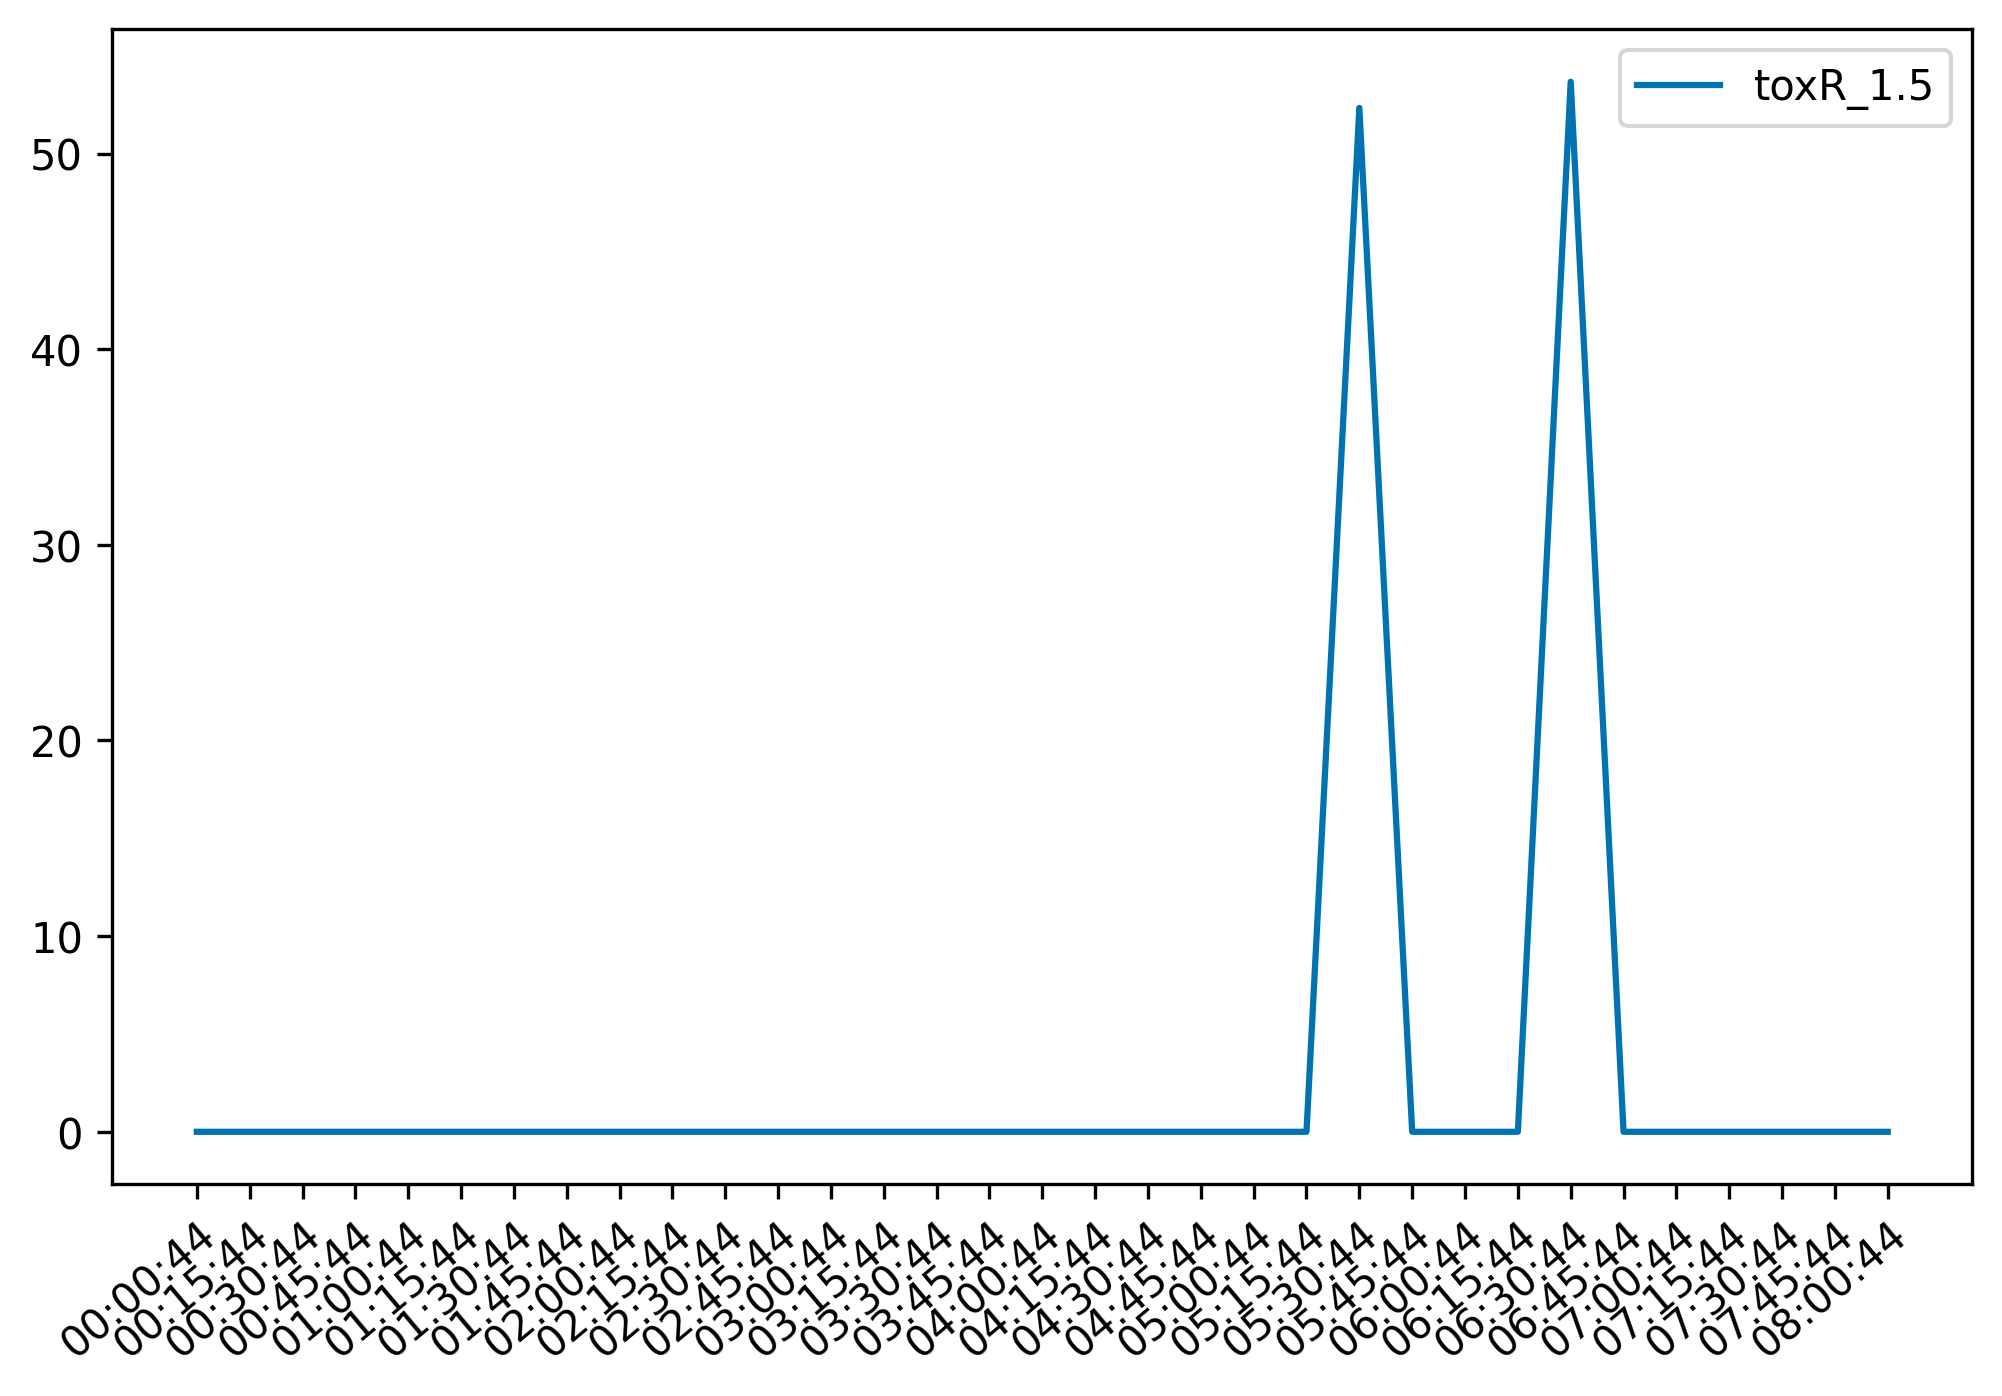

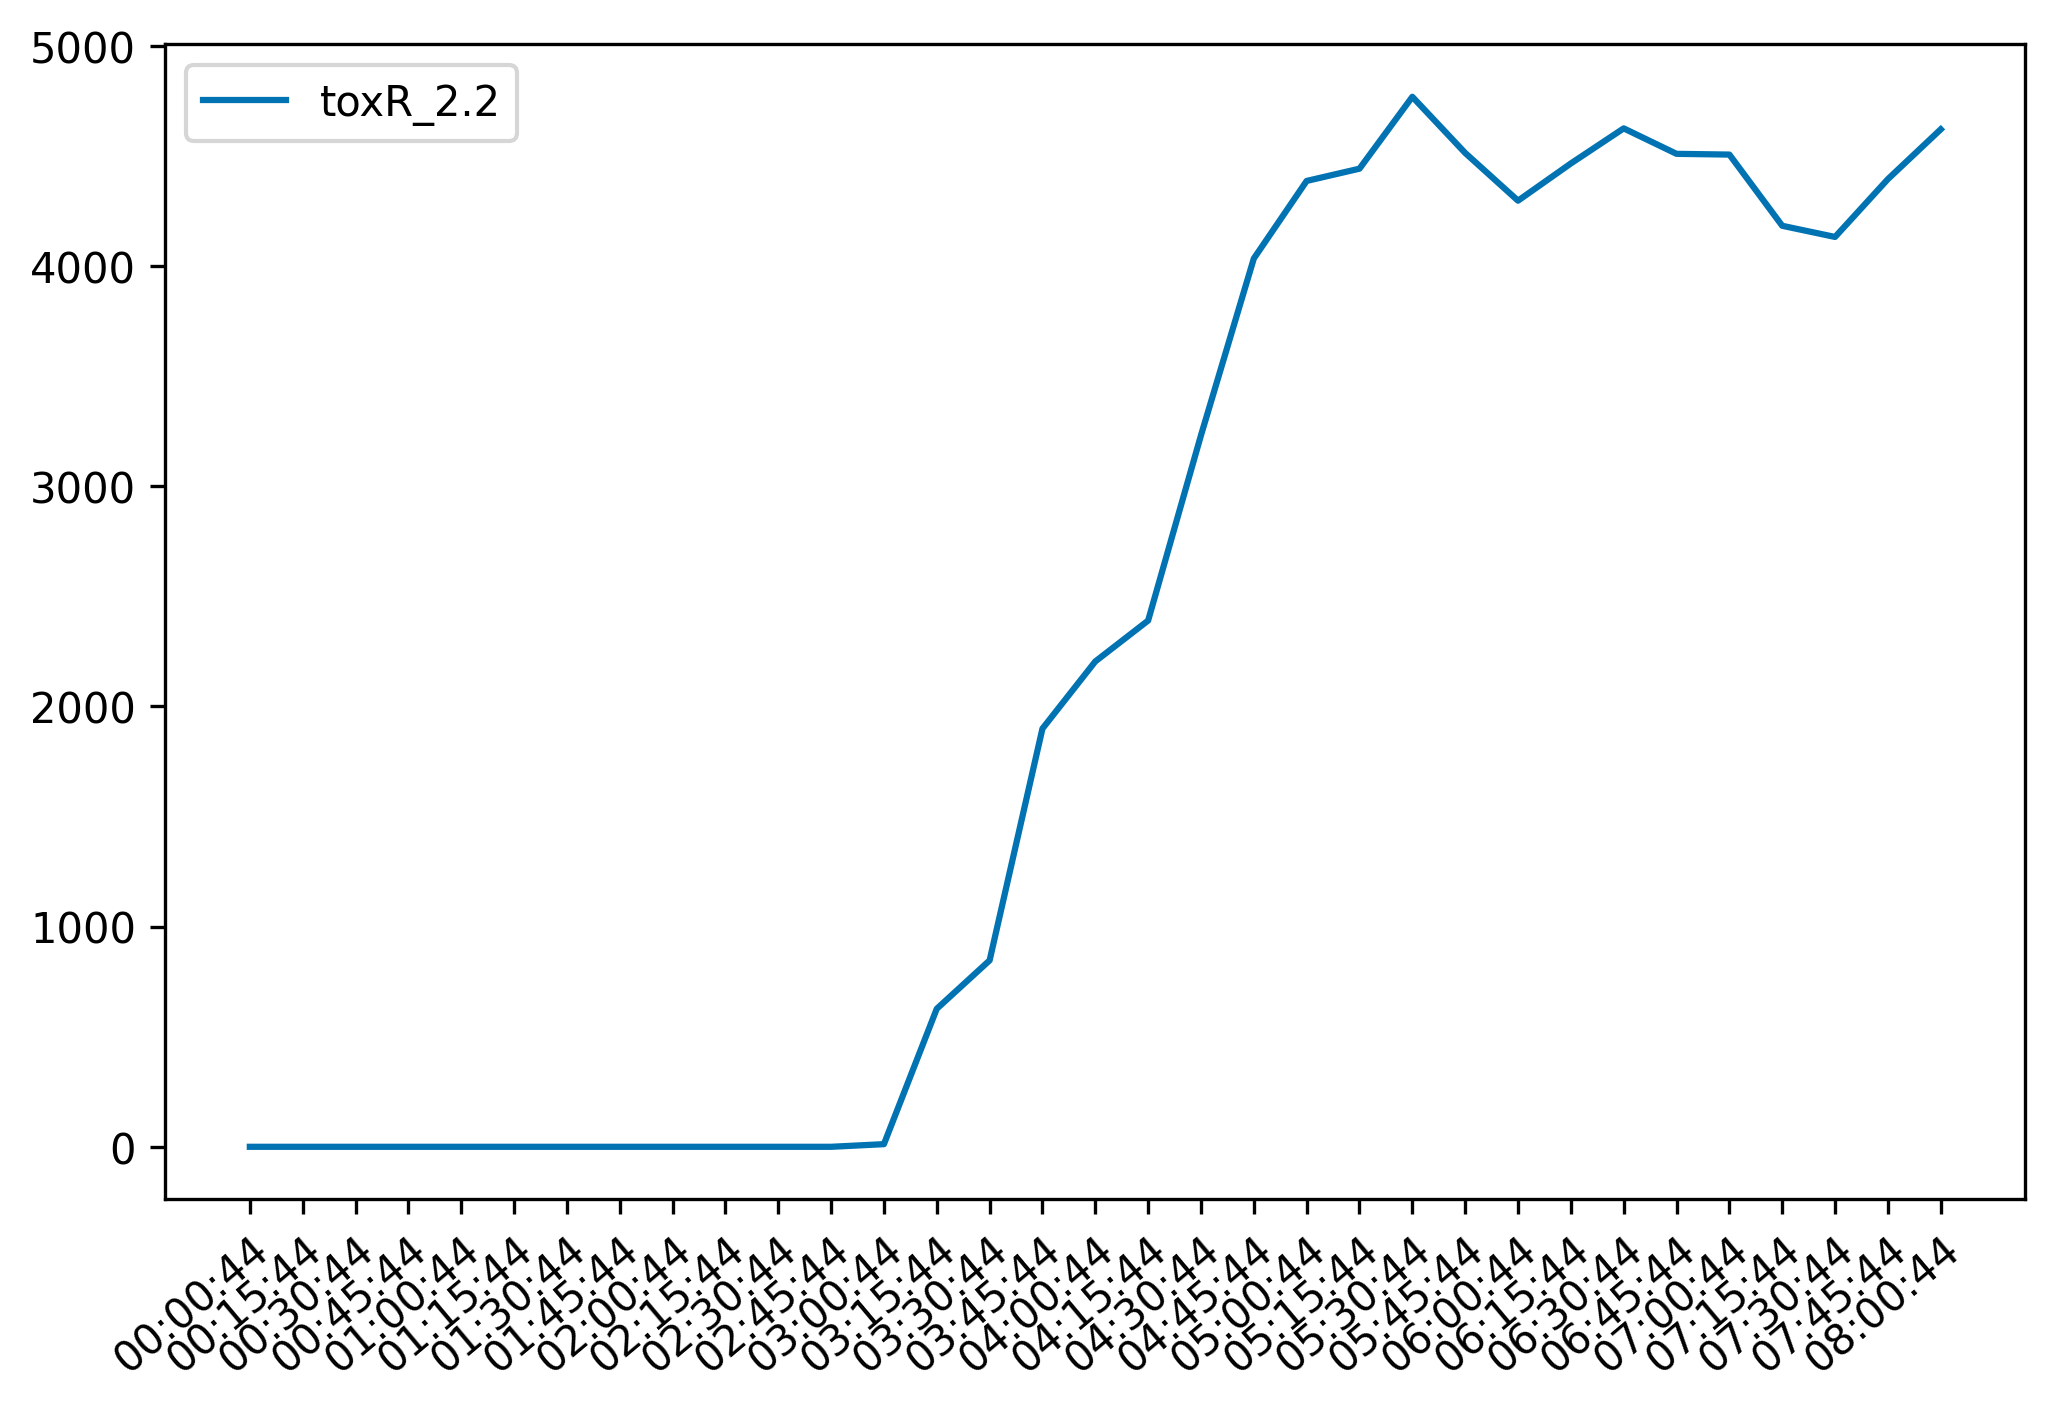

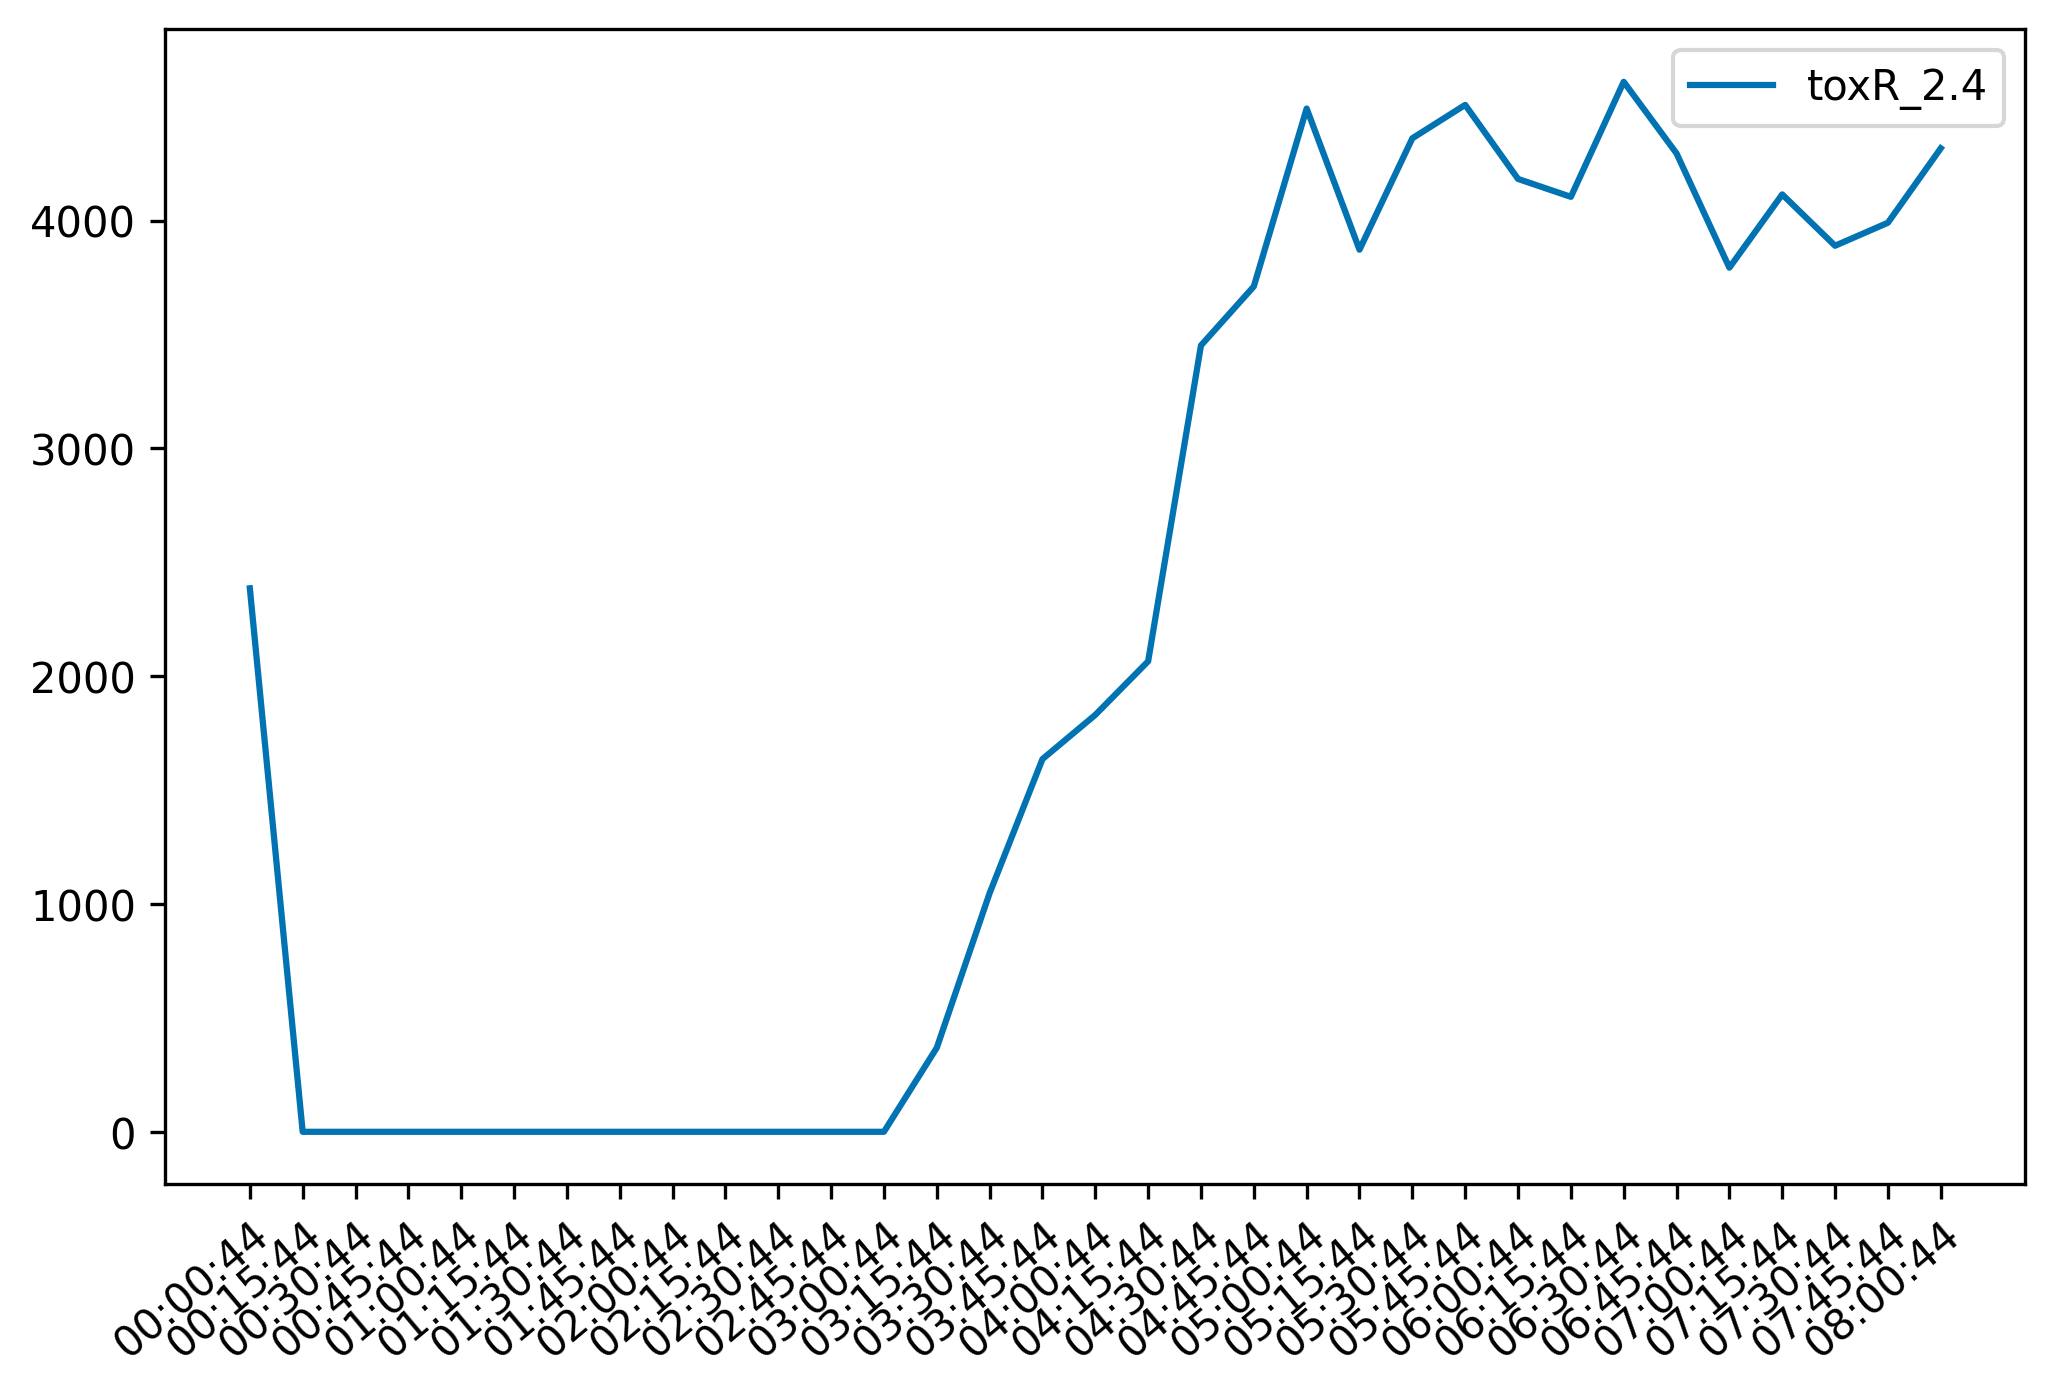

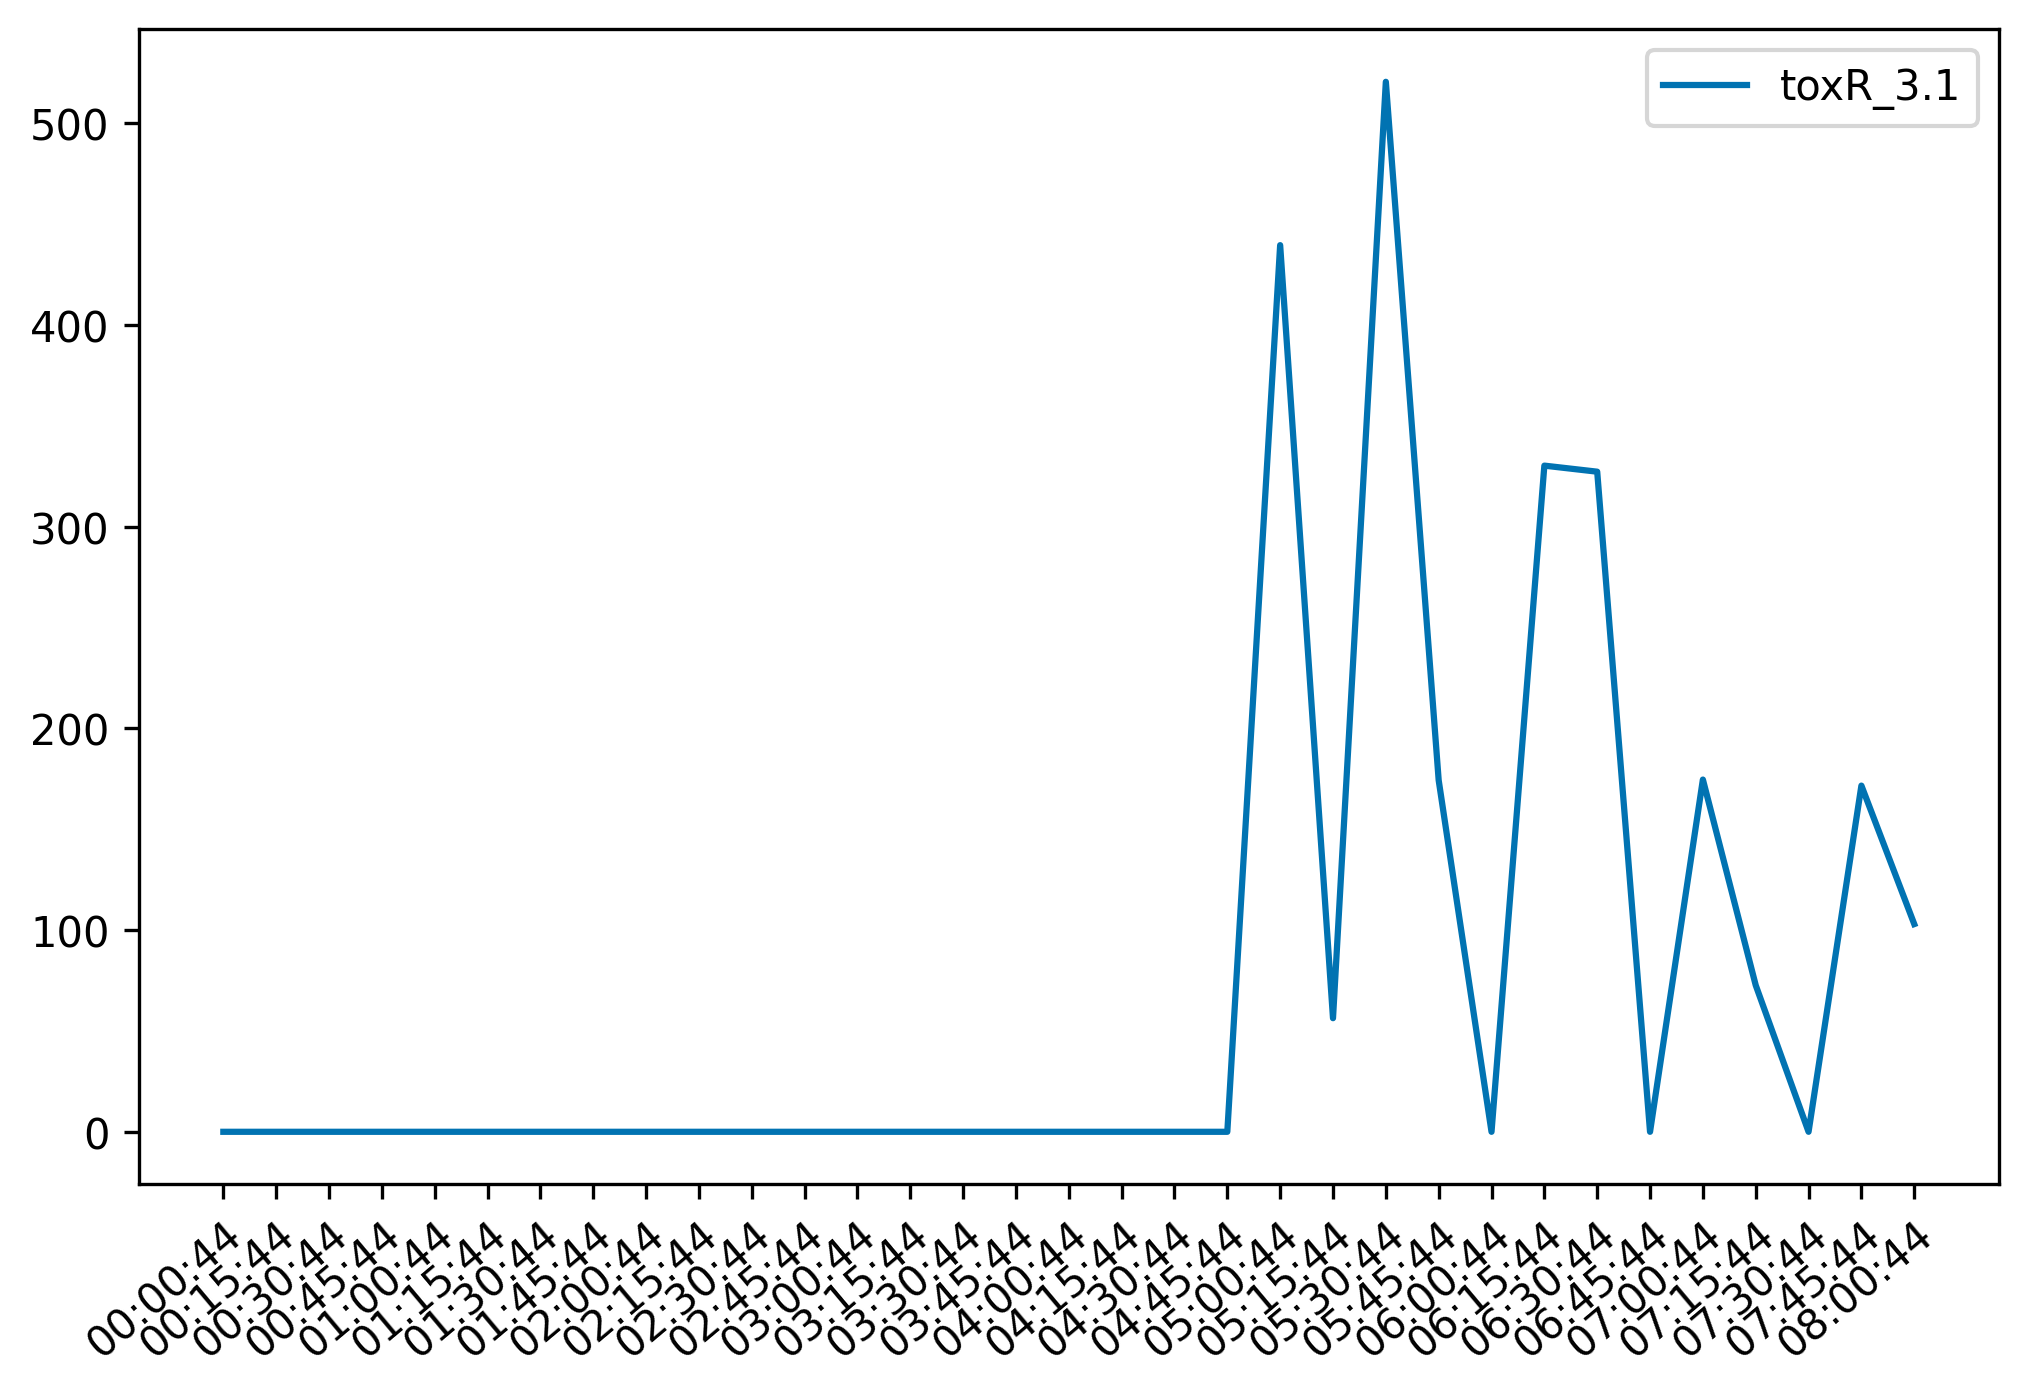

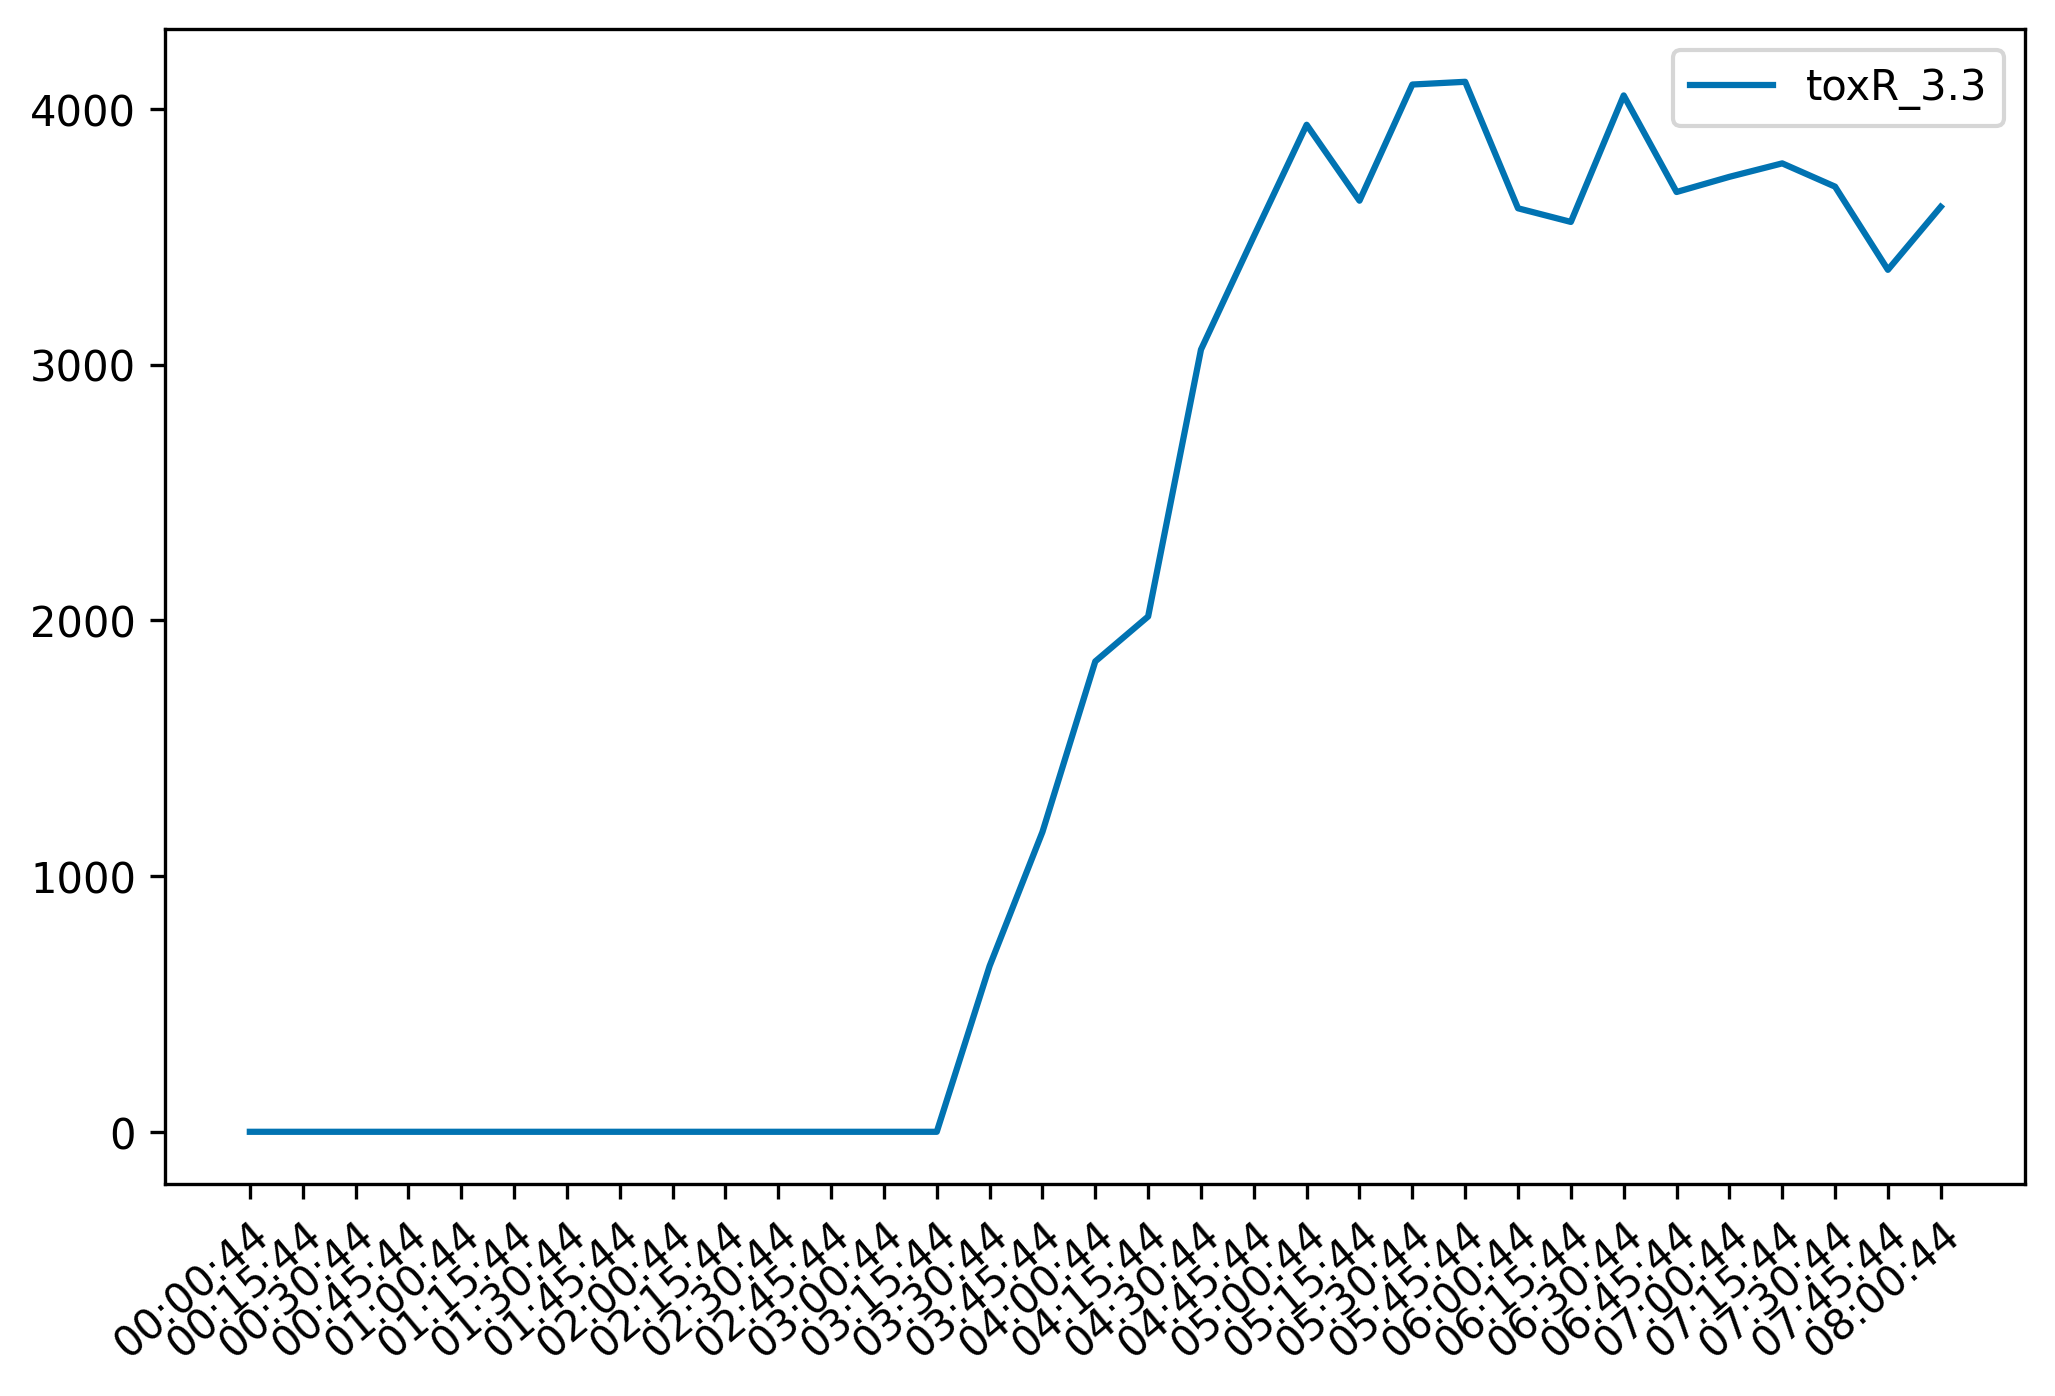

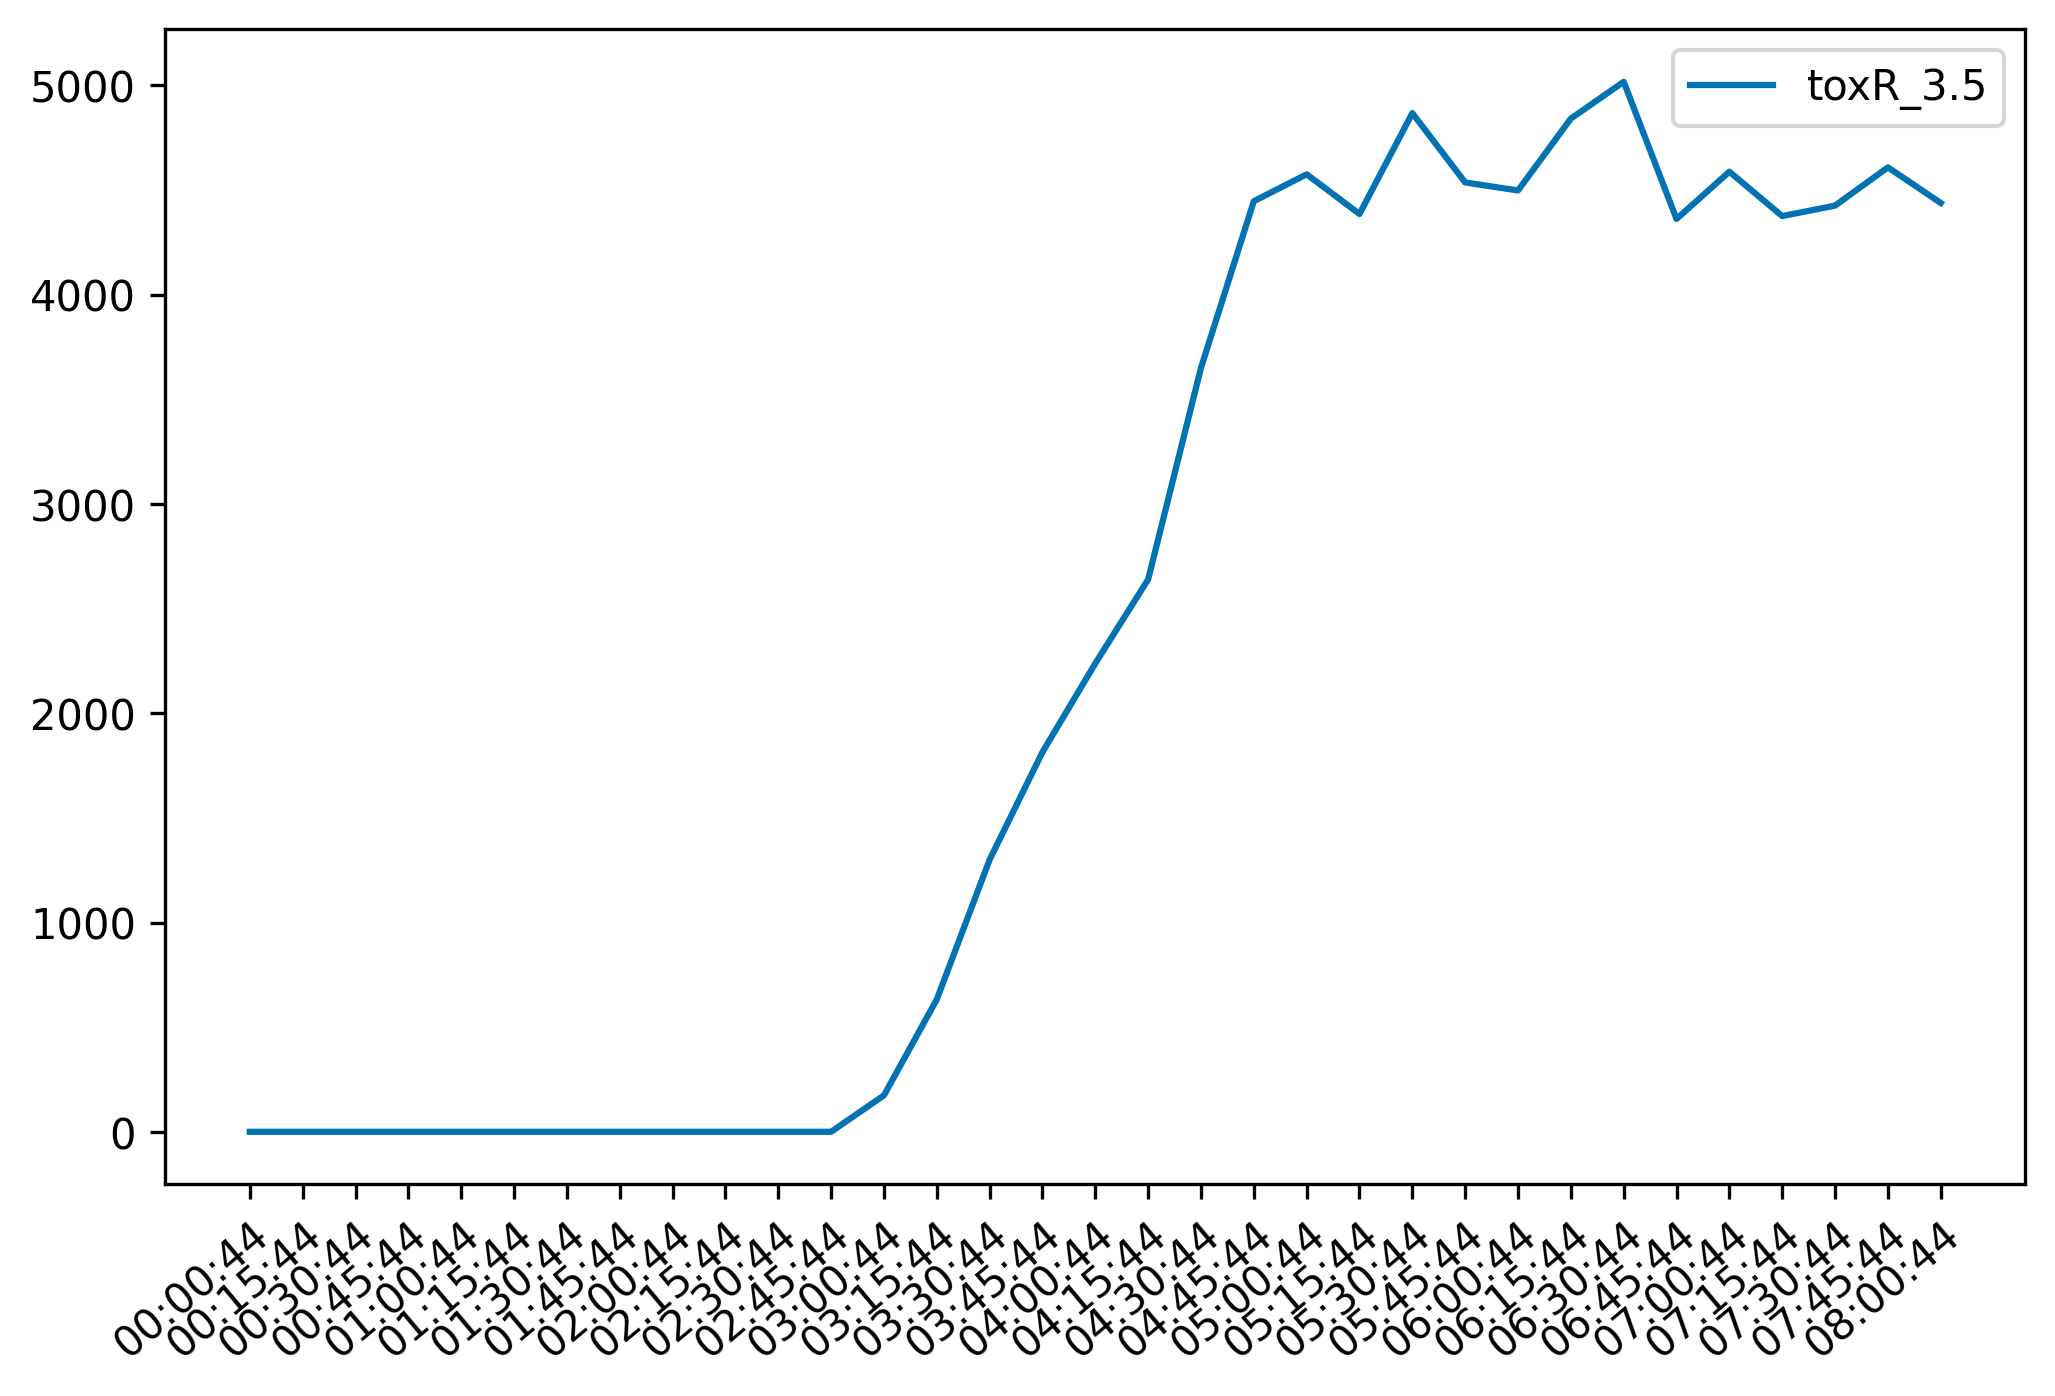

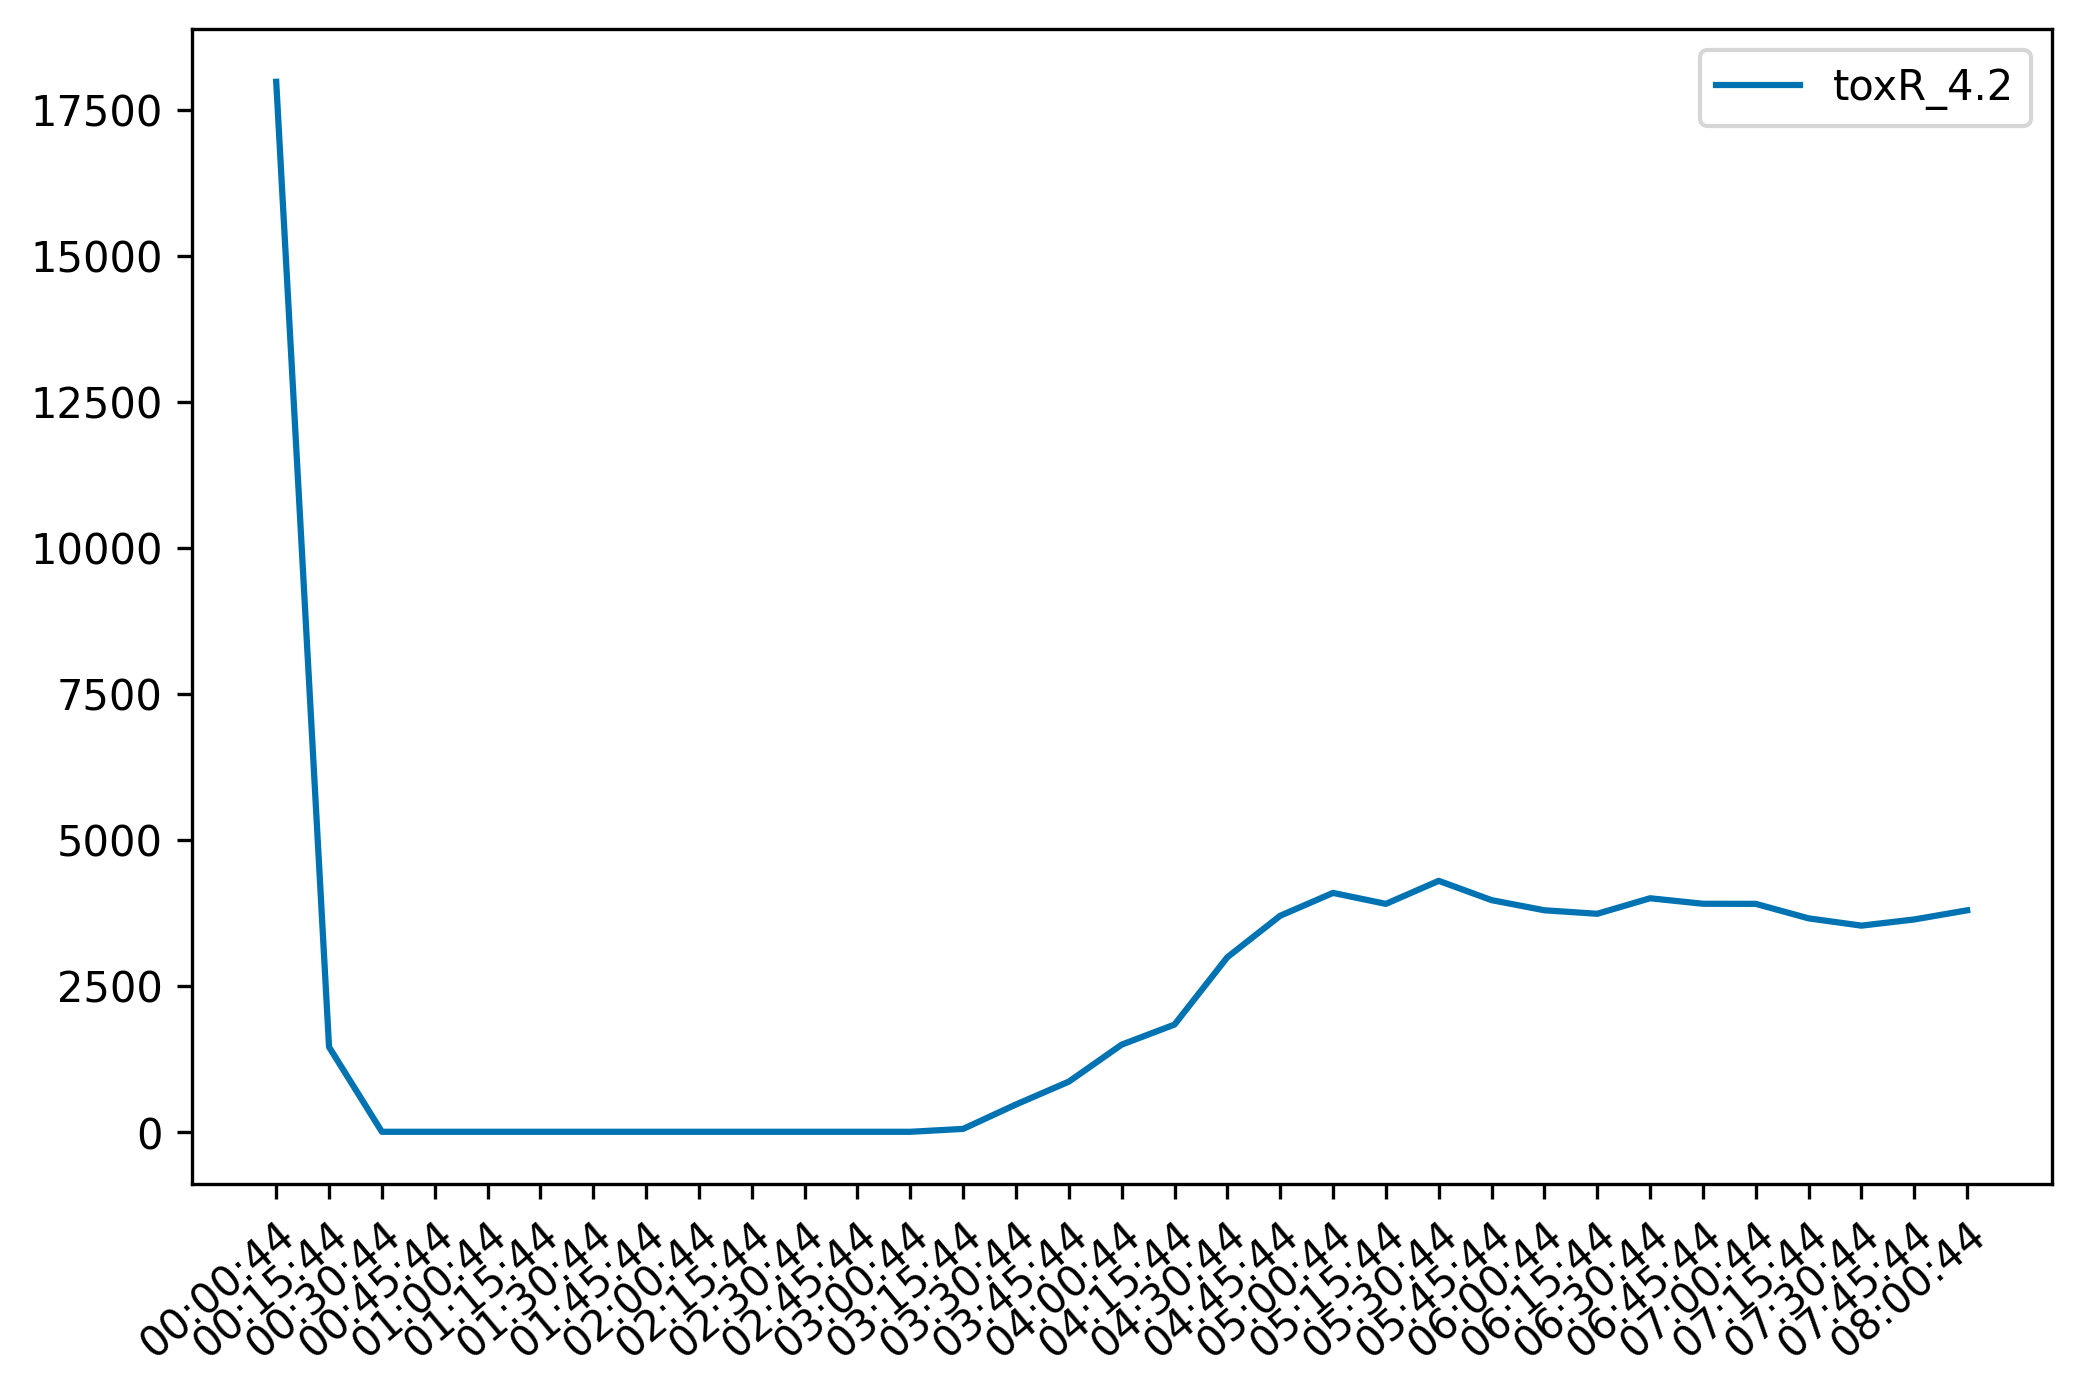

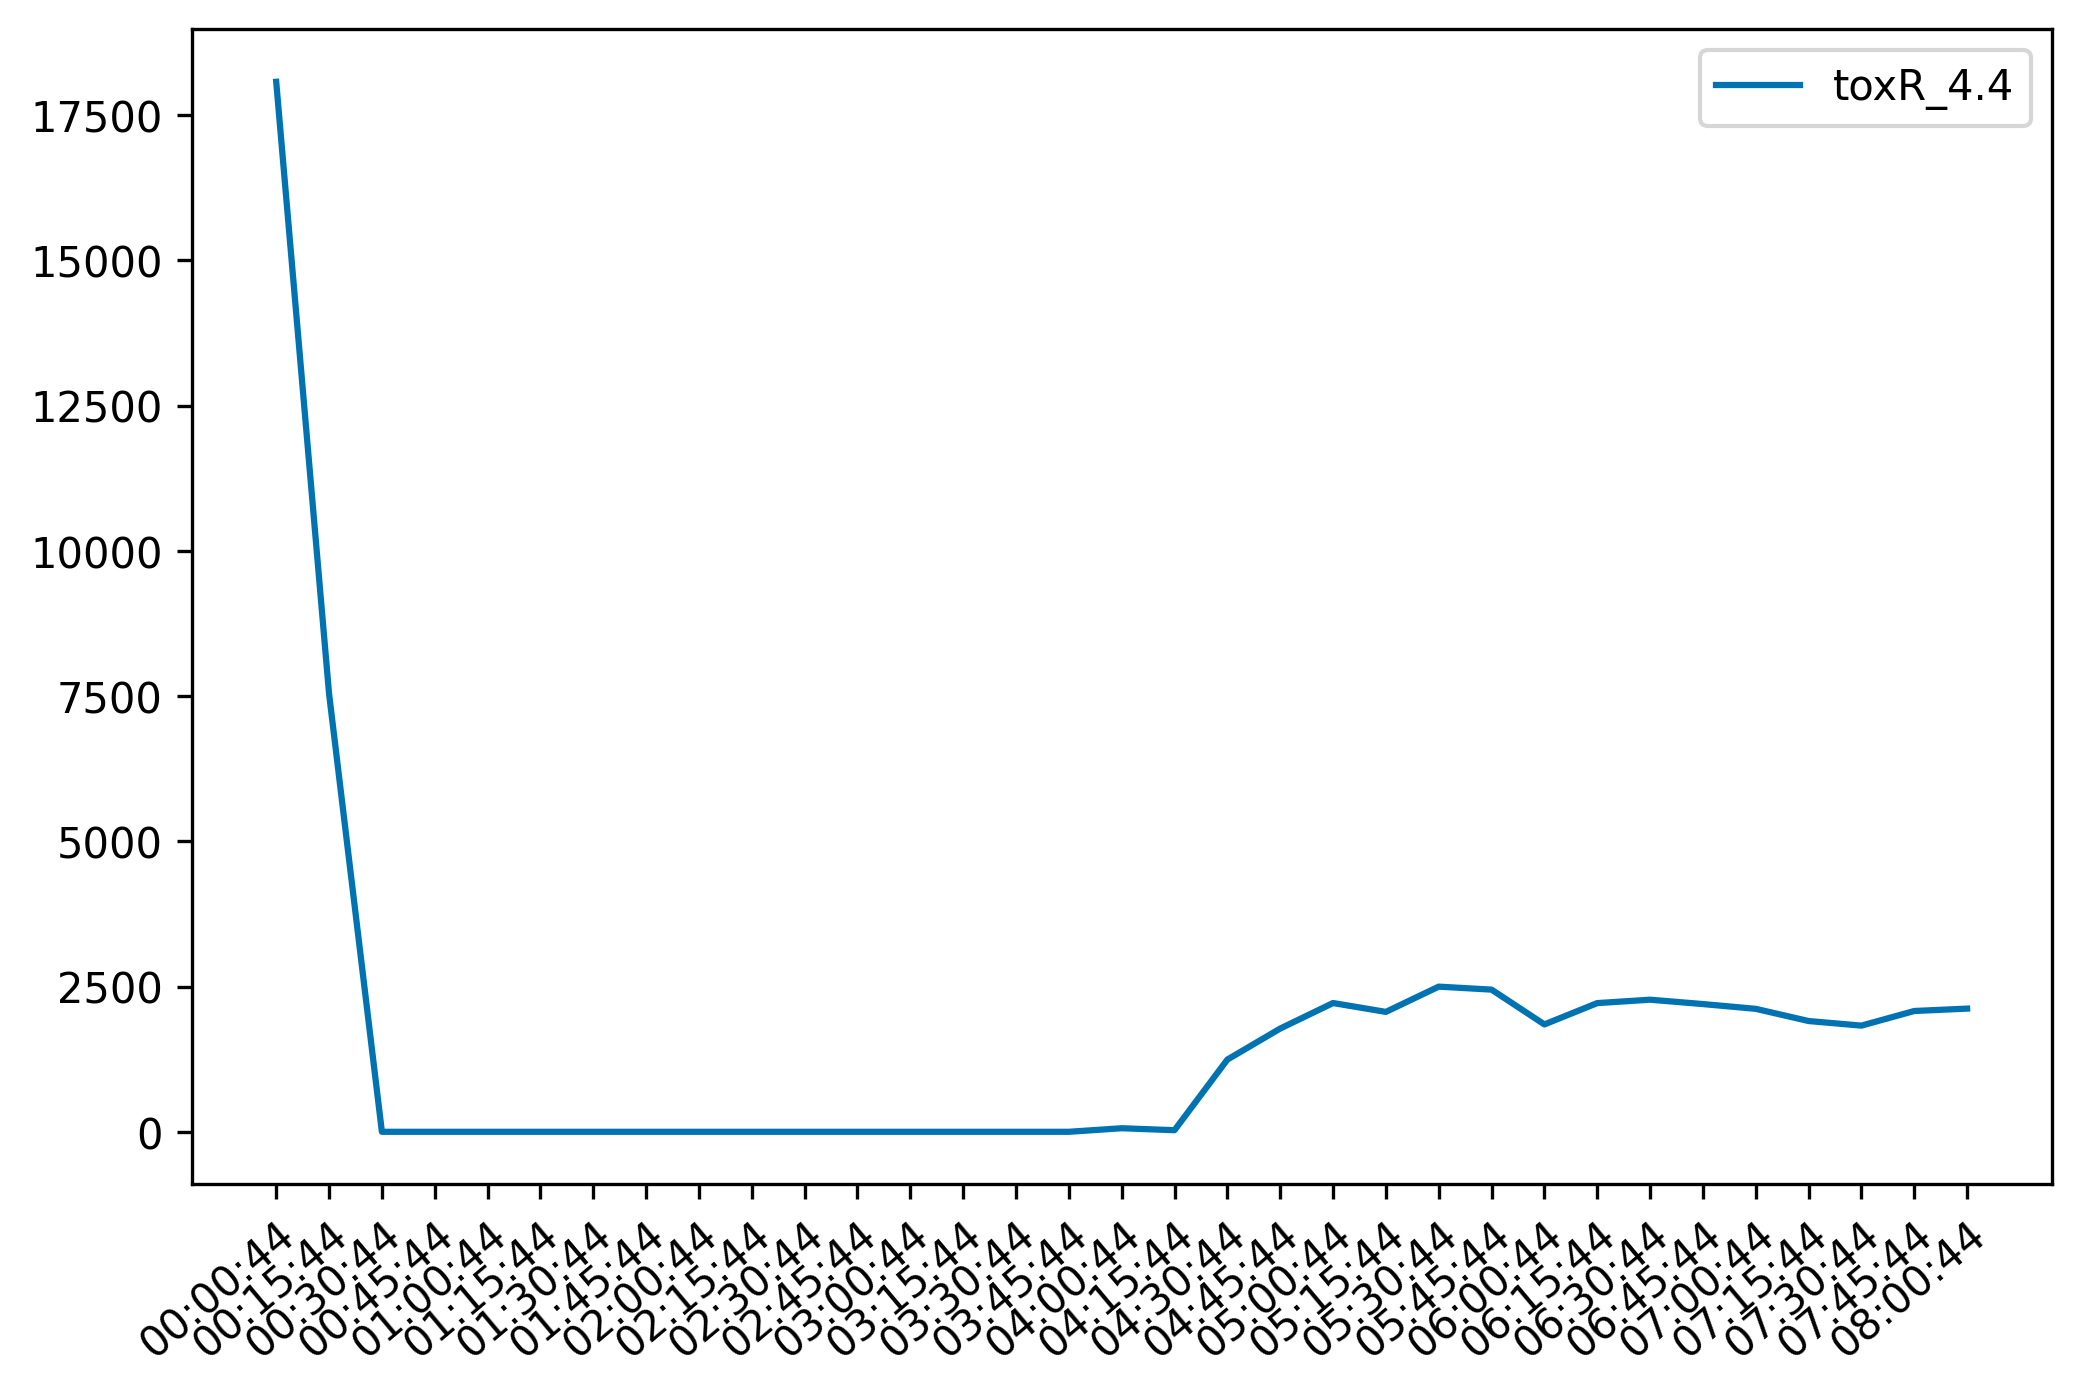

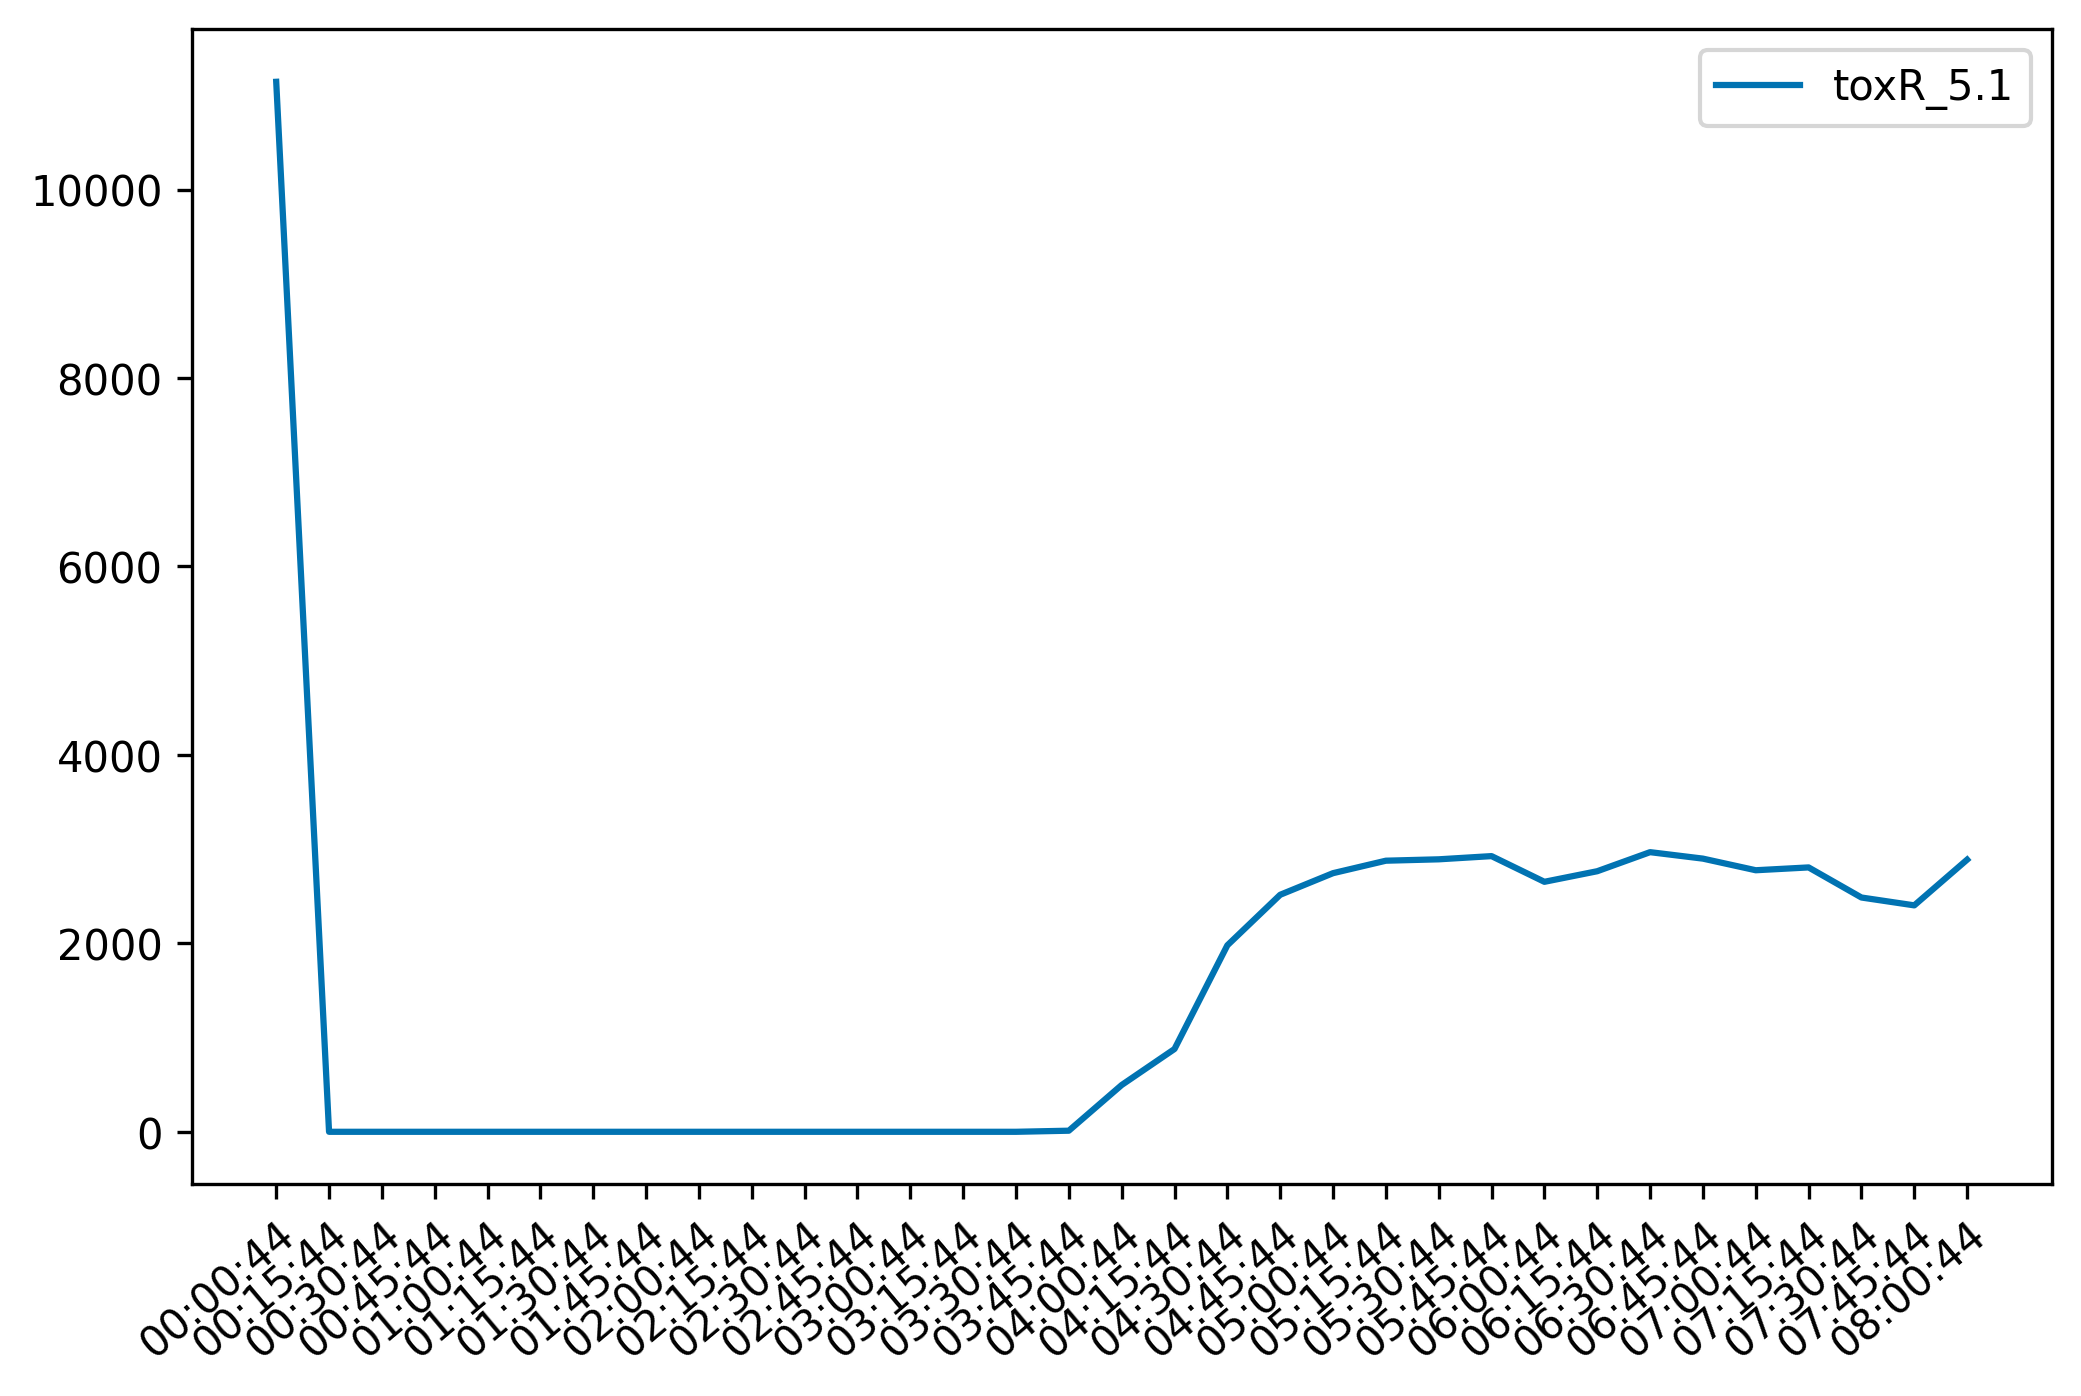

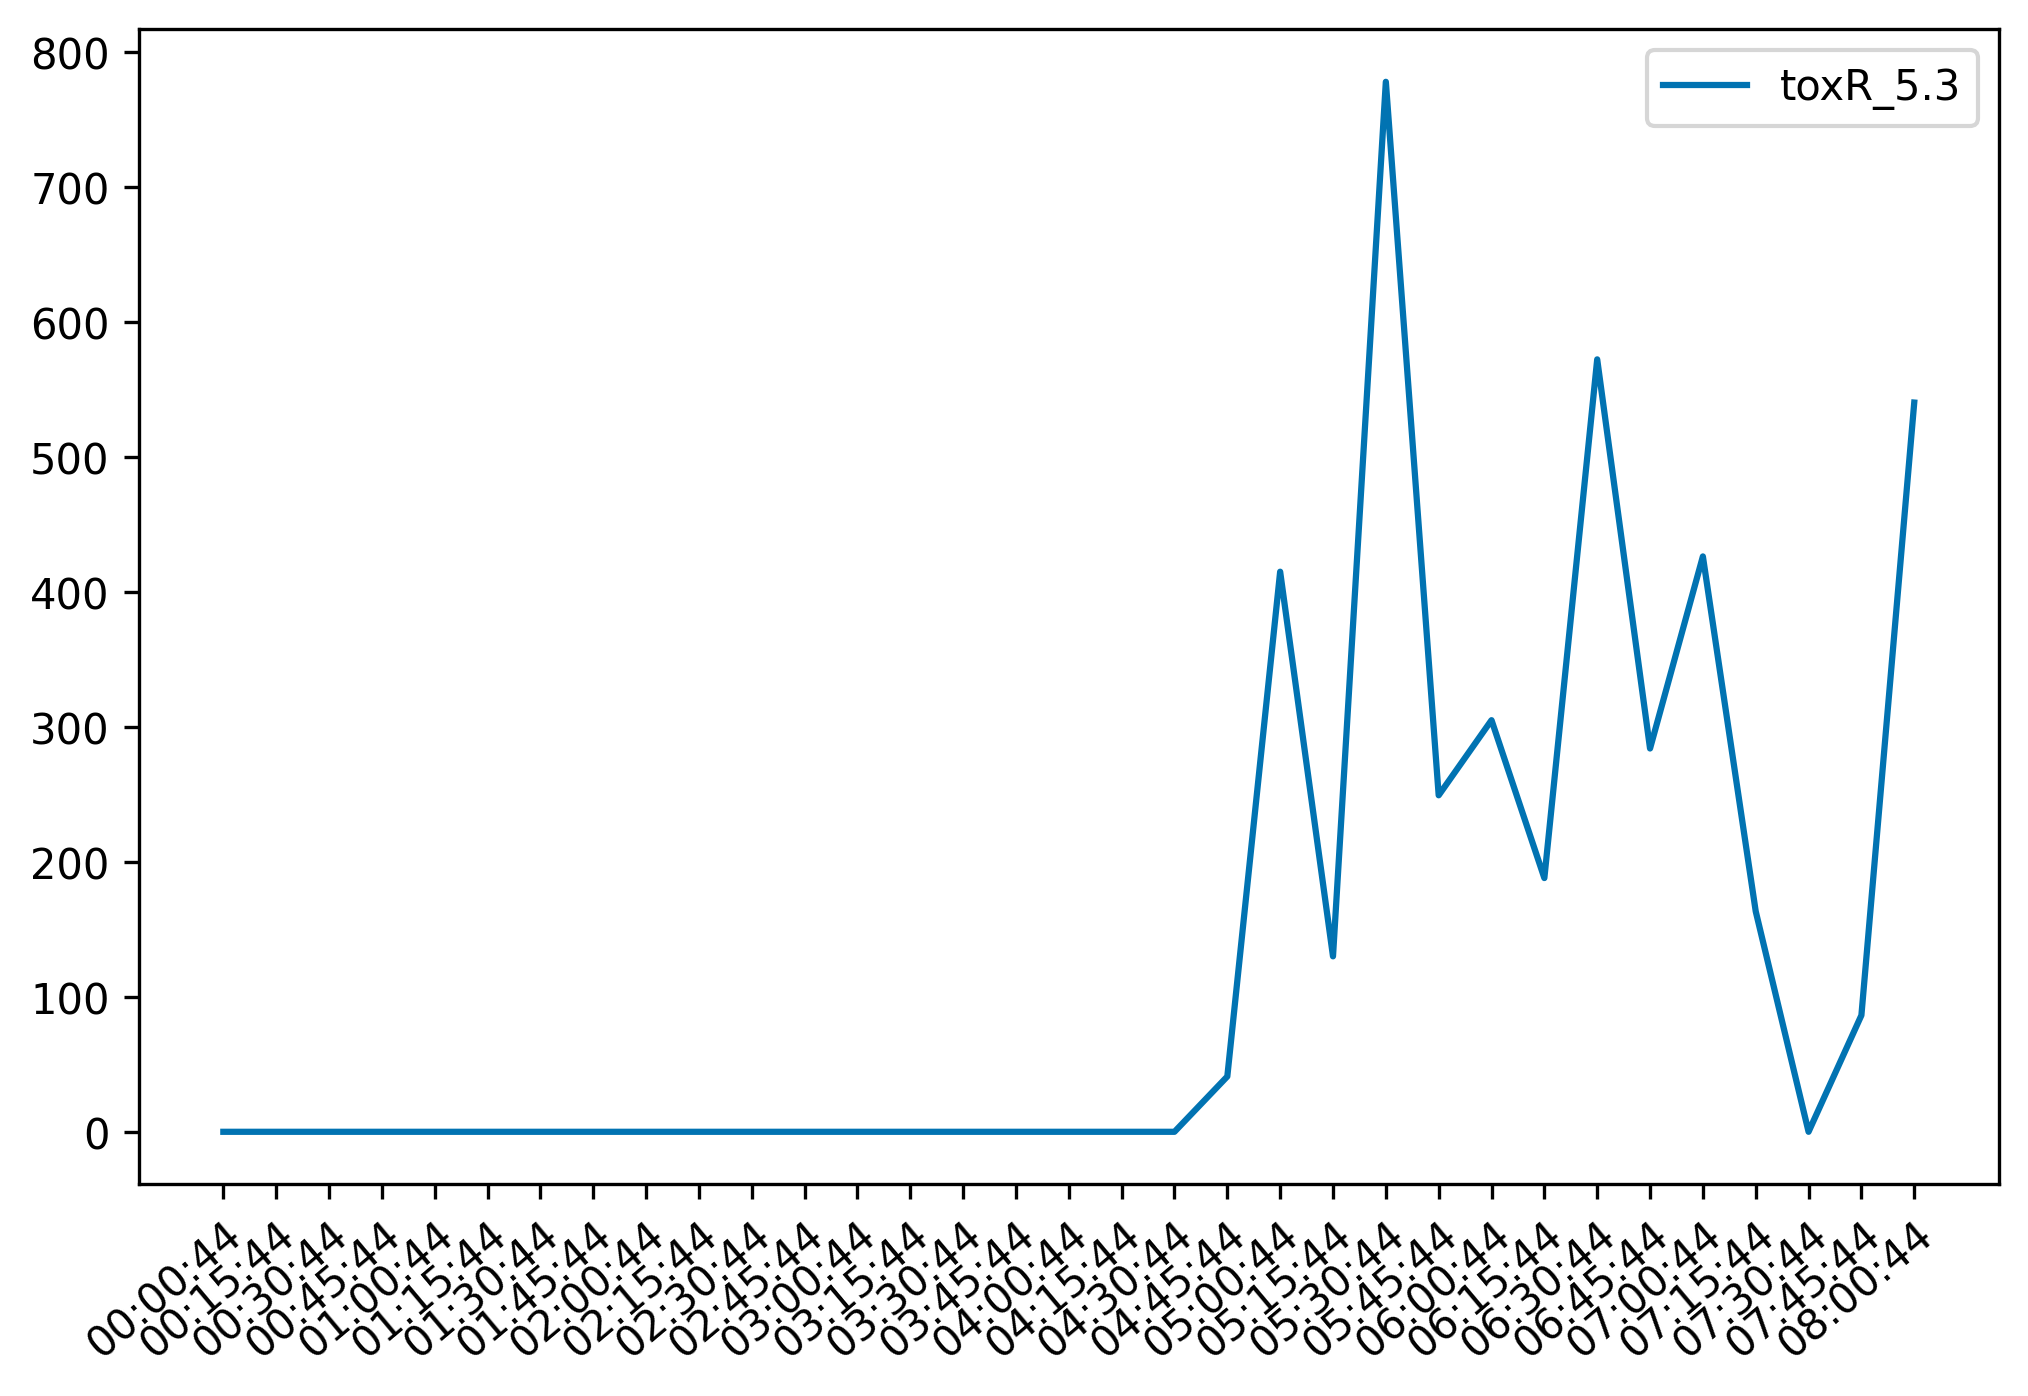

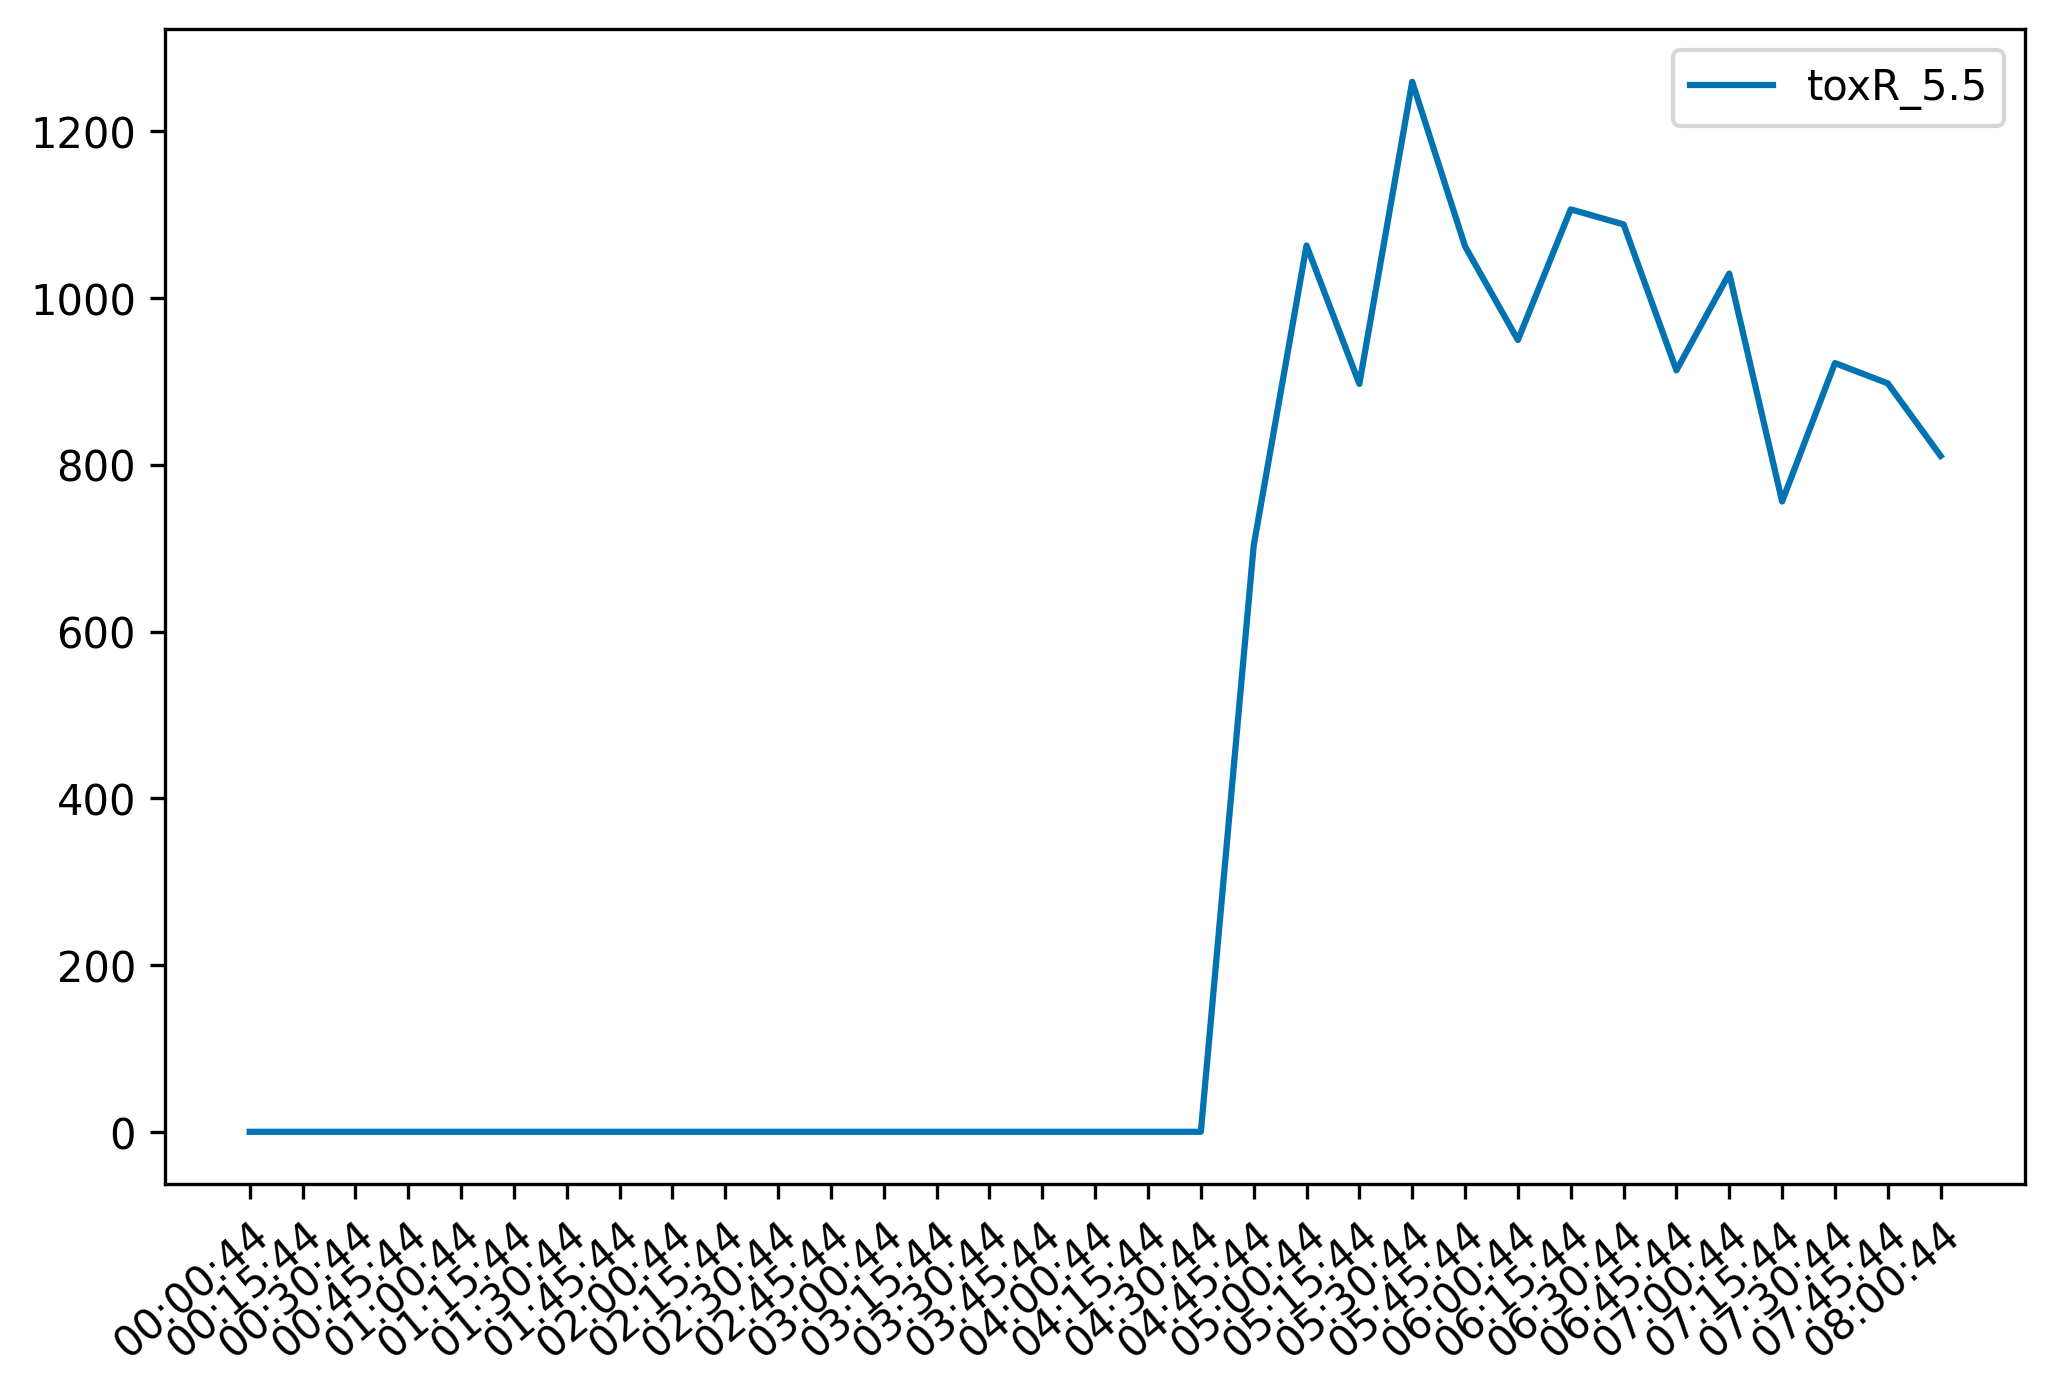

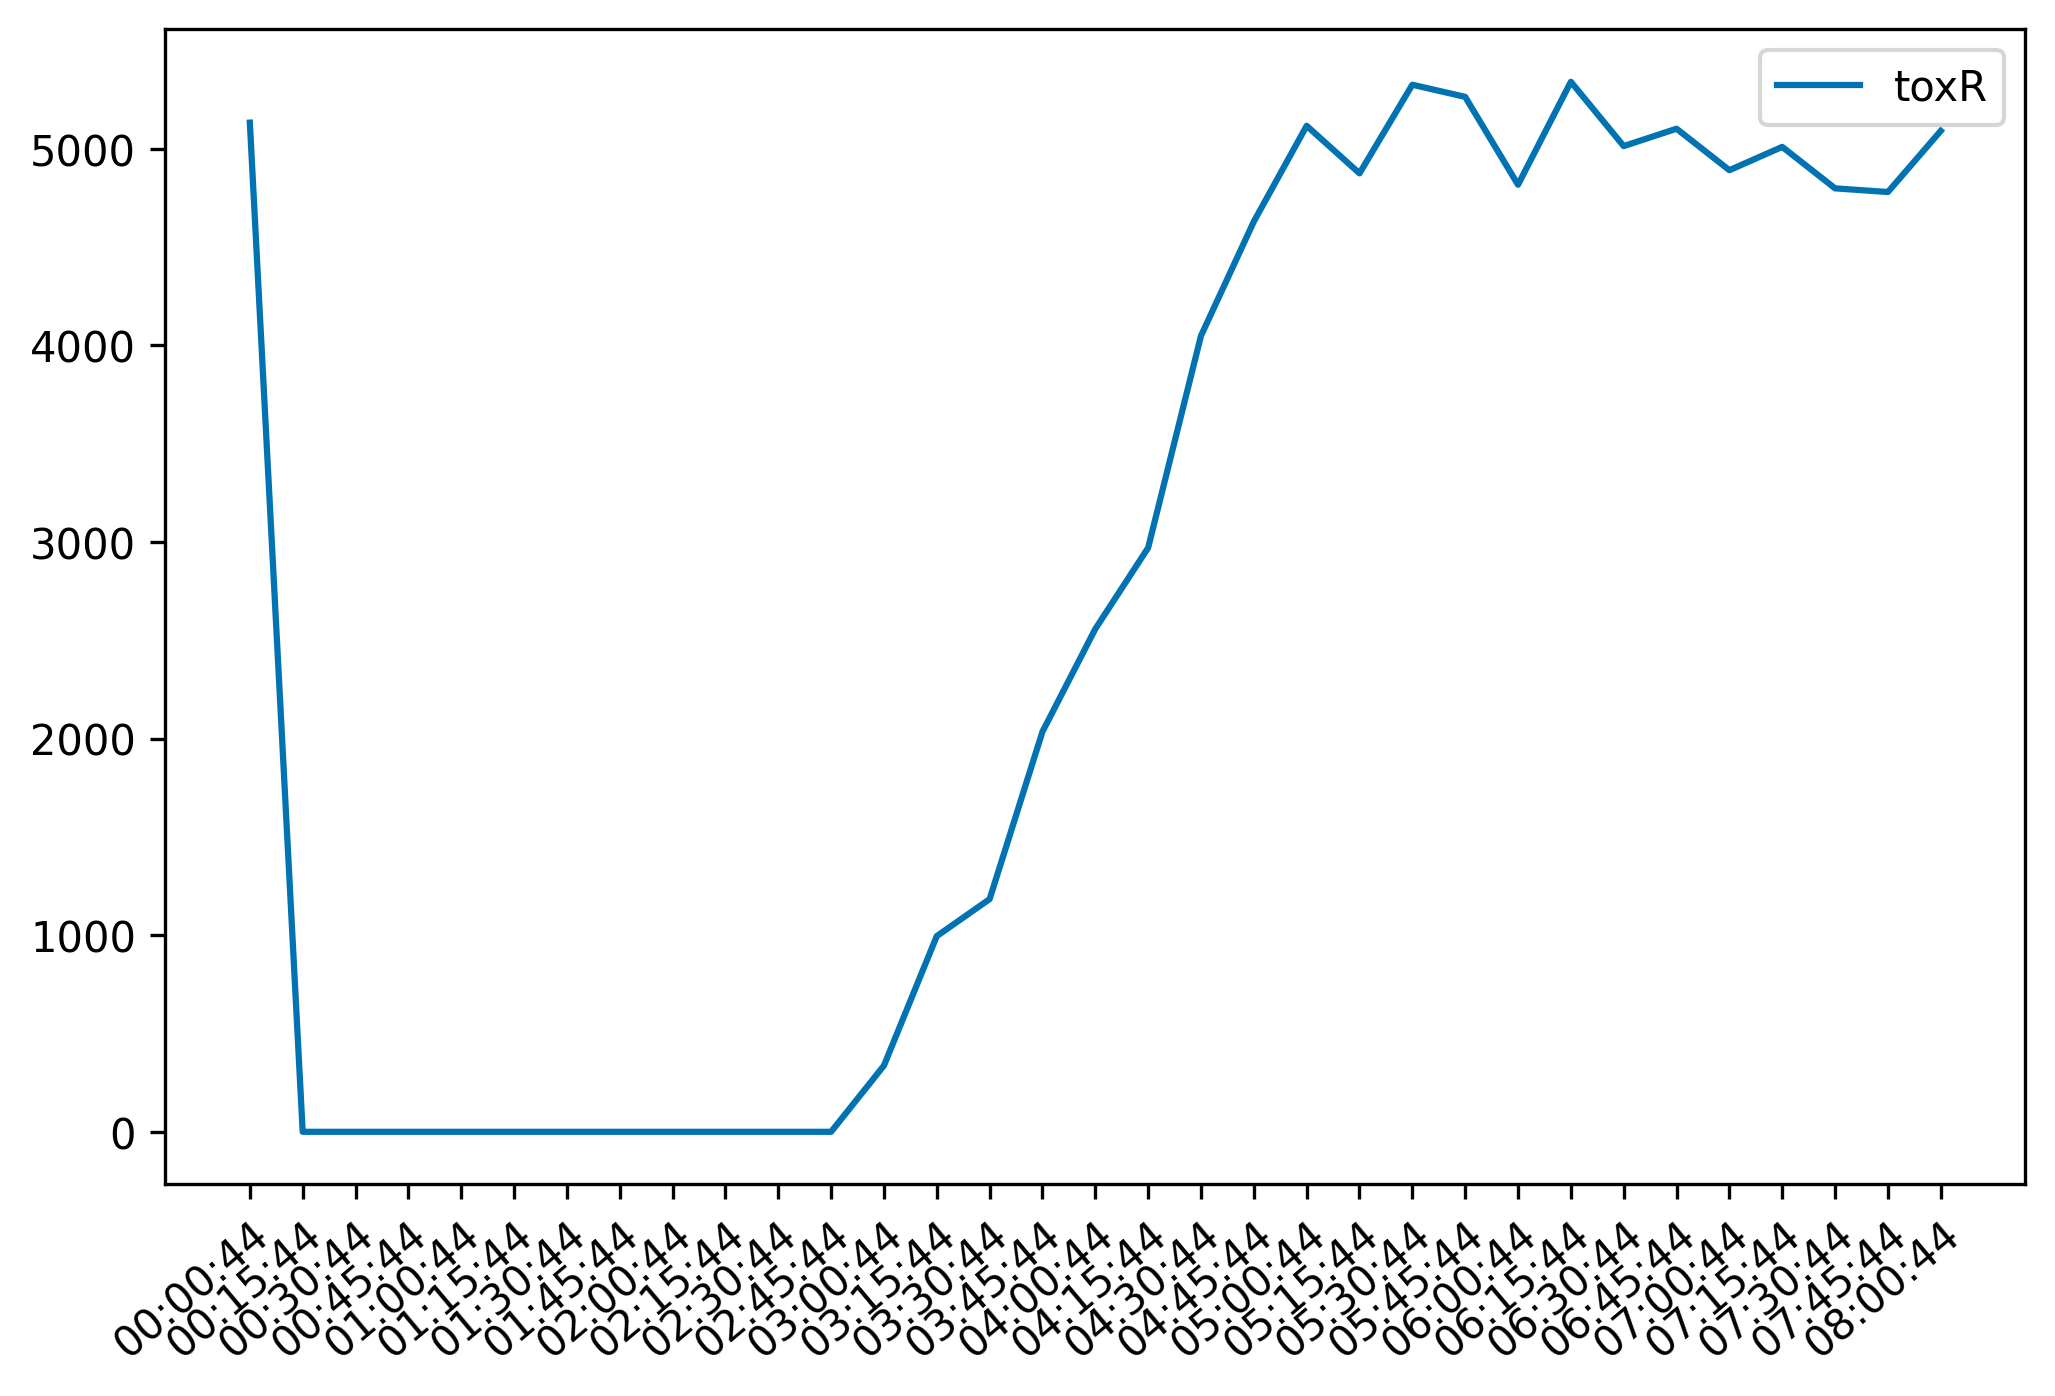

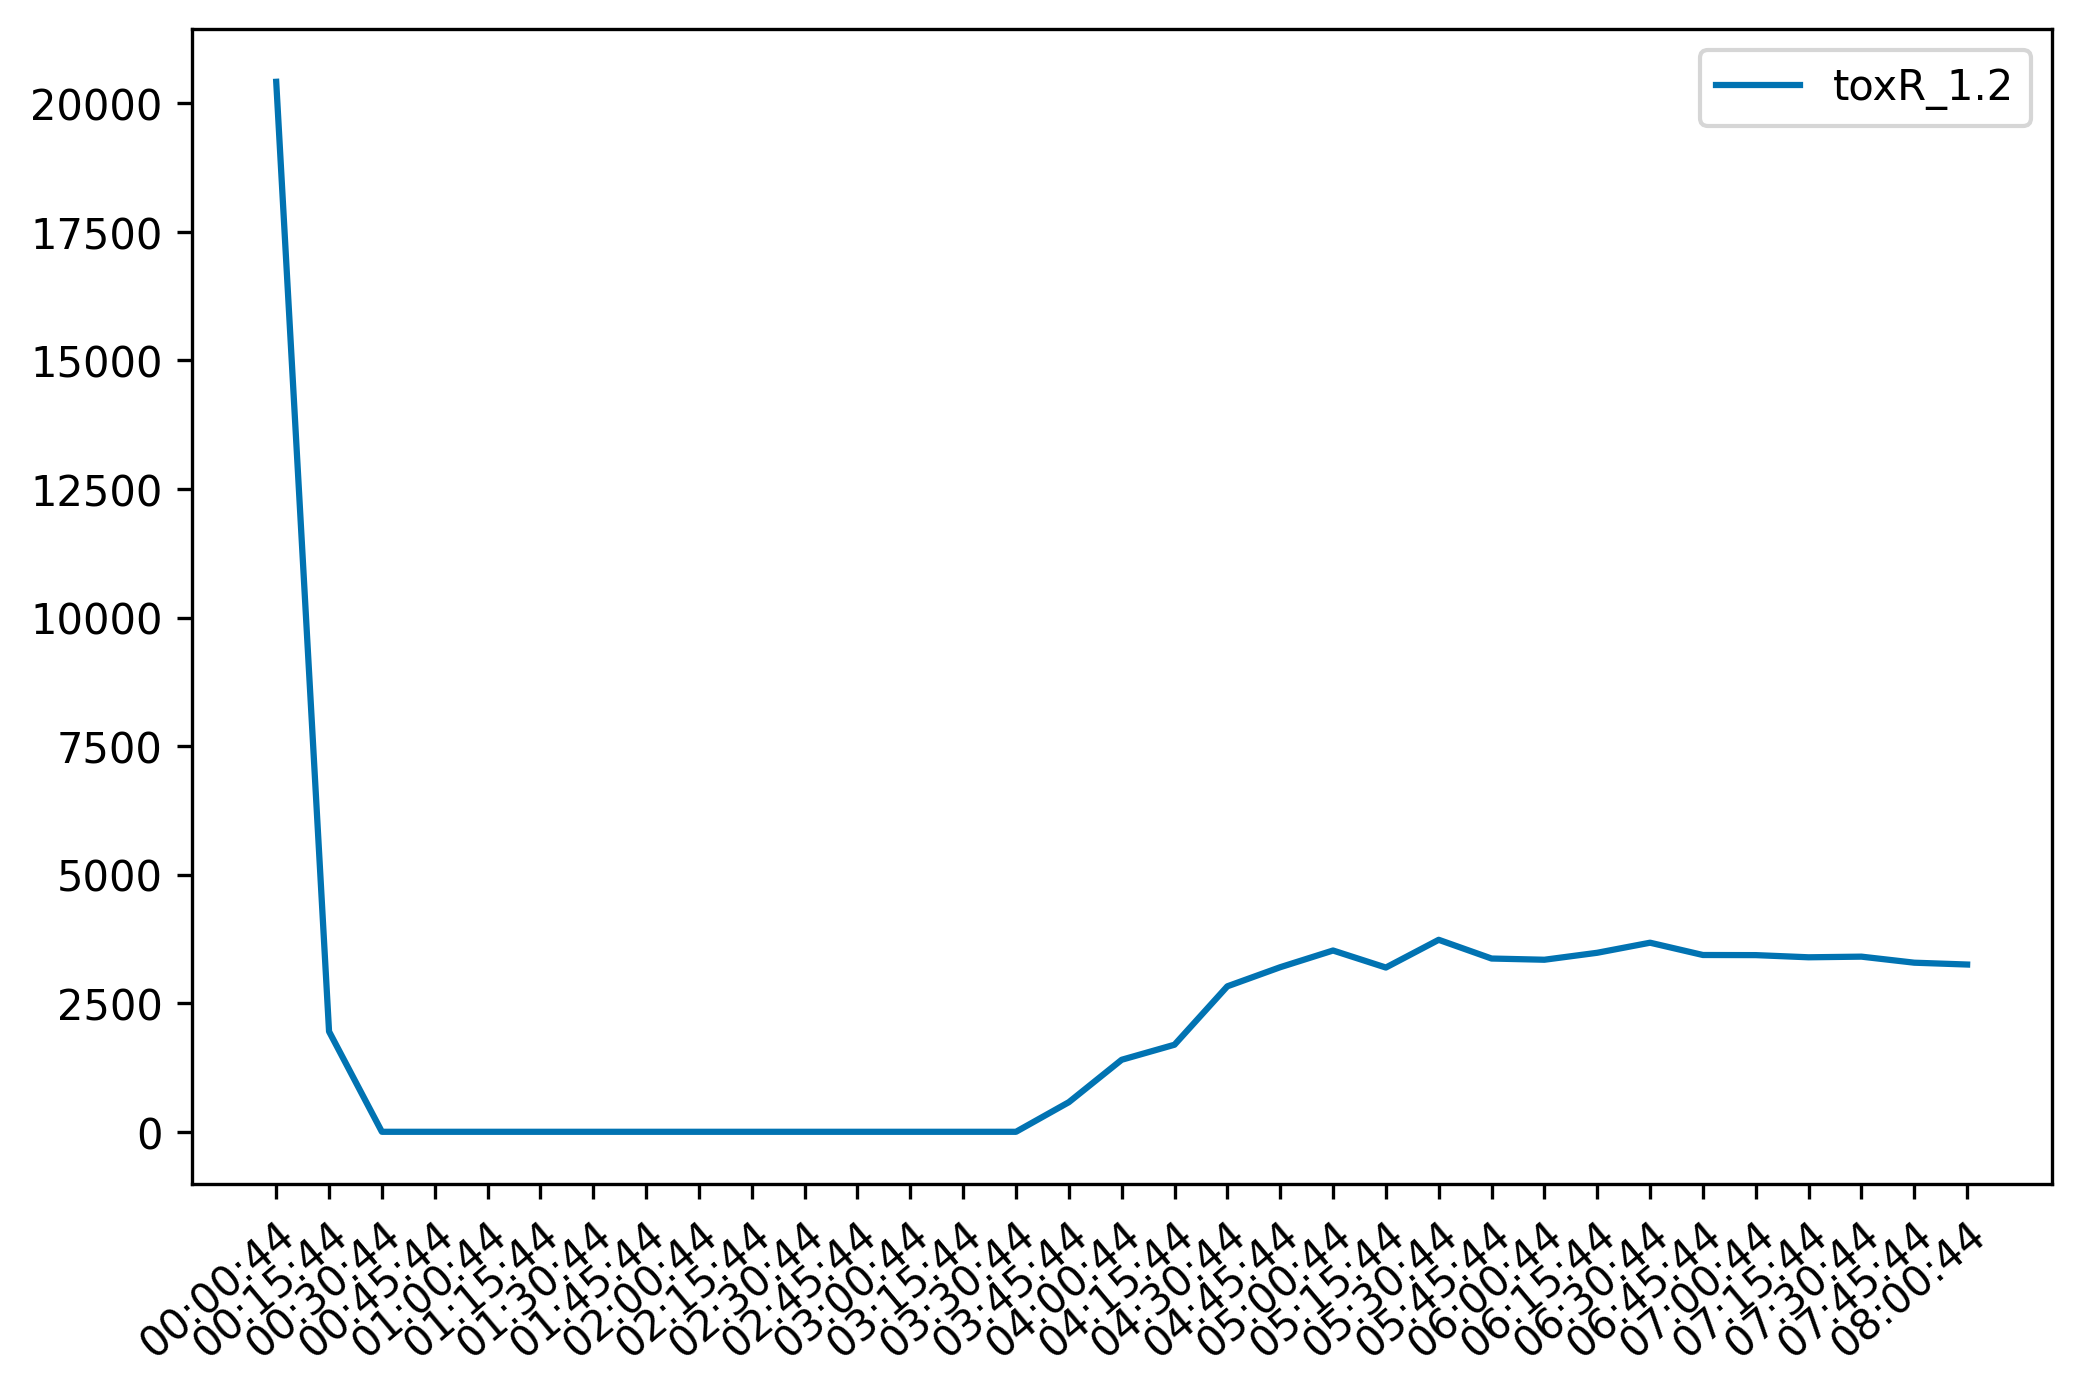

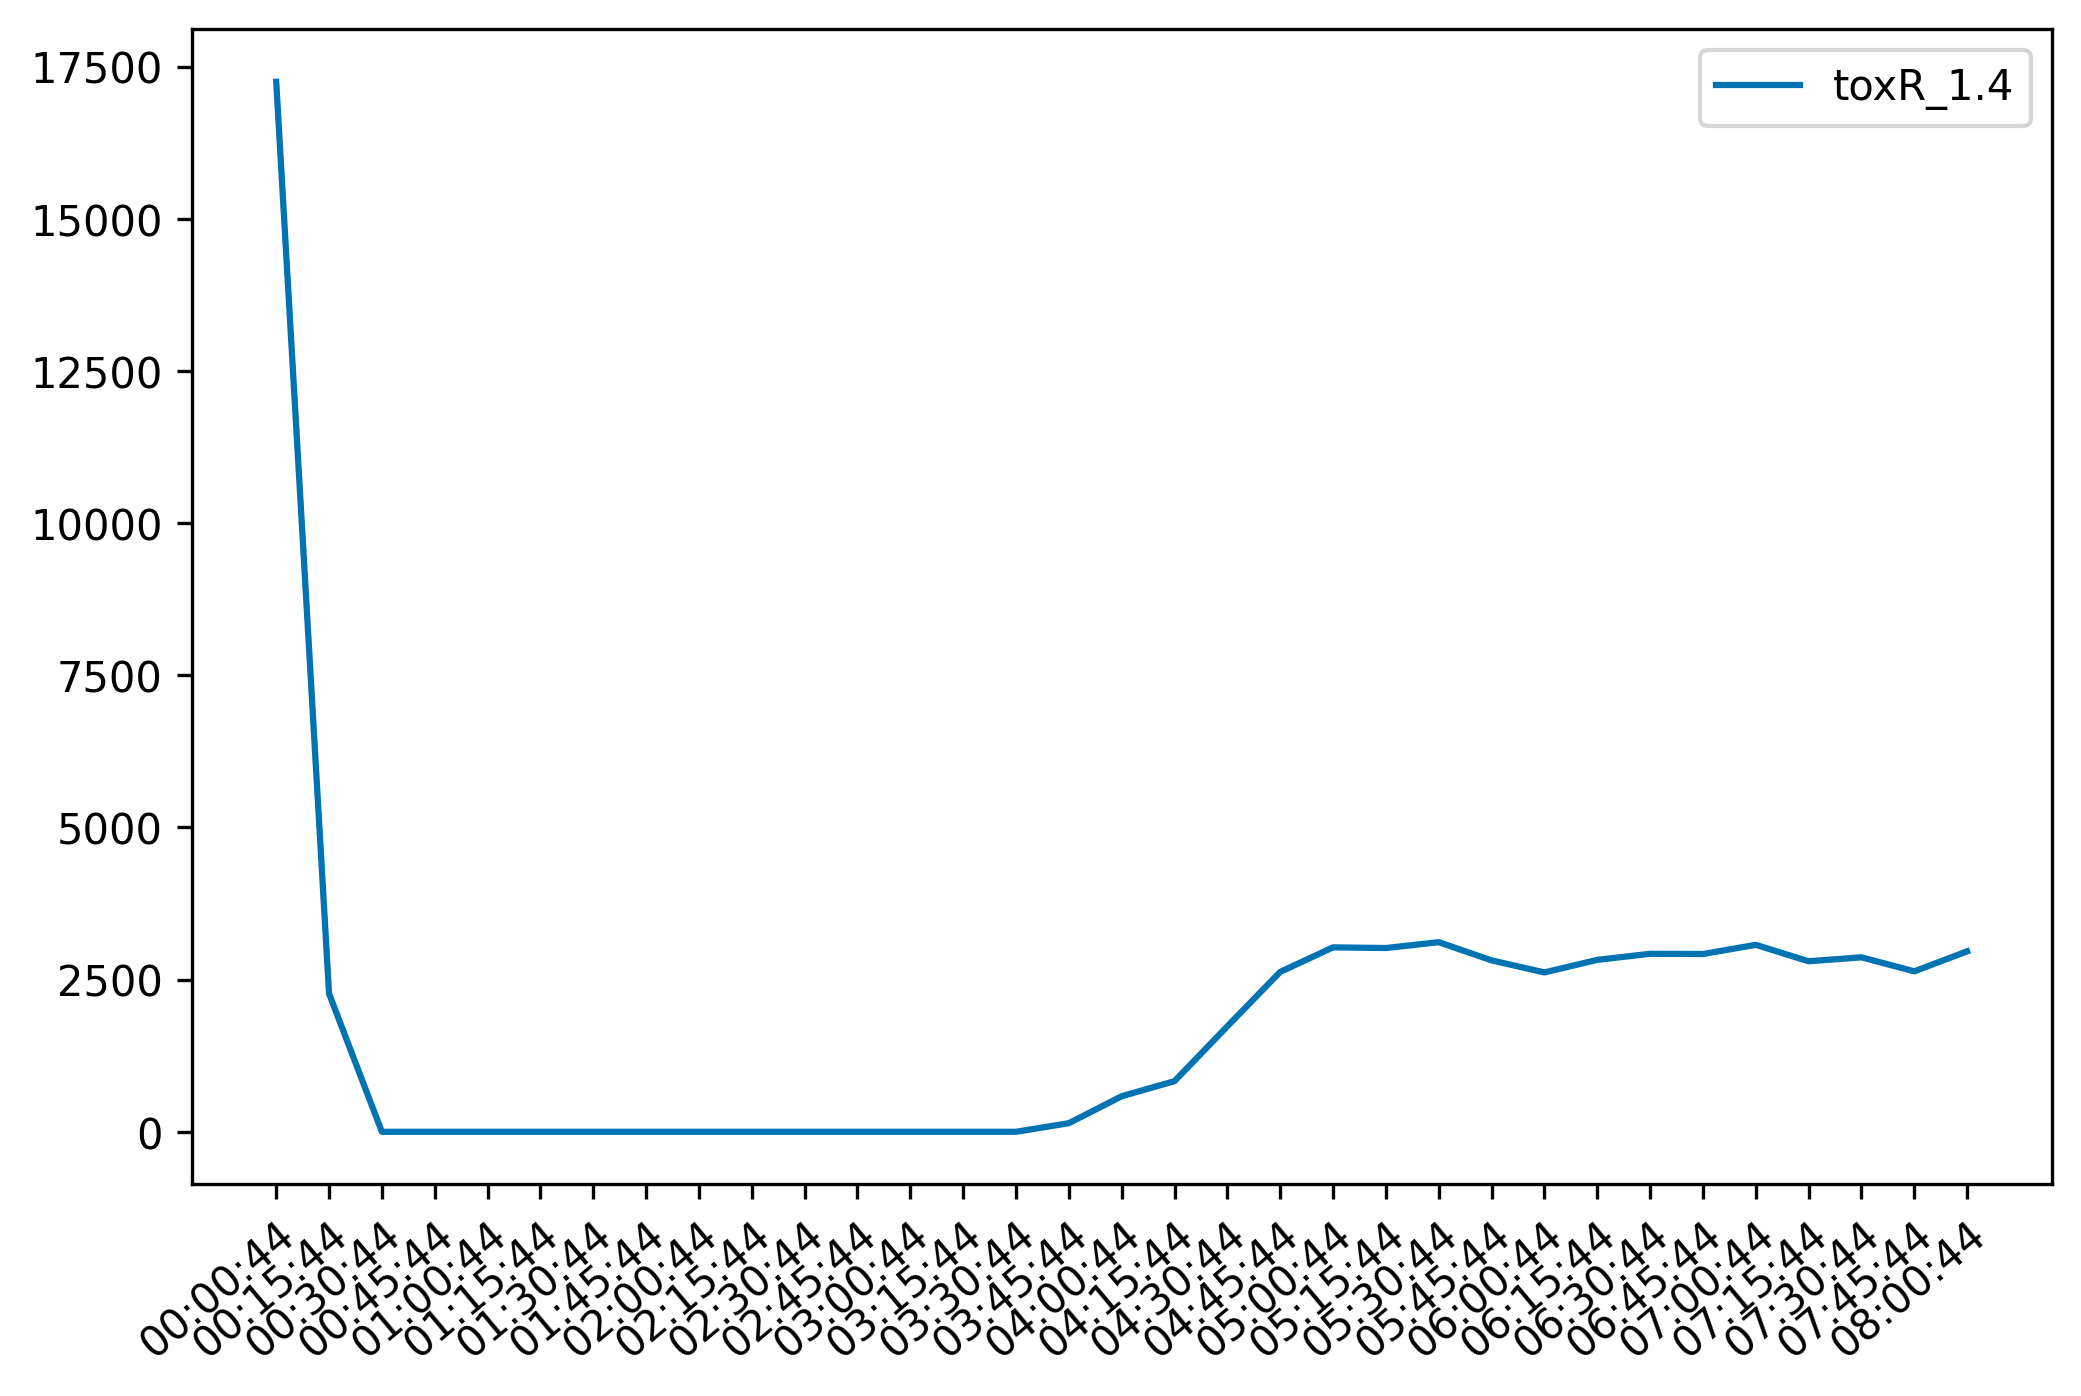

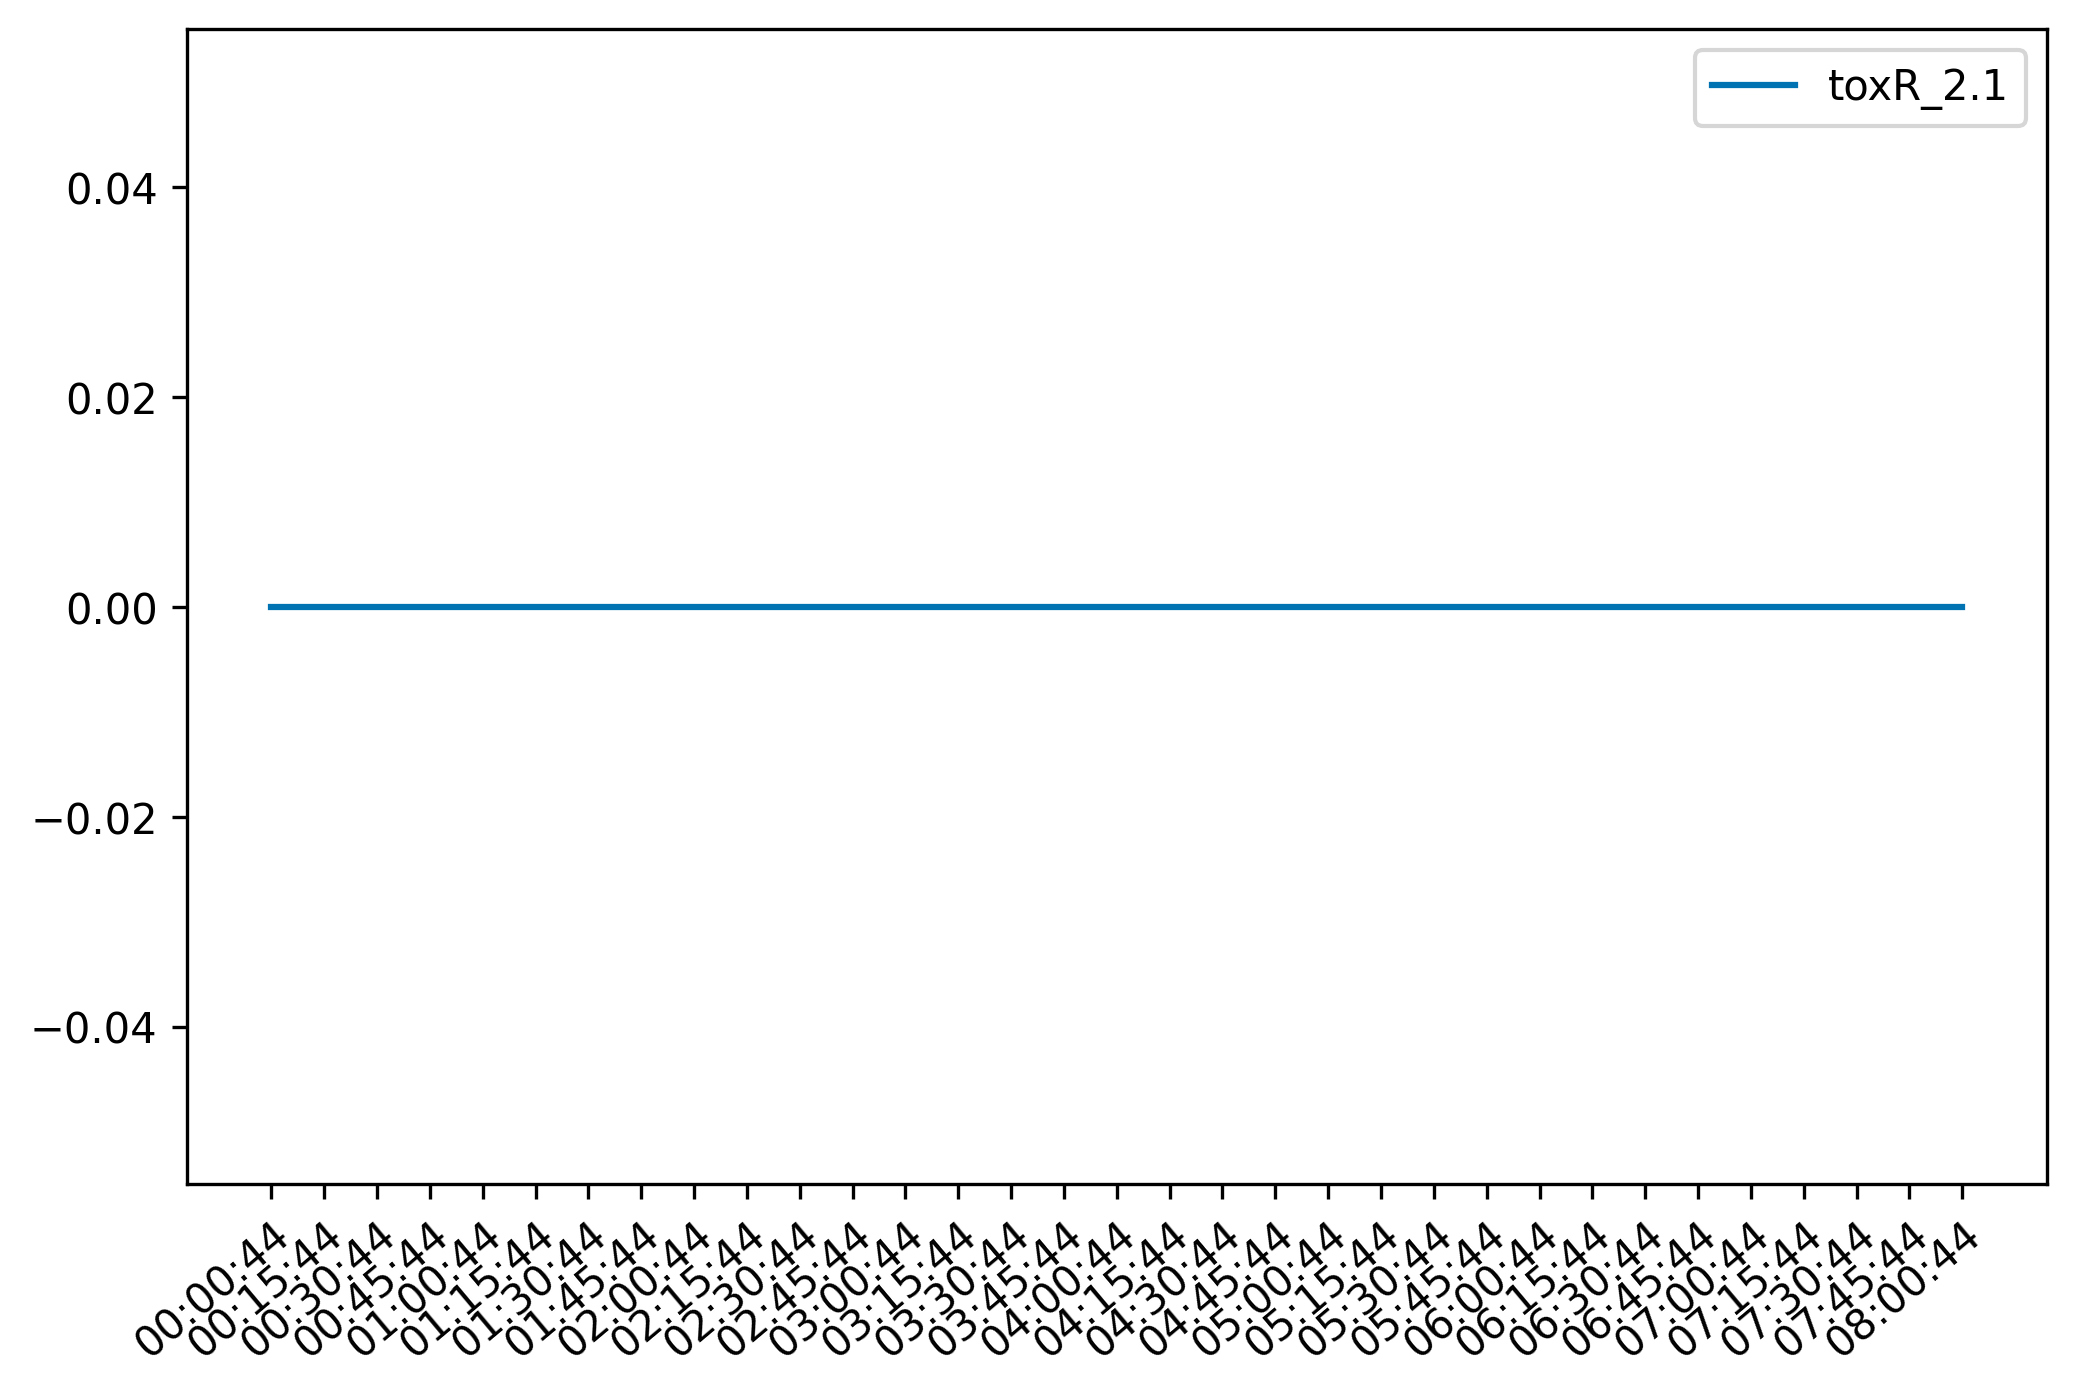

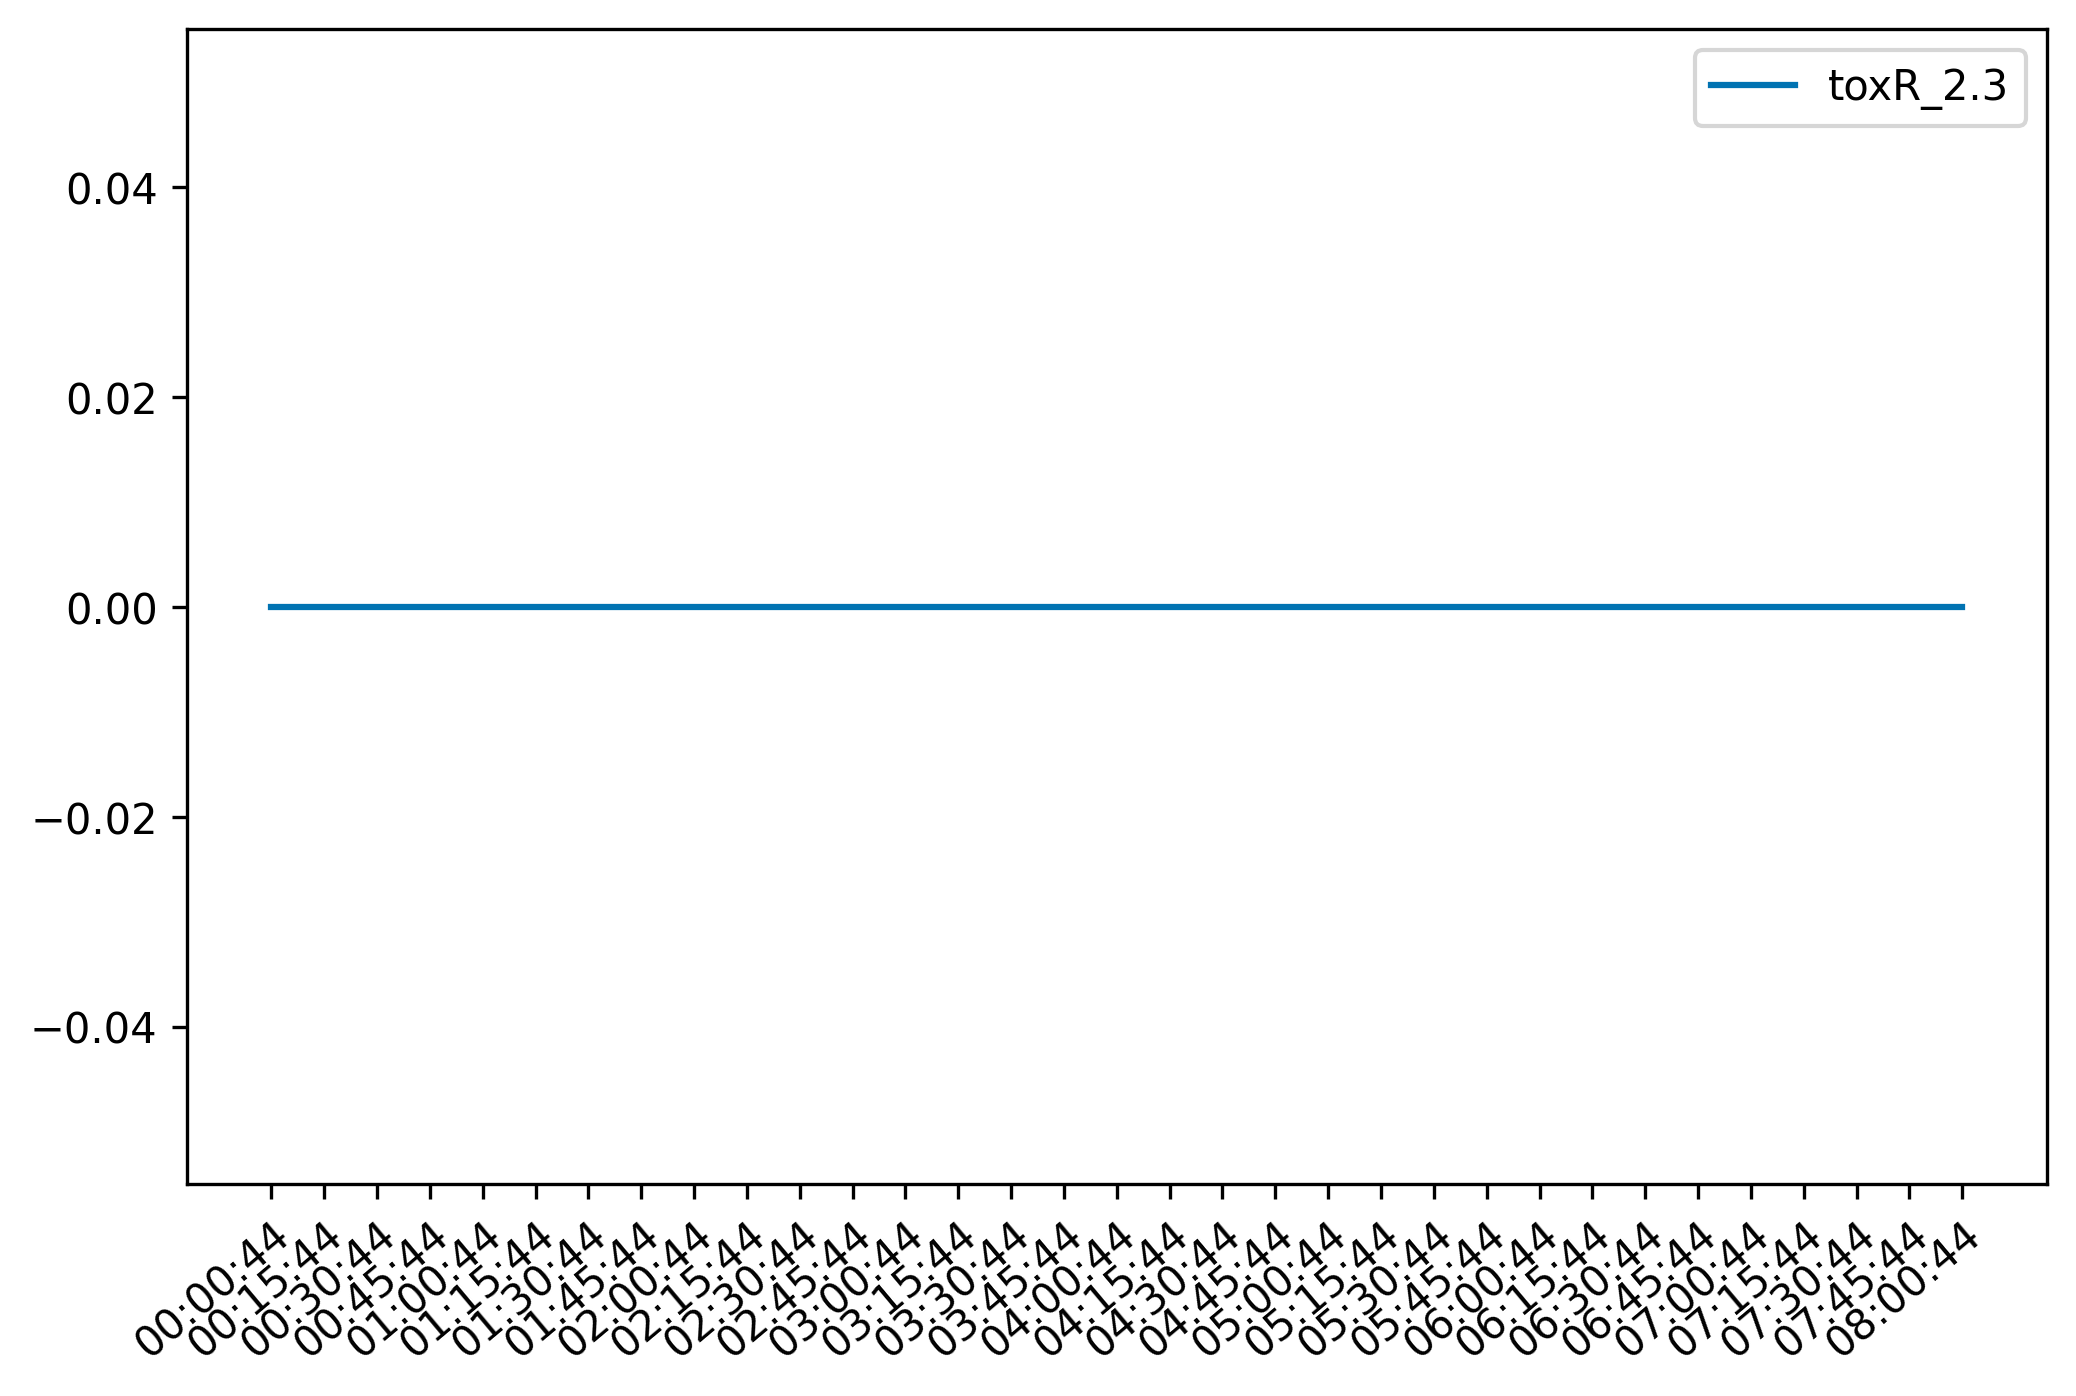

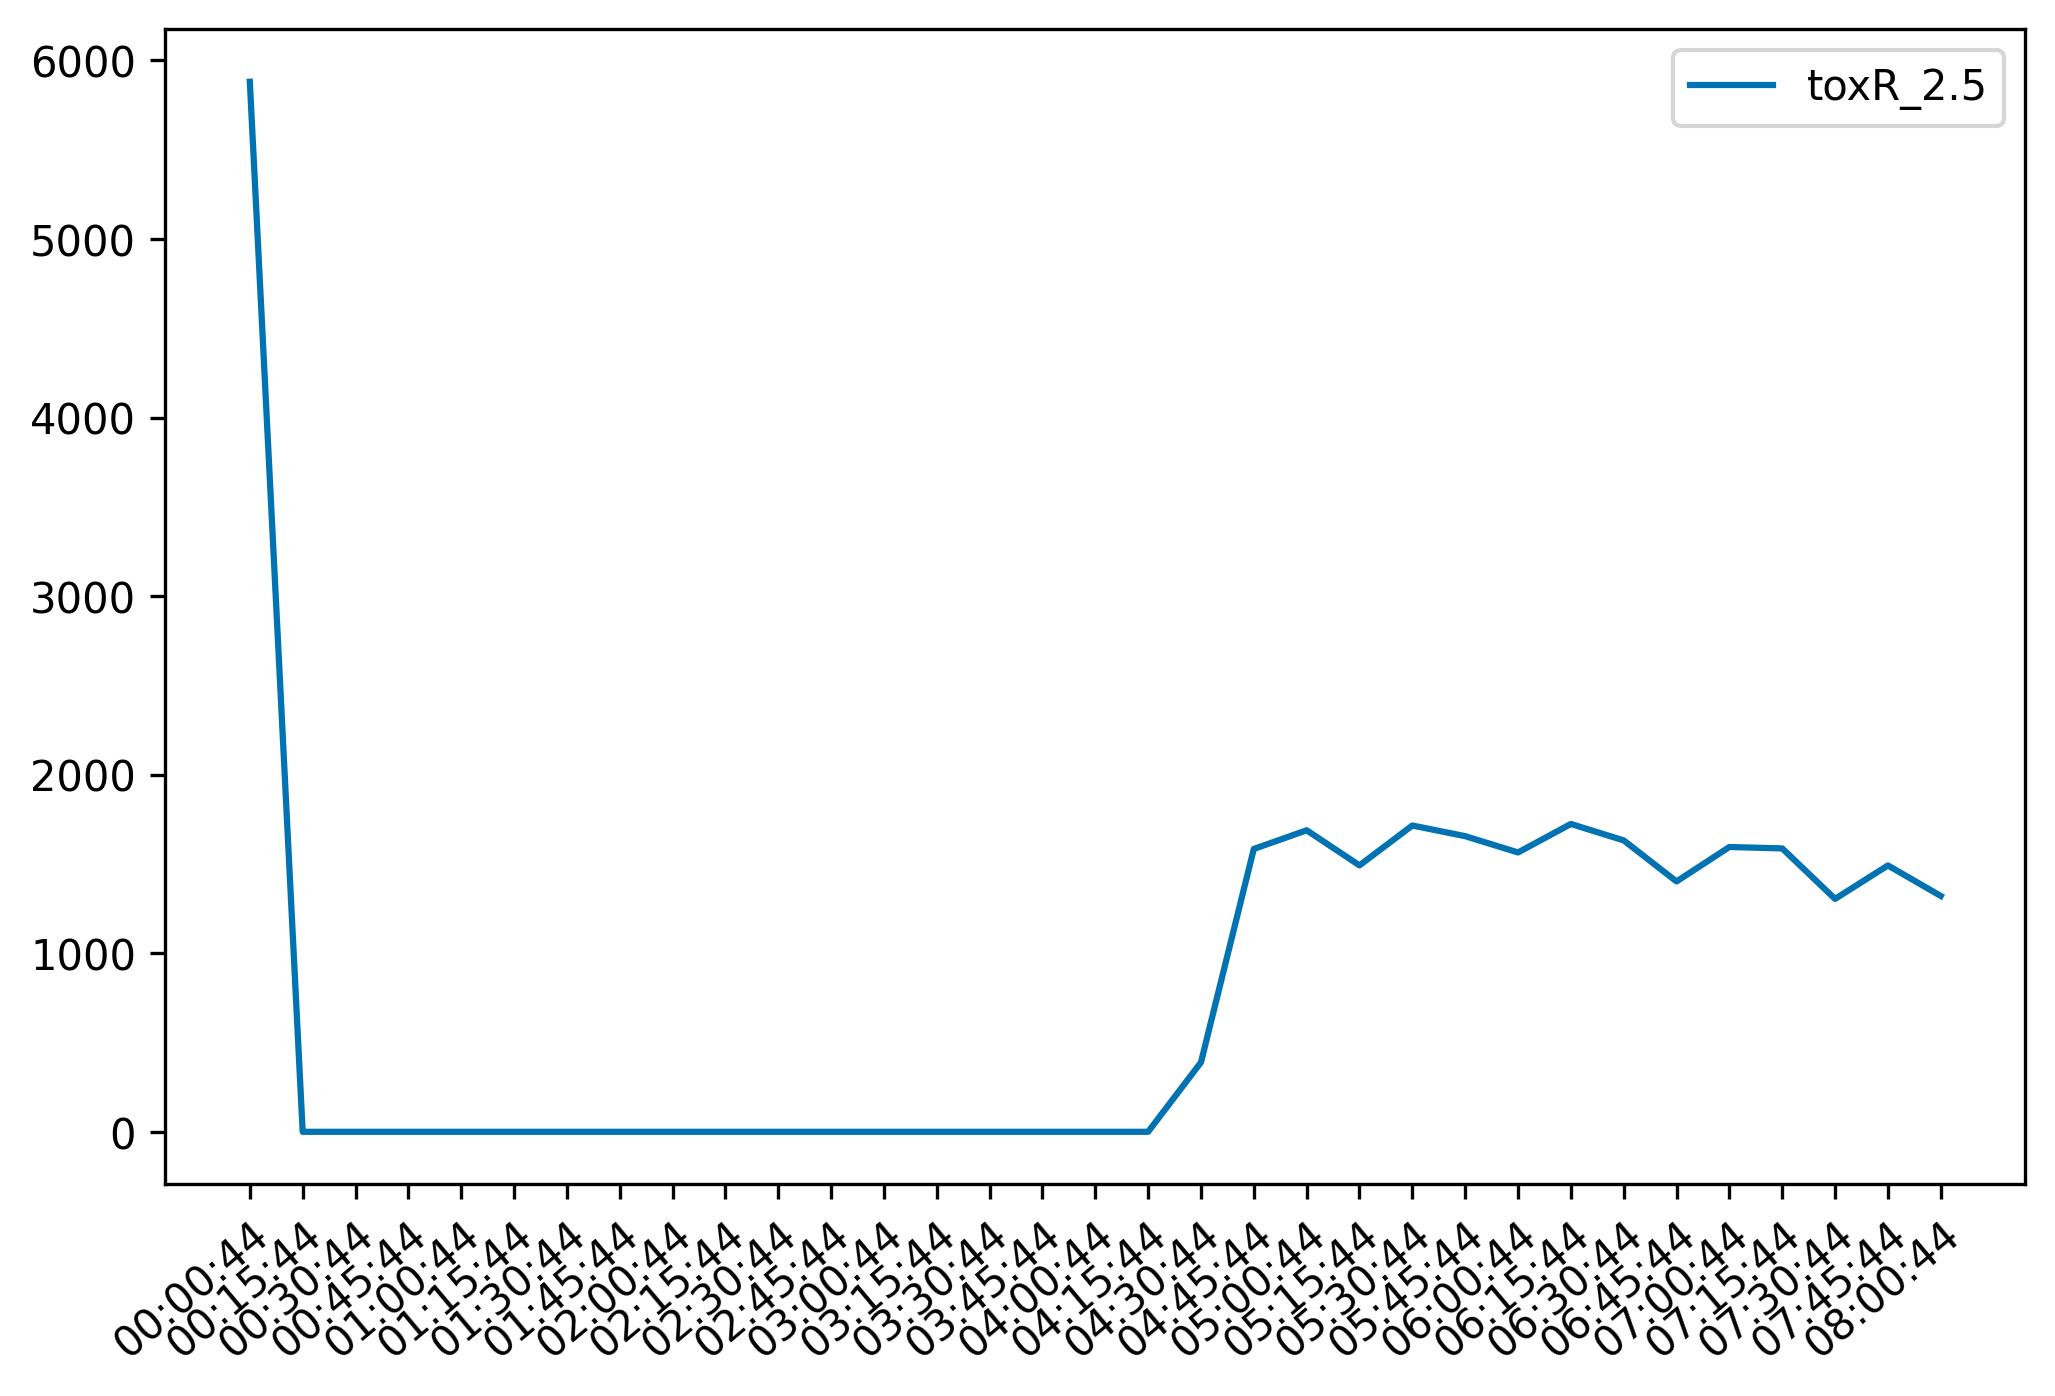

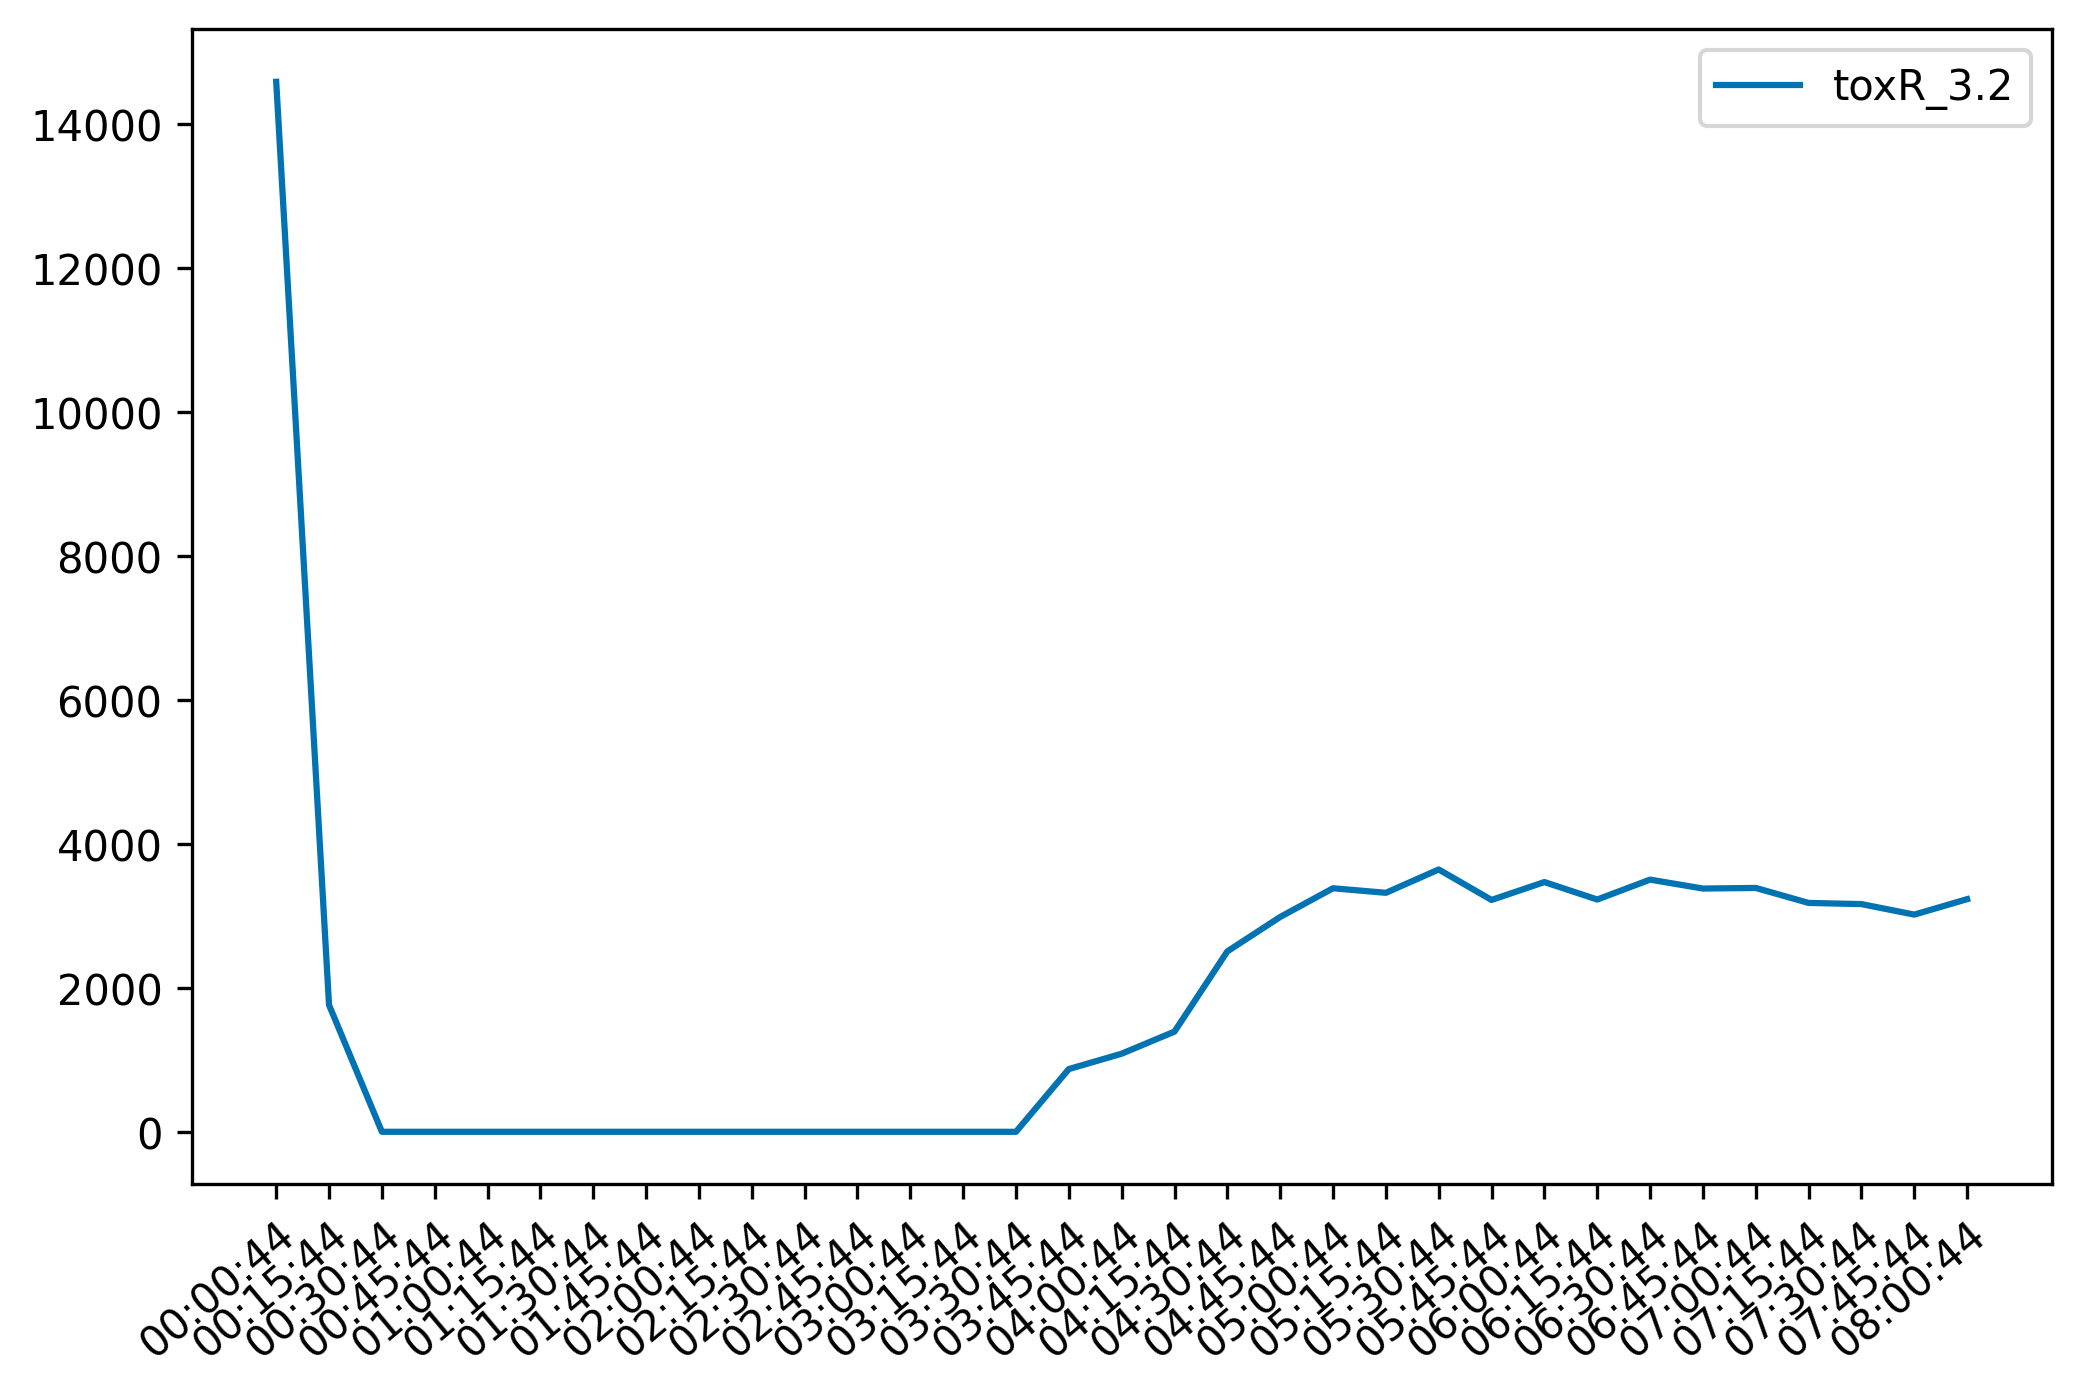

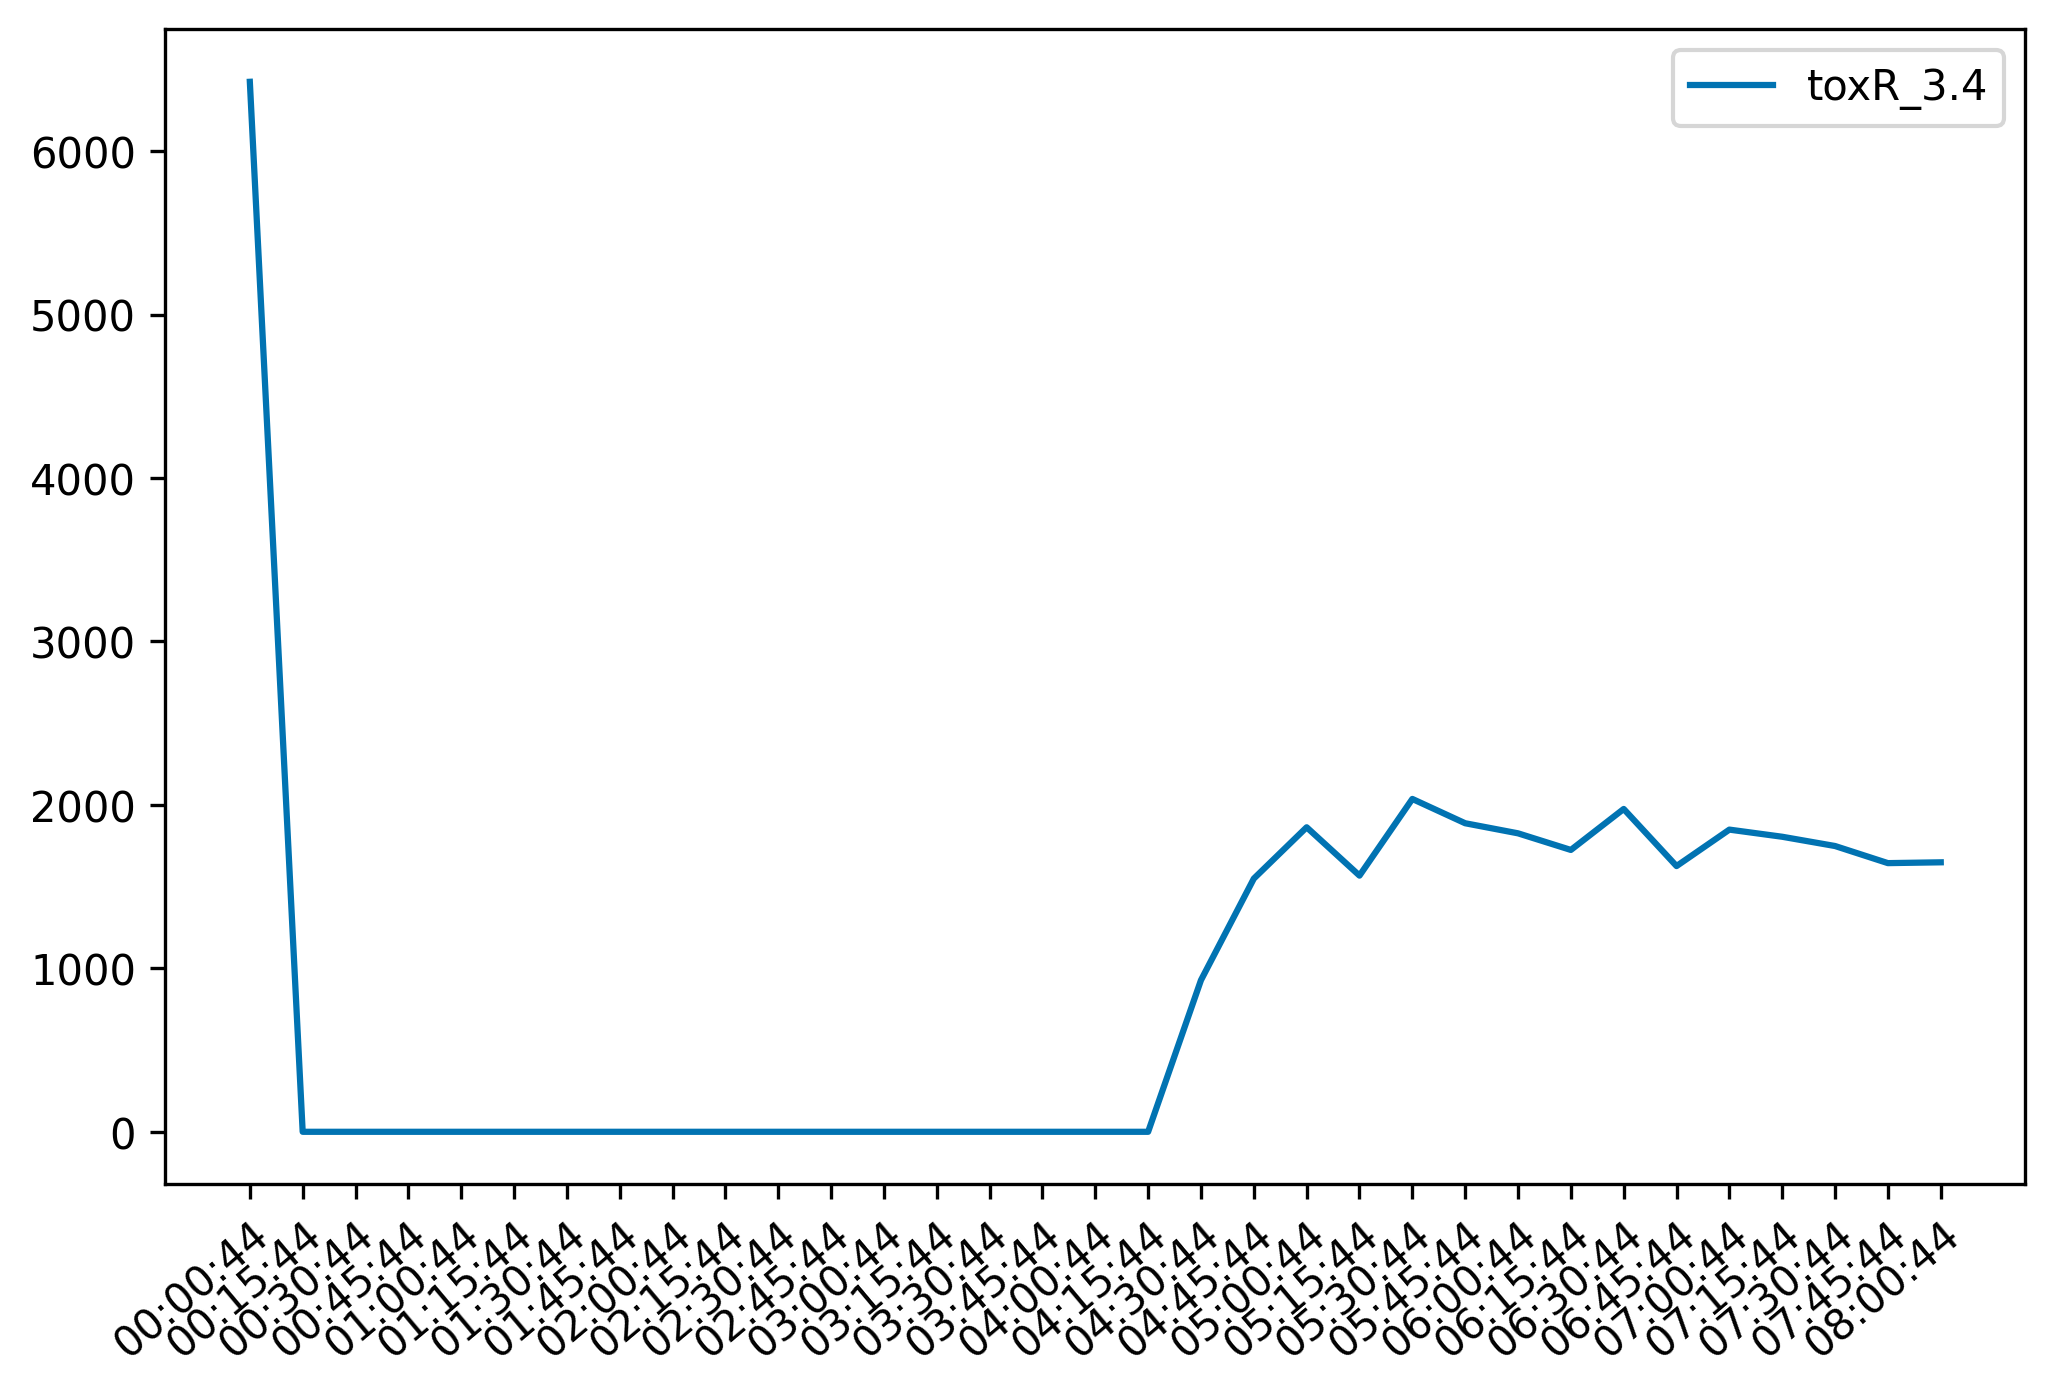

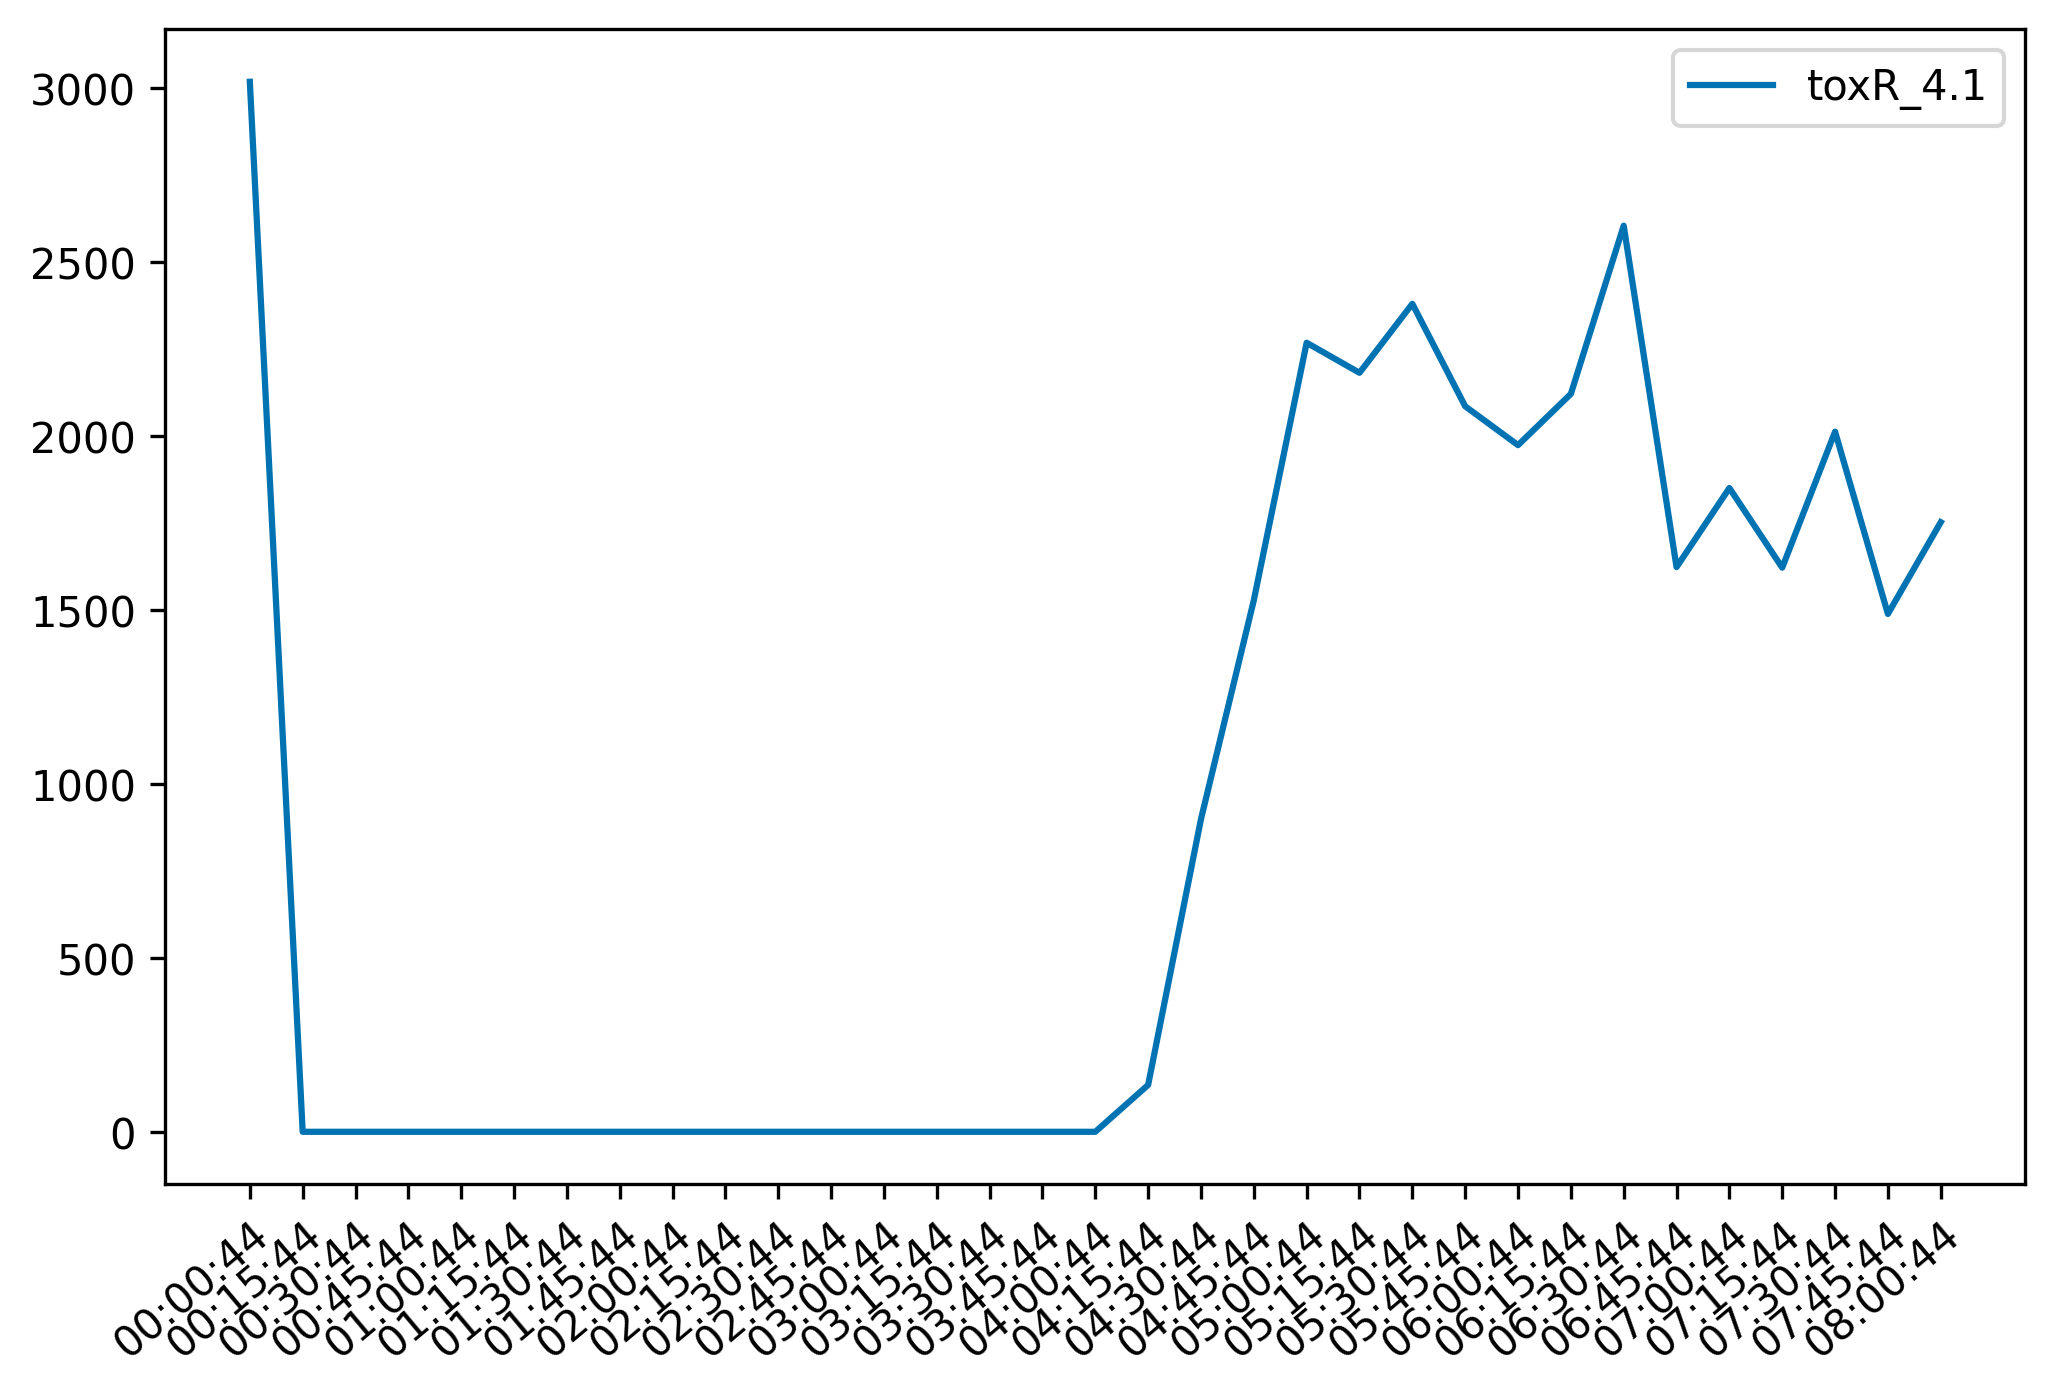

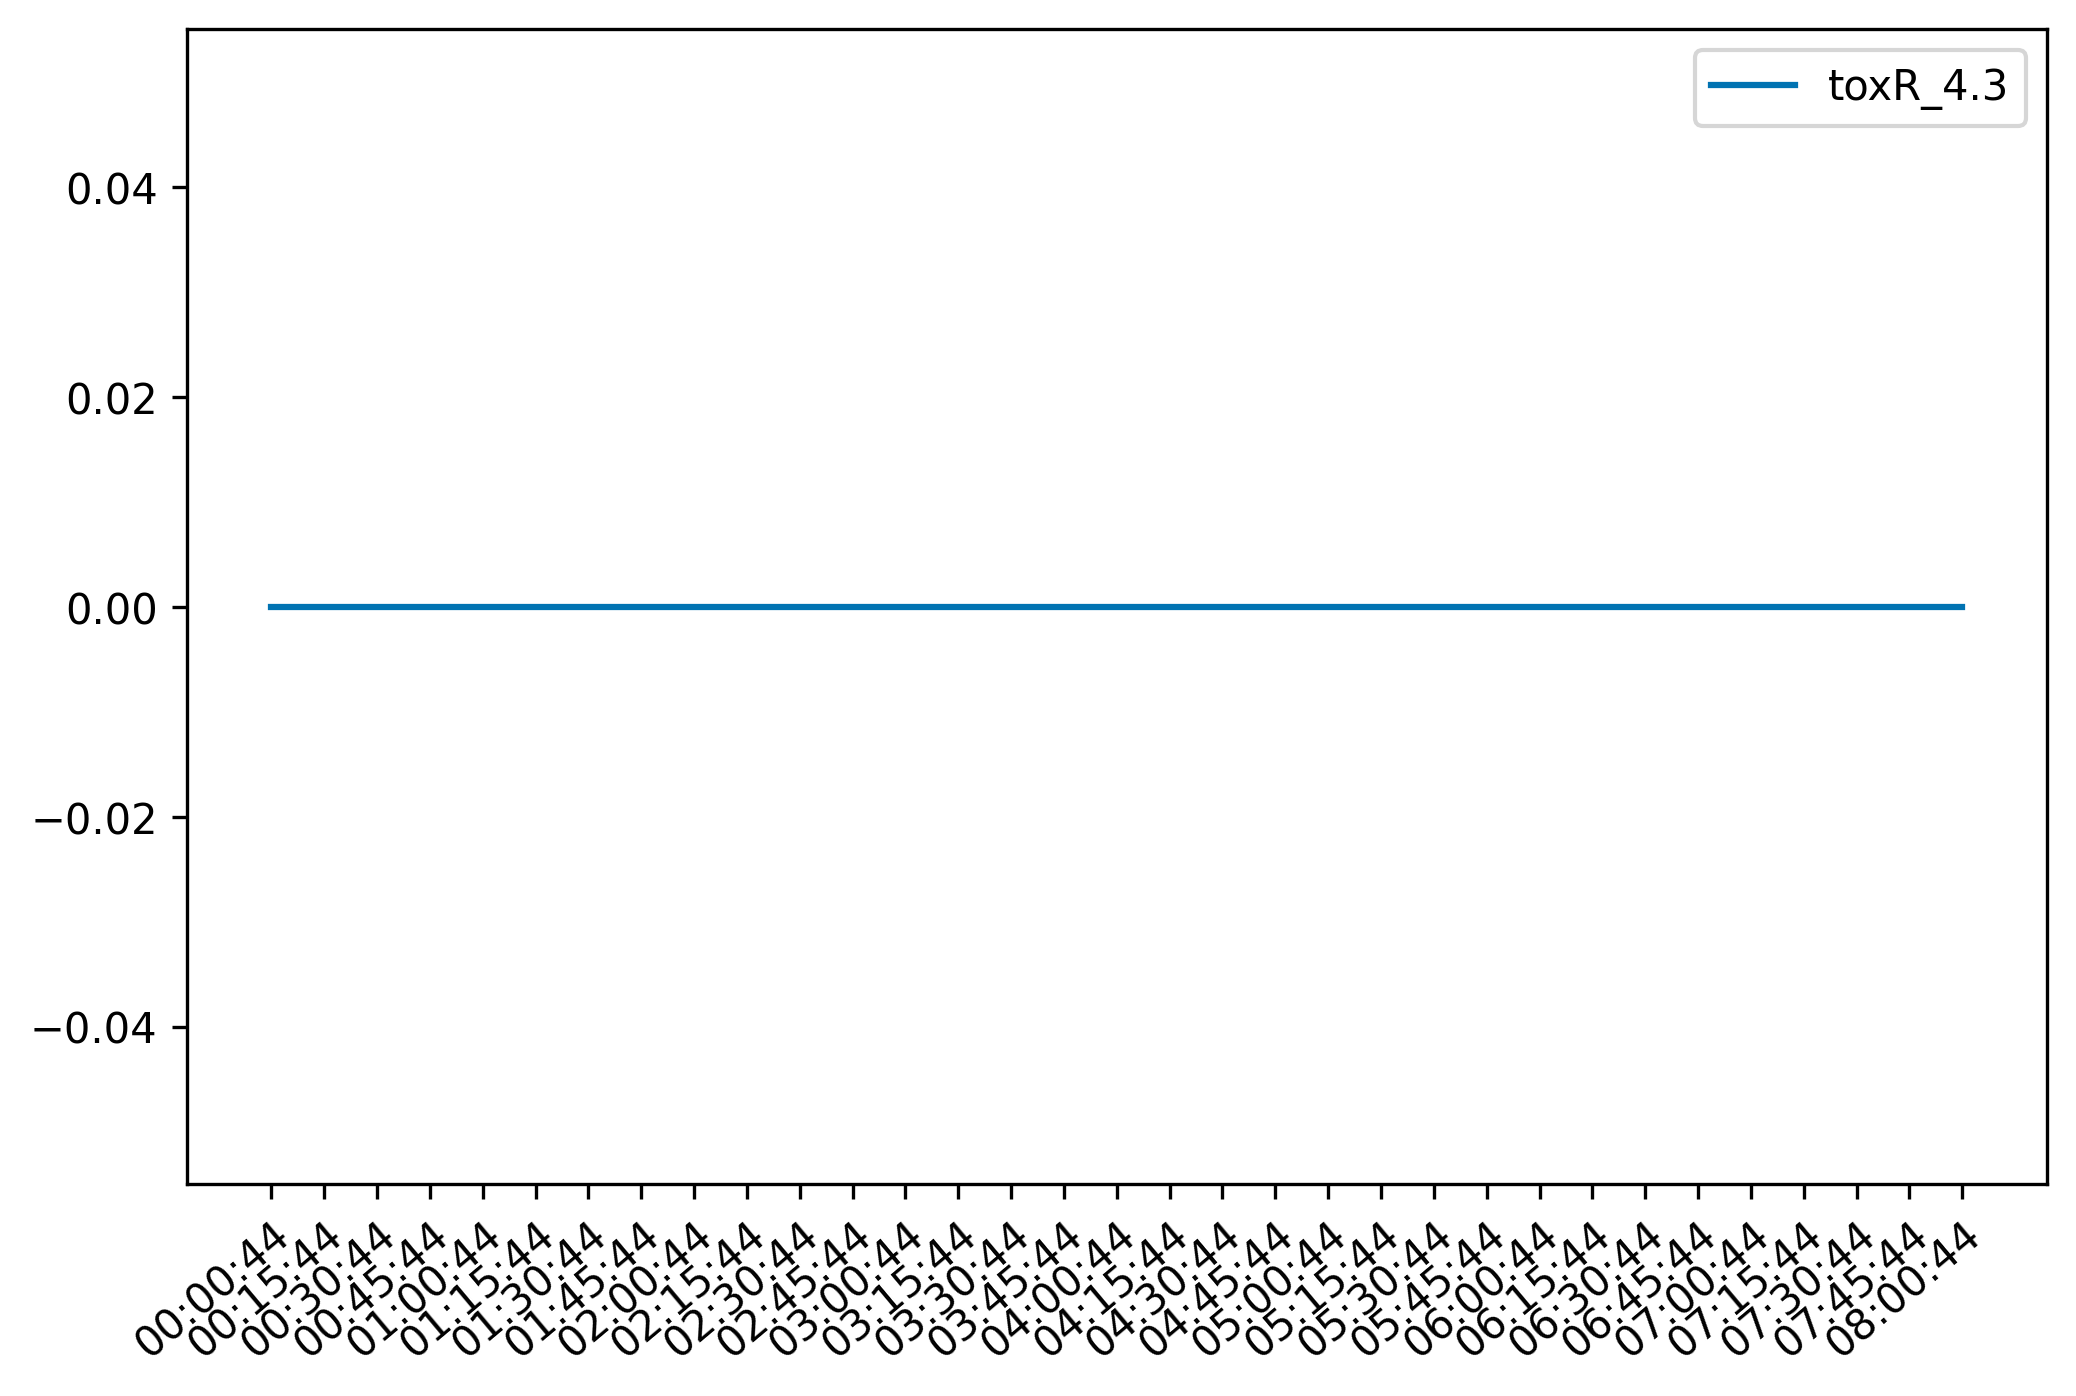

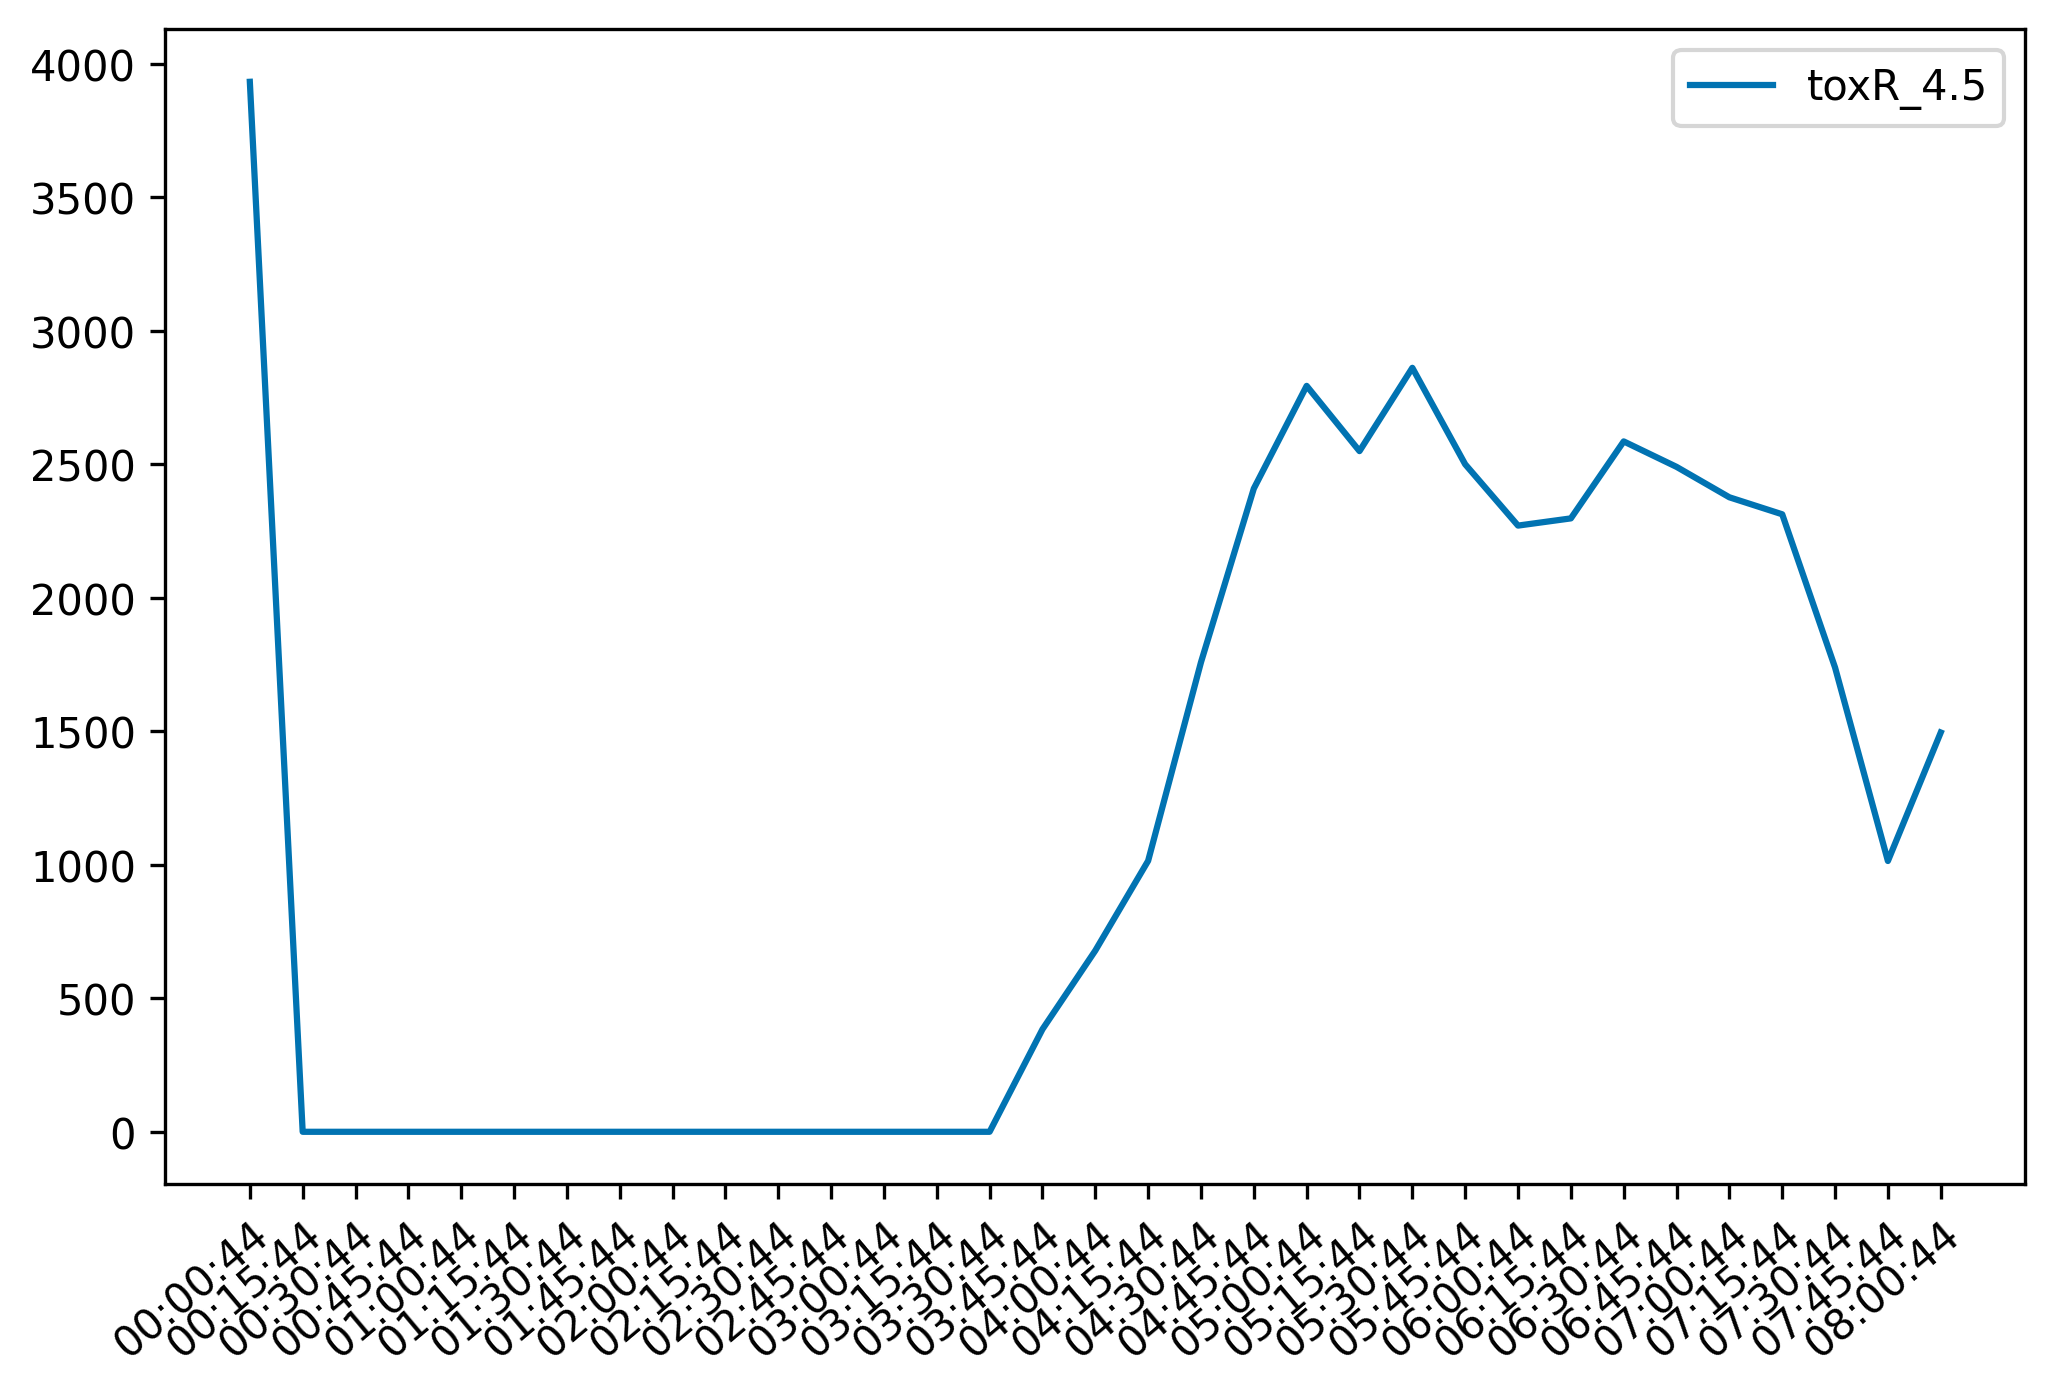

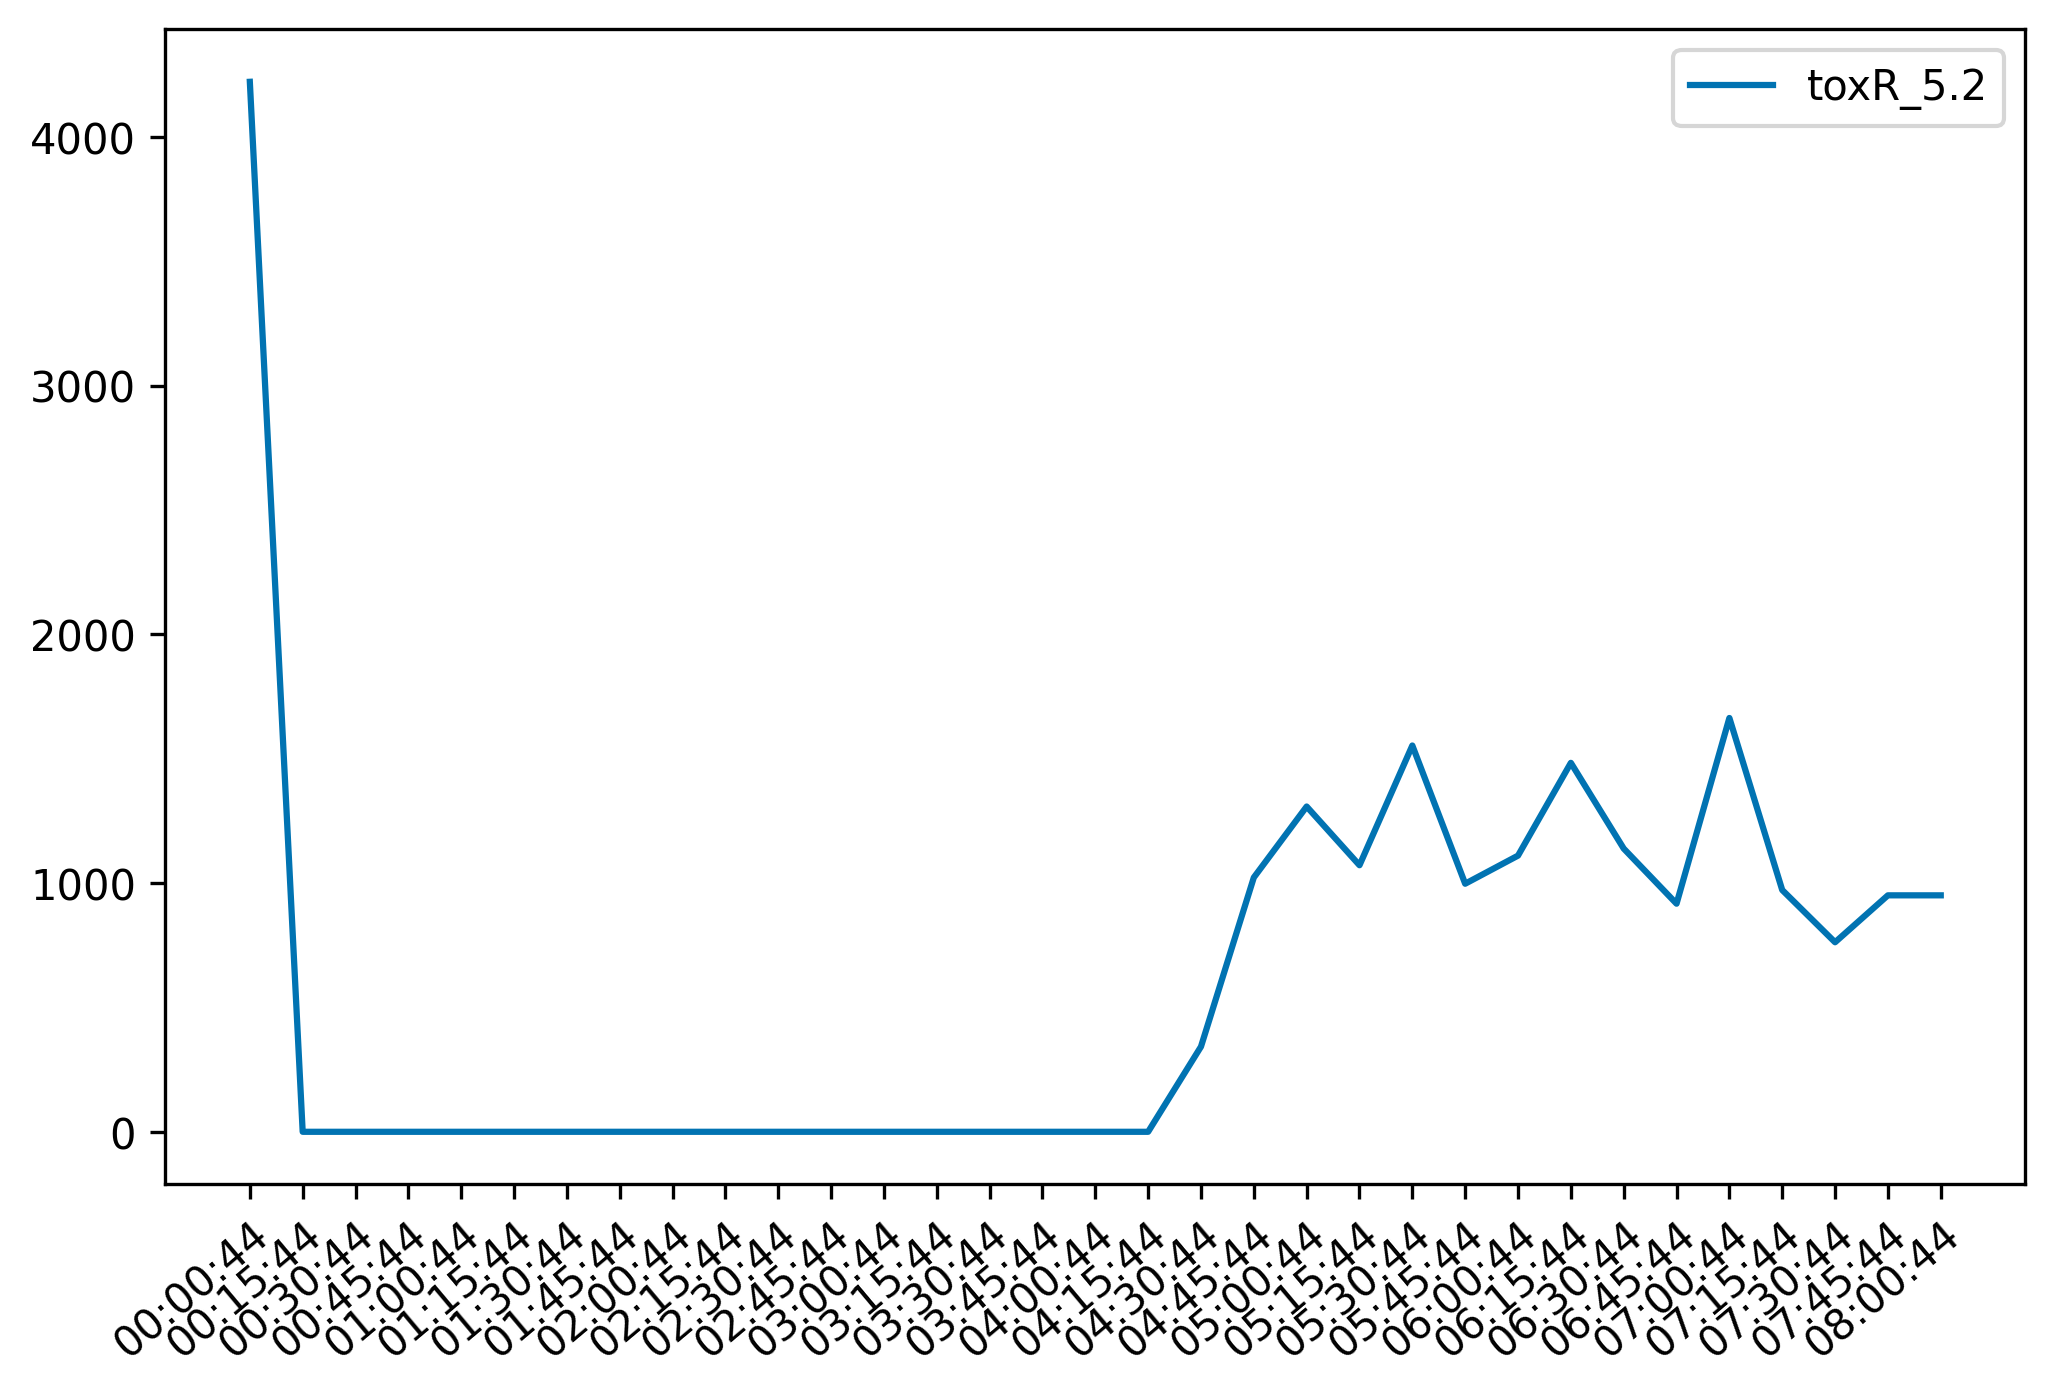

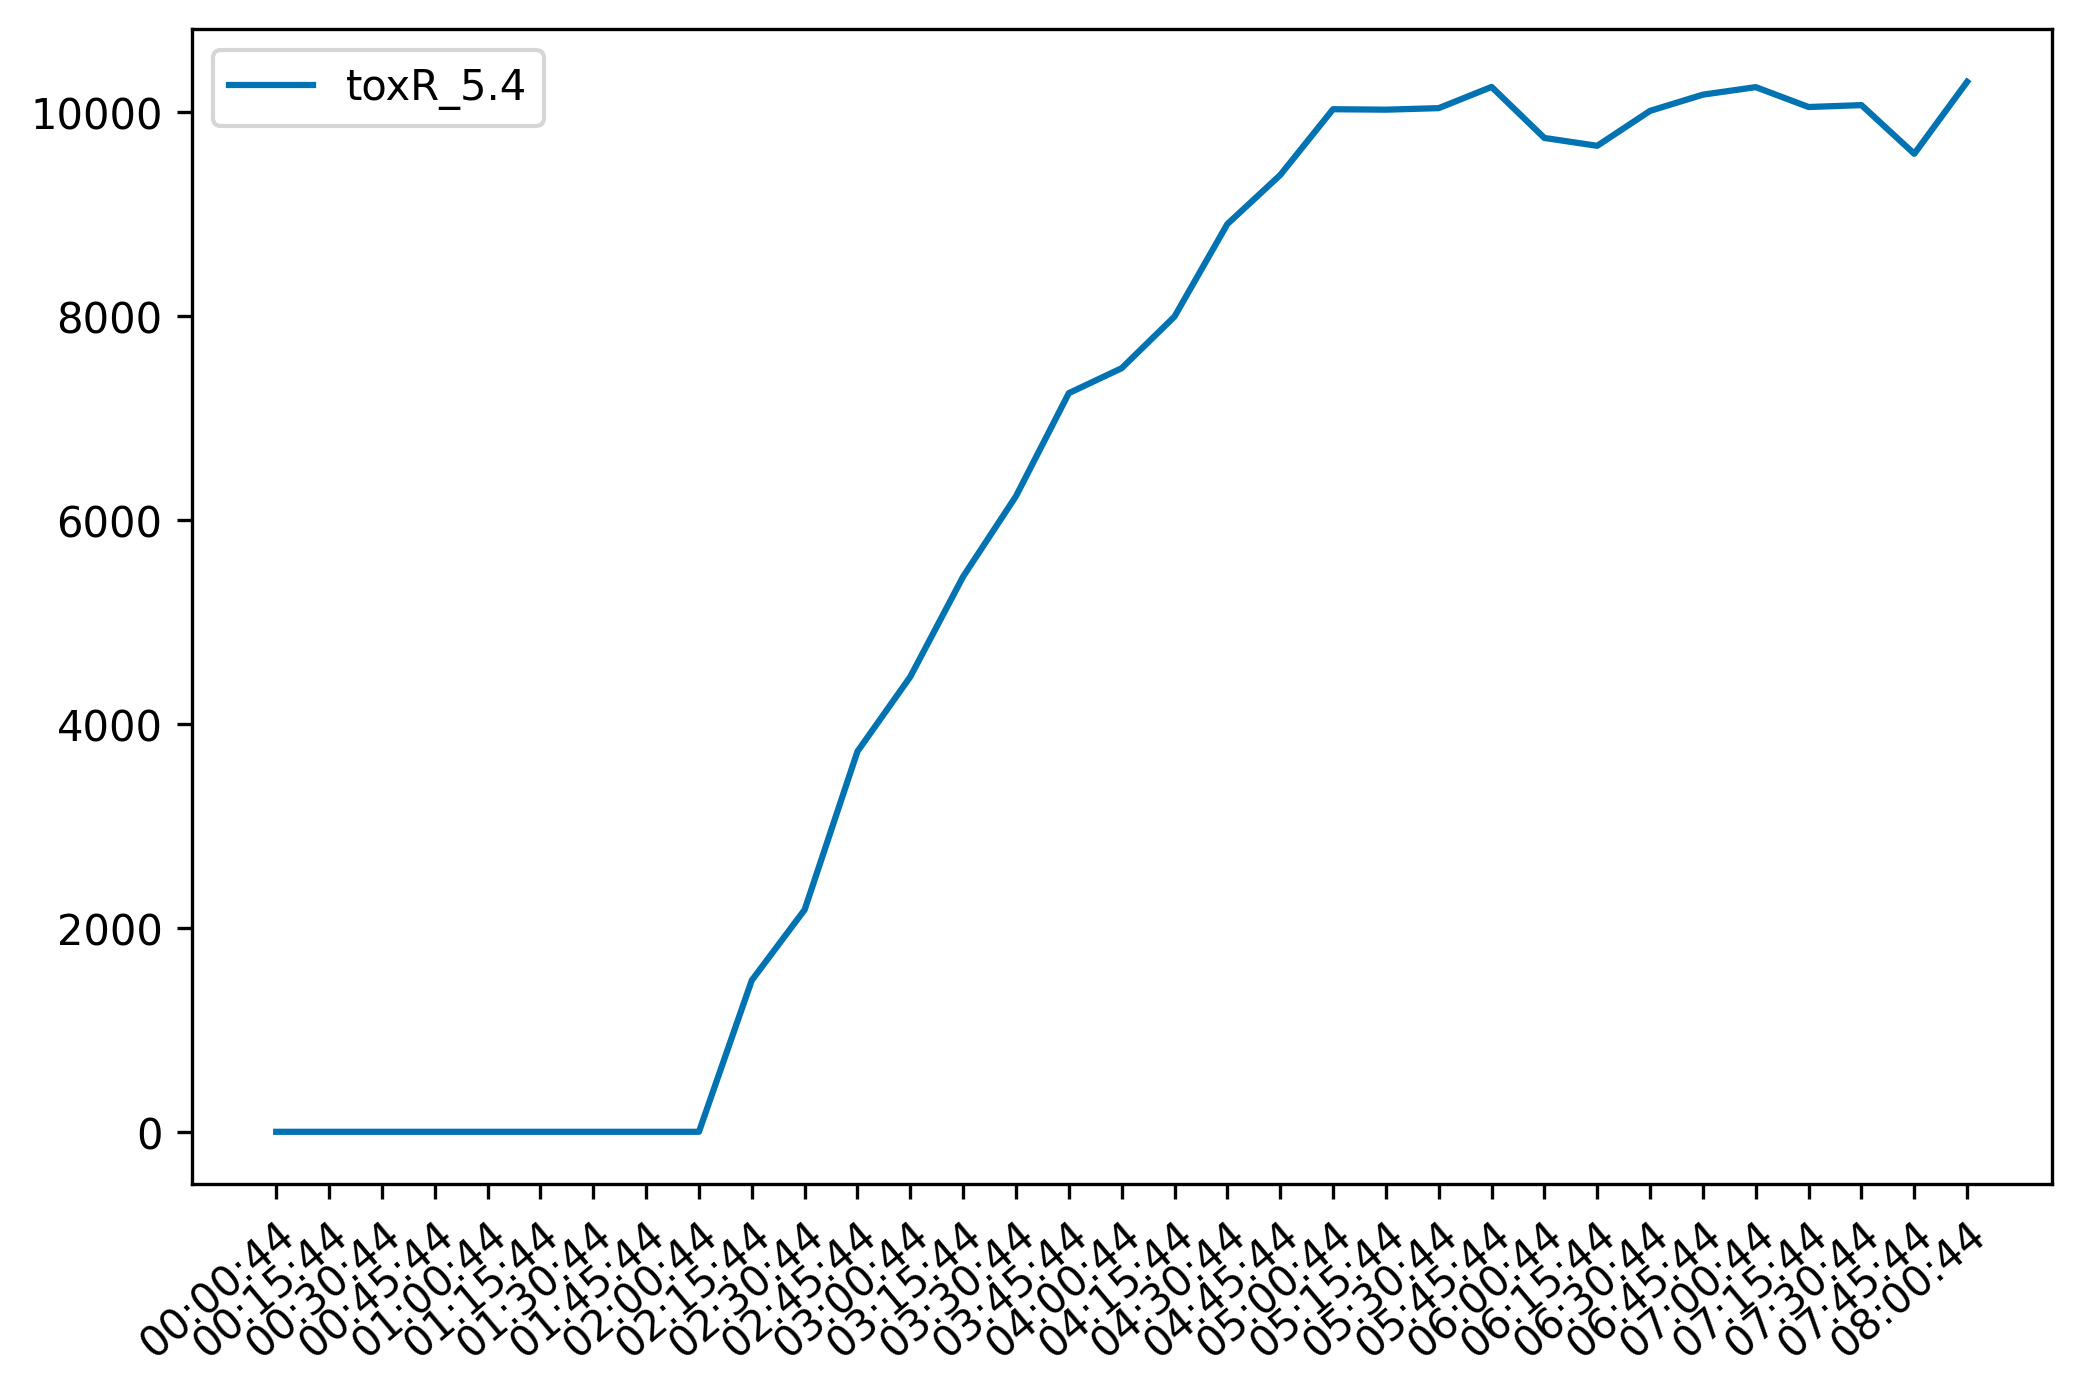

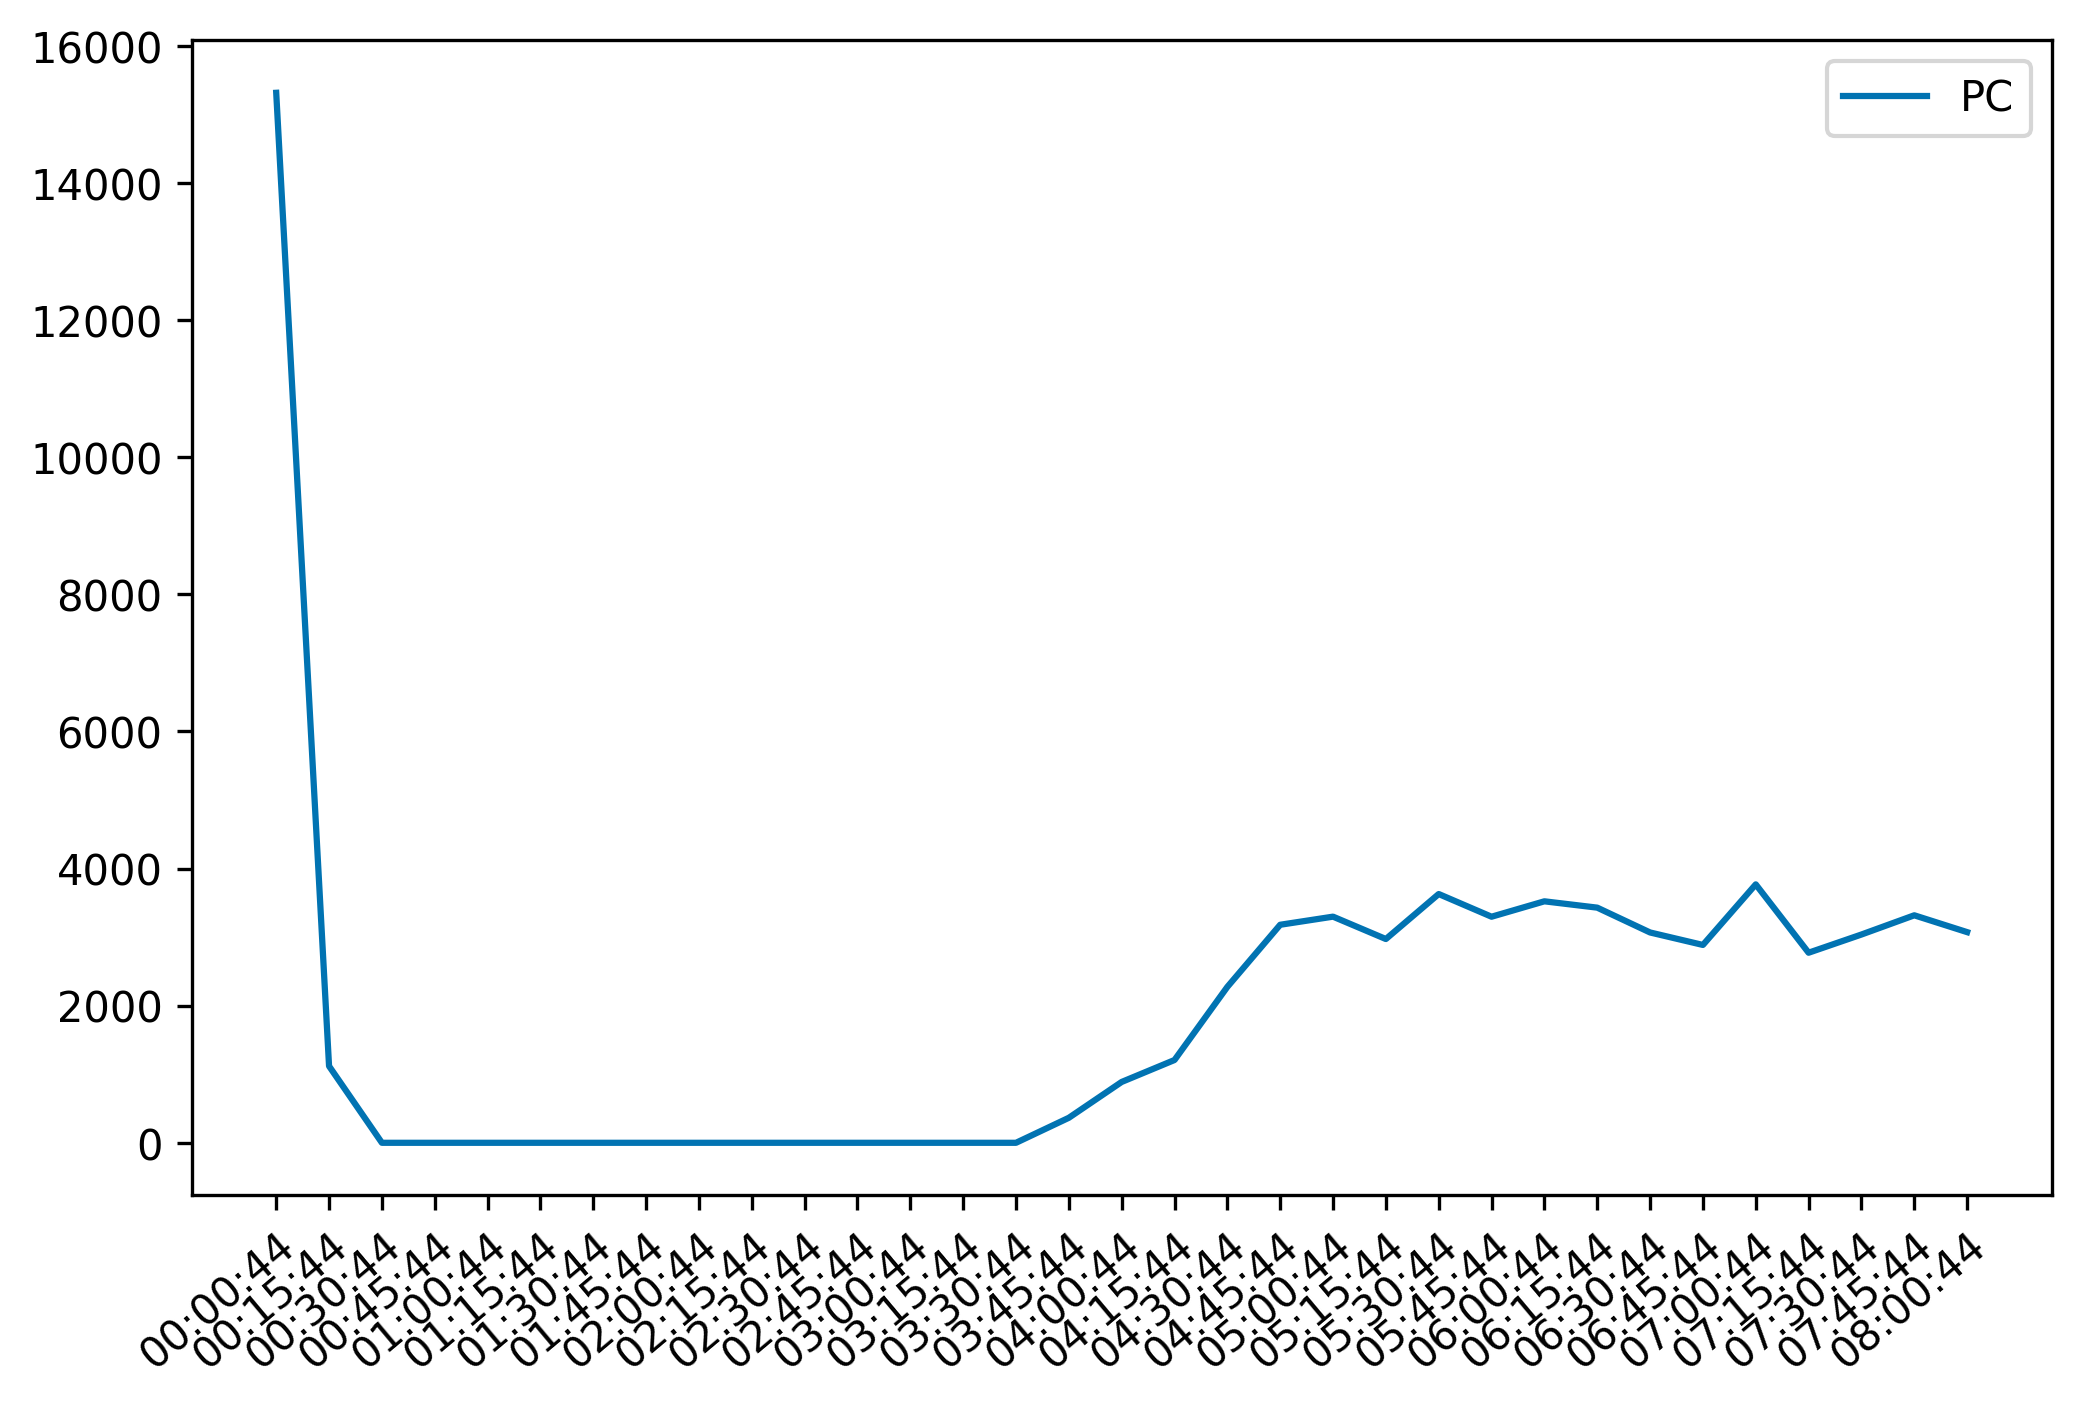

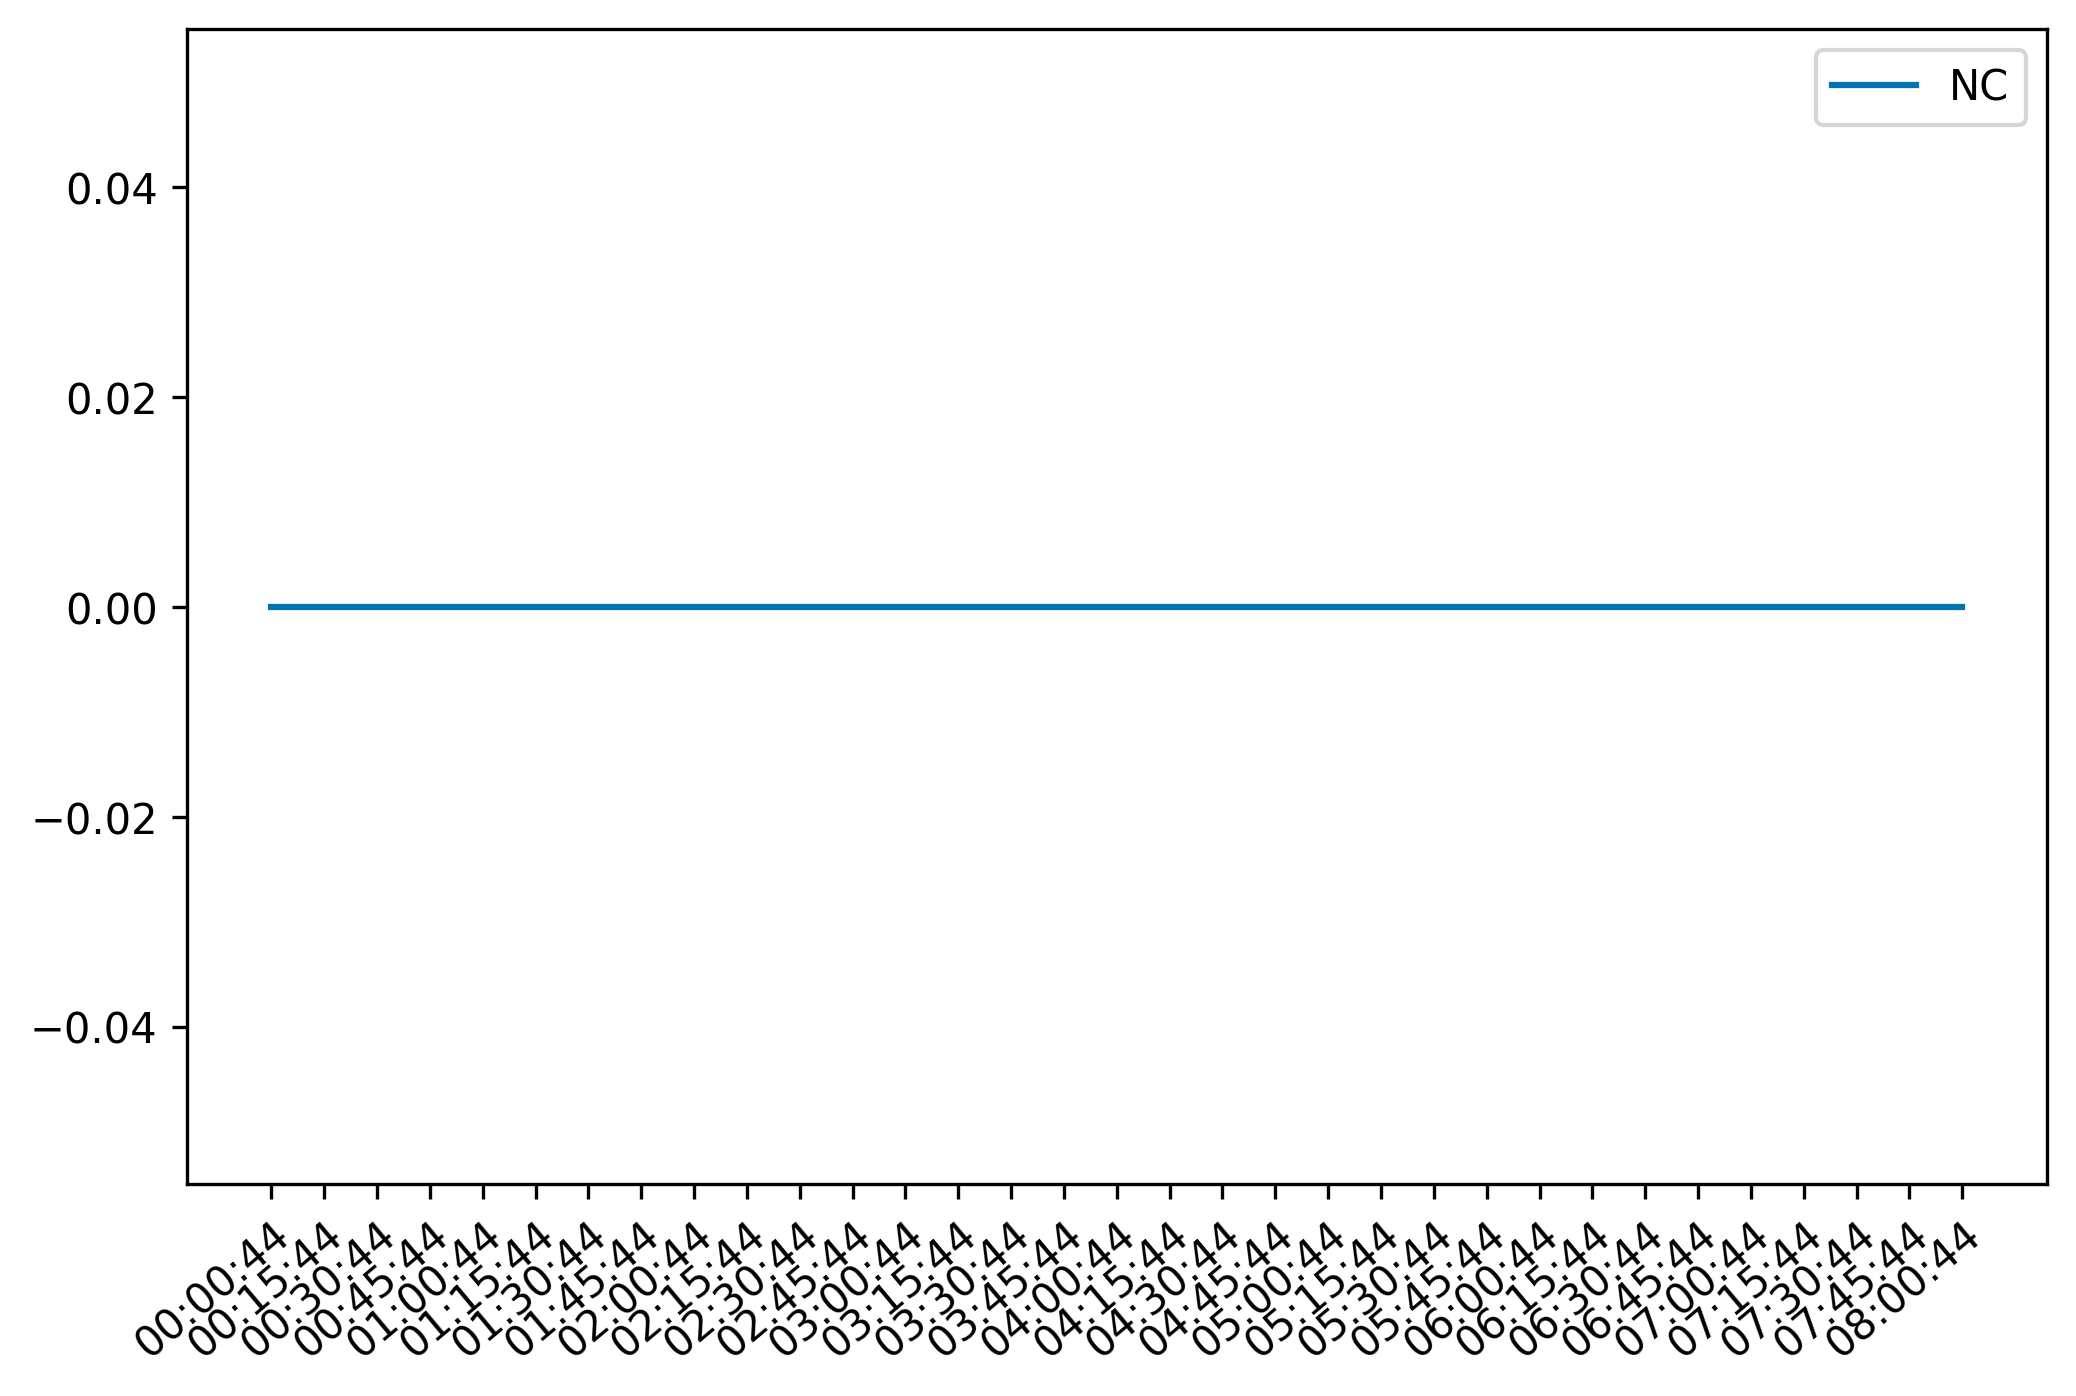

TypeError: no numeric data to plot

In [38]:
for i in targets.columns:
    targets[i].plot(label=i)
    plt.legend()
    # replace the ticks
    # changing the rotation parameter (angle) will tilt the names 
    plt.xticks(targets.index.values,targets.Time,rotation=40,rotation_mode="anchor",ha='right')
    plt.show()

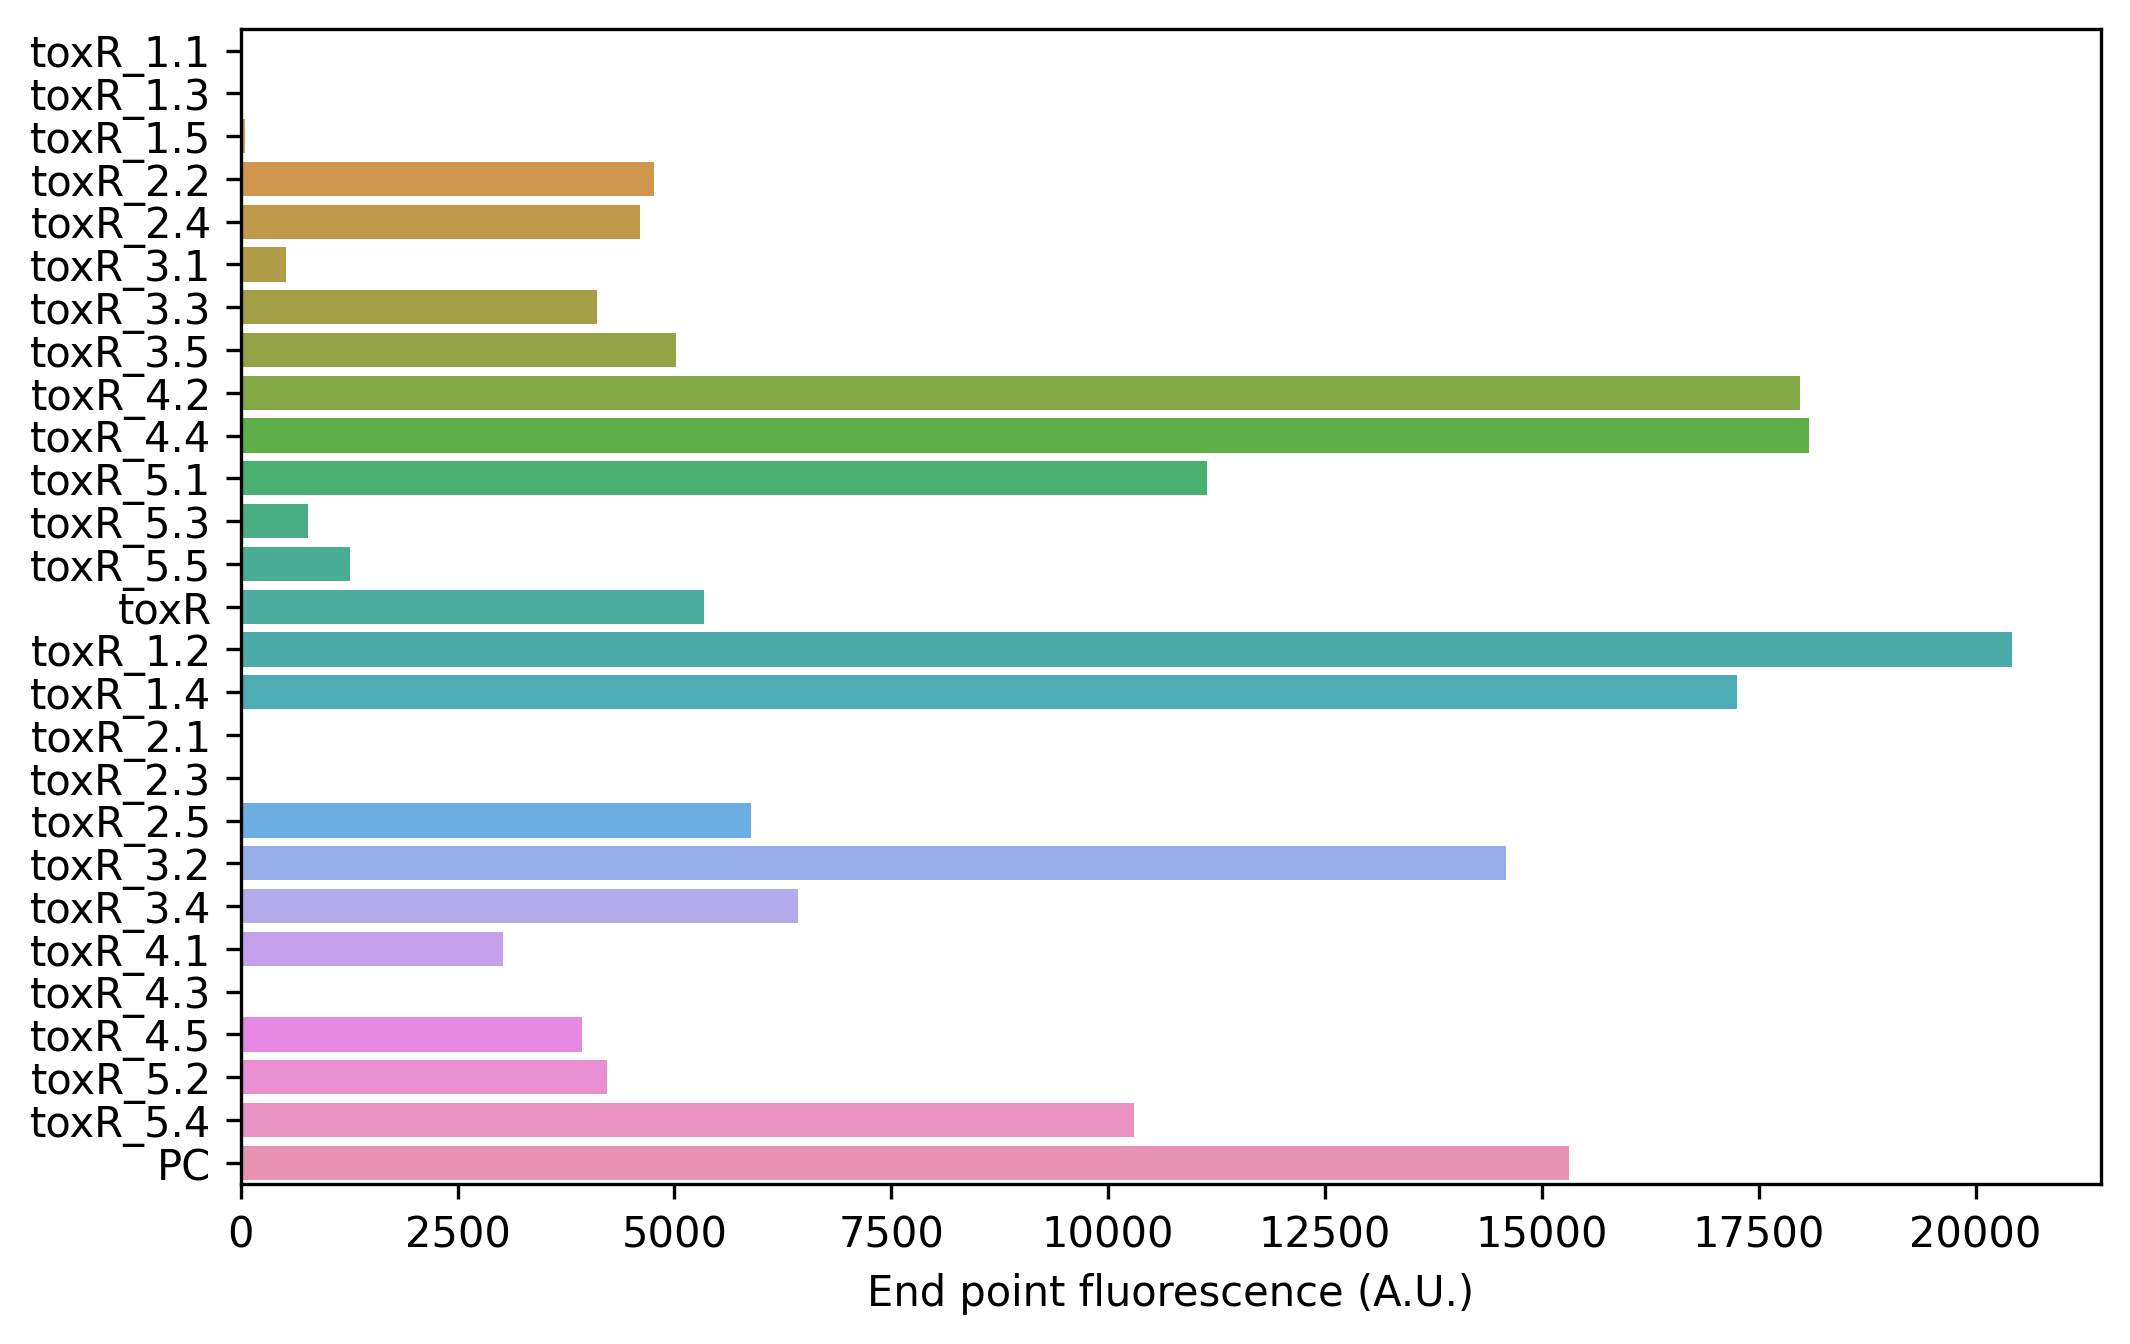

In [40]:
targ = targets.copy()

targ.drop(sd,axis=1,inplace=True)
targ.drop('Time',axis=1,inplace=True)

df = endpoint(targ)
sns.barplot(data=df, orient = 'h')
plt.xlabel('End point fluorescence (A.U.)')
#plt.savefig(path+'all_seq.png',dpi=300)
plt.show()

## Find conditions that did not work

In [8]:
df_0 = df[df ==0]
df_0 = df_0.dropna(axis=1)

list(df_0.columns)

['ToxRm10',
 'Synthetic DNA full',
 '1nM_Trigopus',
 '16s03',
 '16s04',
 '60s',
 '1nM_ToxR',
 'ToxRm4',
 'ToxRm6',
 'ToxRm8',
 '1nM_DnaJ07']

## Make a dataframe with only positive targets

In [9]:
pos_targ = targets.copy()

pos_targ.drop(df_0,axis=1,inplace=True)

pos_targ.drop(sd,axis=1,inplace=True)

pos_targ.drop('Time',axis=1,inplace=True)


pos_targ.head()

PositiveC  100nM_Trigopus        SD  Synthetic DNA  10nM_Trigopus  IL17  \
0        0.0             0.0  0.000000       0.000000            0.0   0.0   
1        0.0             0.0  0.000000       0.000000            0.0   0.0   
2        0.0             0.0  0.090476       0.000000            0.0   0.0   
3        0.0             0.0  1.211587       0.000000            0.0   0.0   
4        0.0             0.0  1.891746       0.507302            0.0   0.0   

   40s  100µM_ToxR      EF1a  DnaJ07  ...    DnaJ09  DnaJ10  flaA      ToxR  \
0  0.0    0.000000  0.000000     0.0  ...  0.000000     0.0   0.0  0.000000   
1  0.0    0.000000  0.000000     0.0  ...  0.000000     0.0   0.0  0.000000   
2  0.0    0.000000  0.000000     0.0  ...  0.000000     0.0   0.0  0.000000   
3  0.0    0.000000  0.526190     0.0  ...  0.000000     0.0   0.0  0.660476   
4  0.0    0.376825  1.000635     0.0  ...  0.193651     0.0   0.0  1.126190   

   100nM_ToxR    ToxRm1  10nM_ToxR  ToxRm2  100nM_DnaJ07  10nM_DnaJ07  
0    0.000000  0.000000        0.0     0.0           0.0          0.0  
1    0.000000  0.000000        0.0     0.0           0.0          0.0  
2    0.000000  0.000000        0.0     0.0           0.0          0.0  
3    0.000000  0.506190        0.0     0.0           0.0          0.0  
4    0.407937  1.189048        0.0     0.0           0.0          0.0  

[5 rows x 22 columns]

In [10]:
n = [x for x in pos_targ.columns if 'nM' not in x and 'µM' not in x and 'ToxRm' not in x 
     and 'DnaJ10' not in x and 'PositiveC' not in x and '40s' not in x]
print(n)

['SD', 'Synthetic DNA', 'IL17', 'EF1a', 'DnaJ07', 'Tigriopus', 'NC ', 'DnaJ09', 'flaA', 'ToxR']


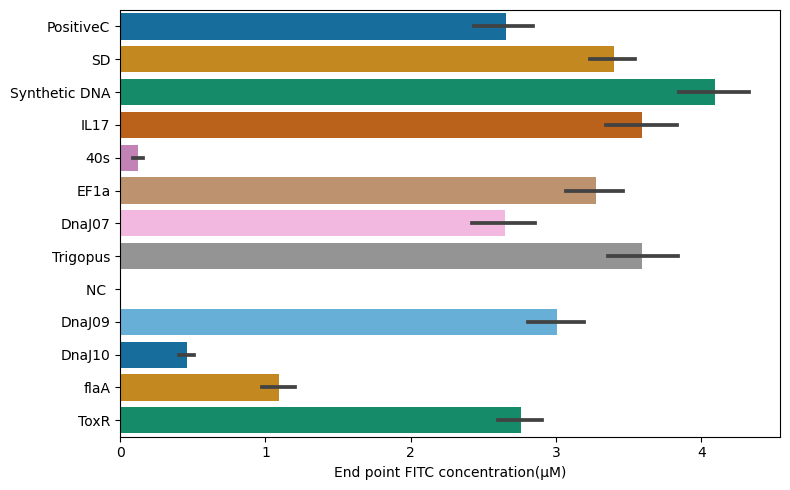

In [11]:
sns.barplot(data=pos_targ[n], orient = 'h',palette='colorblind')
plt.xlabel("End point FITC concentration(µM)")
plt.tight_layout()
plt.savefig(path+"all_pos_seq_clearer.png",dpi=300)

## Making a dataframe for presentation figure

In [11]:
targsd = targets.copy(deep = True)

m = [x for x in targsd.columns if 'nM' not in x and 'µM' not in x and 'ToxRm' not in x and 'sd' in x and 'DnaJ10' not in x
    and '40s' not in x]


targsd = targsd[m]


dfsd = pd.DataFrame(targsd.iloc[-1]).T

dfsd.drop(['16s03_sd','16s04_sd','60s_sd','Synthetic DNA full_sd','NC _sd','PositiveC_sd'],axis=1,inplace=True)

dfsd



#targets[m]

SD_sd  Synthetic DNA_sd   IL17_sd   EF1a_sd  DnaJ07_sd  Tigriopus_sd  \
96  0.99936          0.317384  0.643123  0.486105    1.00471      0.417095   

    DnaJ09_sd  flaA_sd   ToxR_sd  
96   0.458893  0.32658  0.888029

               End_Point        sd            Organism
Synthetic DNA   4.856825  0.317384  Synthetic sequence
Tigriopus       4.394127  0.417095           Tigriopus
IL17            4.379524  0.643123              Oyster
SD              3.892222  0.999360              Oyster
EF1a            3.858254  0.486105              Mussel


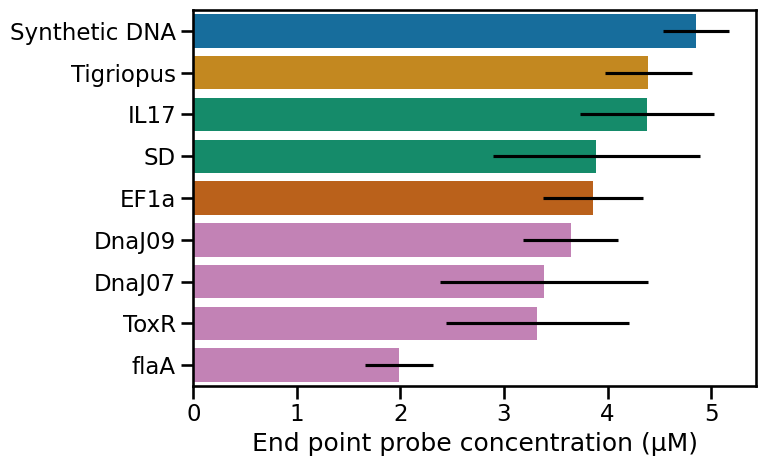

In [20]:
sns.set_context('talk')
fi = endpoint(pos_targ[n]).T

fi['sd'] = dfsd.iloc[0].values

fi['Organism'] = ['Oyster','Synthetic sequence','Oyster','Mussel',
              'V.aestuarianus','Tigriopus','V.aestuarianus',
            'V.aestuarianus','V.aestuarianus']

fi.rename(columns={0:'End_Point'},inplace=True)

fi.sort_values(by=['Organism'],inplace=True)

fi.sort_values(by=['End_Point'],inplace=True,ascending=False)

print(fi.head()) 

sns.barplot(x=fi.End_Point,y=fi.index, orient = 'h',palette='colorblind',hue=fi.Organism,dodge=False,xerr=fi.sd)
plt.xlabel('End point probe concentration (µM)')
#plt.legend(bbox_to_anchor=(0.9, 0.75),fancybox=True, shadow=True,title='Organism')
plt.tight_layout()
plt.legend('',frameon=False)
plt.savefig('../images/SHERLOCK/figure_all_targ.png',dpi=300)
plt.show()

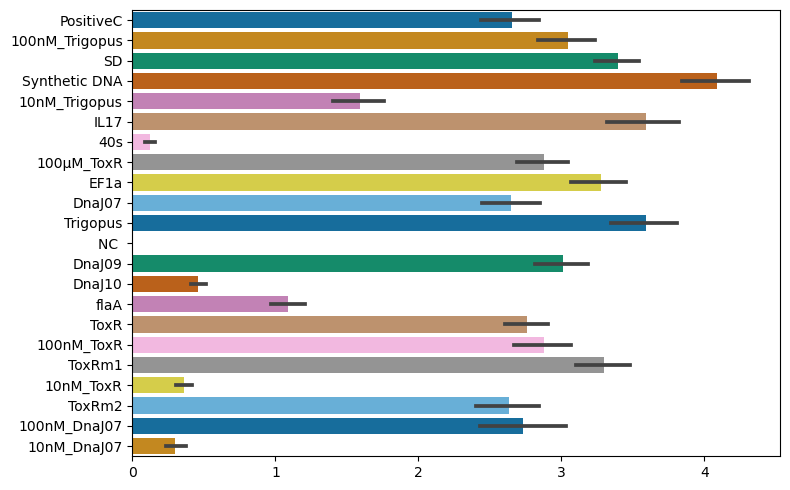

In [25]:
sns.barplot(data=pos_targ, orient = 'h',palette='colorblind')
plt.tight_layout()
#plt.savefig(path+"all_pos_seq.png",dpi=300)

## ToxR mutation

['ToxR', 'ToxRm1_sd', 'ToxRm2_sd', 'ToxRm4_sd', 'ToxRm6_sd', 'ToxRm8_sd', 'ToxRm10_sd']
['ToxR', 'ToxRm1', 'ToxRm2', 'ToxRm4', 'ToxRm6', 'ToxRm8', 'ToxRm10']


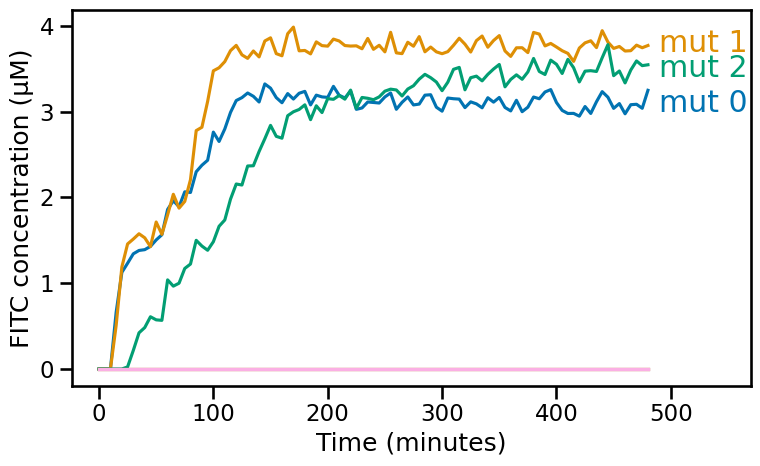

In [47]:
sns.set_context('talk')

tox = [x for x in targets if "ToxRm" in x and "ToxR" in x and "_sd" not in x]
tox.insert(0,'ToxR')
#print(tox)
#tox.pop()

sd_tox = [x for x in targets if "ToxR" in x and "ToxRm" in x and "_sd" in x ]
sd_tox.insert(0,'ToxR')
sd_tox = sorted(sd_tox,key=len)
print(sd_tox)
#sd_tox.pop(0)

counter = 0 

print(sorted(tox,key=len))

for i in sorted(tox,key=len):
    sns.lineplot(targets.Time,targets[i])
    #plt.errorbar(targets.Time,targets[i],yerr=targets[sd_tox[counter]],label=i)
    counter+=1 
    
plt.ylabel("FITC concentration (µM)")
plt.xlabel("Time (minutes)")

plt.text(490,3,'mut 0', color = sns.color_palette('colorblind')[0],fontsize='large')
plt.text(490,3.7,'mut 1', color = sns.color_palette('colorblind')[1],fontsize='large')
plt.text(490,3.4,'mut 2', color = sns.color_palette('colorblind')[2],fontsize='large')


#plt.legend(['ToxR','m1','m2','m4','m6','m8','m10'],bbox_to_anchor=(0.9, 0.4),shadow=True)
plt.xlim(-24.0, 570.0)
plt.tight_layout()
plt.savefig(path+'mutation.png',dpi=300)
plt.show()


## Dilutions

### ToxR

['100µM_ToxR', '100nM_ToxR', '10nM_ToxR', '1nM_ToxR']
['100µM_ToxR_sd', '100nM_ToxR_sd', '10nM_ToxR_sd', '1nM_ToxR_sd']


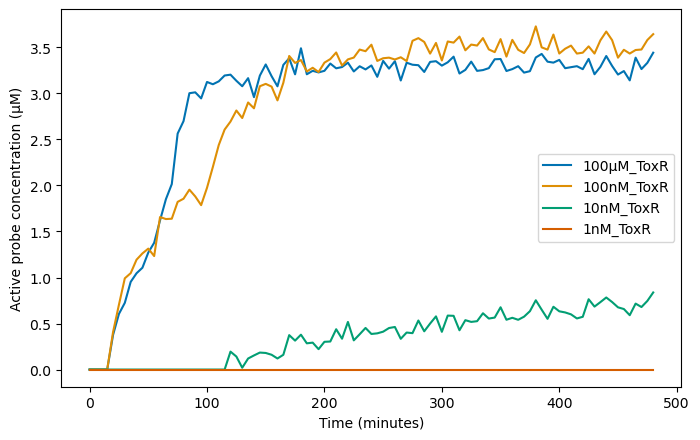

In [33]:
tox = [x for x in targets if "ToxR" in x and "ToxRm" not in x and "_sd" not in x and 'ToxR_f' not in x]
print(tox)

sd_tox = [x for x in targets if "ToxR" in x and "ToxRm" not in x and "sd" in x and 'ToxR_f' not in x ]
print(sd_tox)

counter = 0 

for i in tox:
    sns.lineplot(targets.Time,targets[i],label=i)
    #plt.errorbar(targets.Time,targets[i],yerr=targets[sd_tox[counter]],label=i)
    counter+=1 
    
plt.ylabel("Active probe concentration (µM)")
plt.xlabel("Time (minutes)")
plt.legend()
#plt.savefig(path+'toxR_dilution.png',dpi=300)
plt.show()

### DNAJ

['DnaJ07', '100nM_DnaJ07', '10nM_DnaJ07', '1nM_DnaJ07']
['DnaJ07_sd', '100nM_DnaJ07_sd', '10nM_DnaJ07_sd', '1nM_DnaJ07_sd']


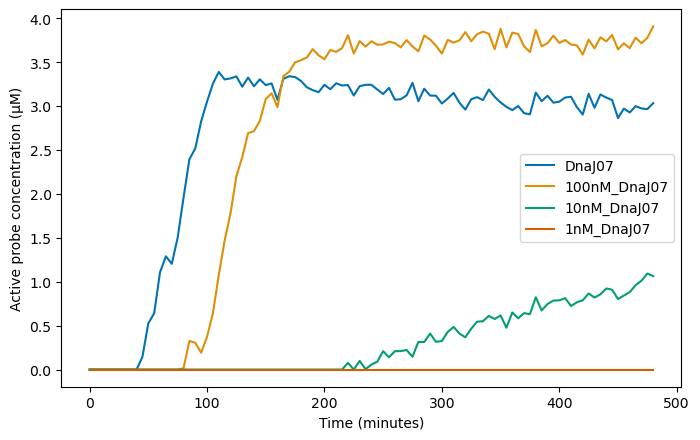

In [36]:
dnaj = [x for x in targets if "DnaJ07" in x  and "_sd" not in x ]
print(dnaj)

sd_dnaj = [x for x in targets if "DnaJ07" in x  and "_sd" in x]
print(sd_dnaj)

counter = 0 

for i in dnaj:
    sns.lineplot(targets.Time,targets[i],label=i)
    #plt.errorbar(targets.Time,targets[i],yerr=targets[sd_dnaj[counter]],label=i)
    counter+=1 
    
plt.ylabel("Active probe concentration (µM)")
plt.xlabel("Time (minutes)")
plt.legend()
plt.savefig(path+'DnaJ_dilution.png',dpi=300)
plt.show()

### Trigriopus

['100nM_Trigopus', '10nM_Trigopus', '1nM_Trigopus', 'Trigopus']
['100nM_Trigopus_sd', '10nM_Trigopus_sd', '1nM_Trigopus_sd', 'Trigopus_sd']


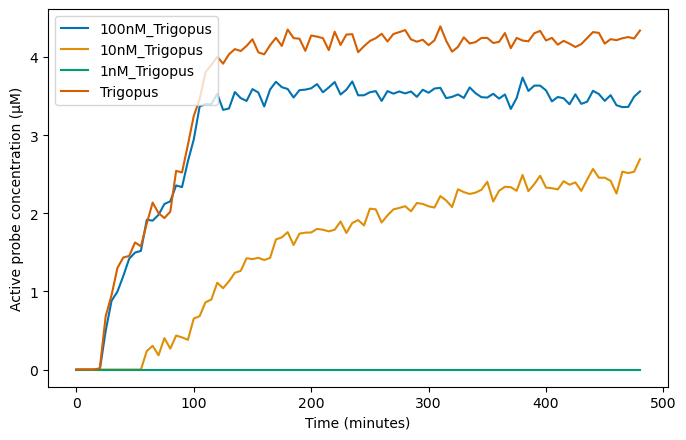

In [39]:
trigopus = [x for x in targets if "Trigopus" in x  and "_sd" not in x ]
print(trigopus)

sd_trigopus = [x for x in targets if "Trigopus" in x  and "_sd" in x]
print(sd_trigopus)

counter = 0 

for i in trigopus:
    sns.lineplot(targets.Time,targets[i],label=i)
    #plt.errorbar(targets.Time,targets[i],yerr=targets[sd_trigopus[counter]],label=i)
    counter+=1 
    
plt.ylabel("Active probe concentration (µM)")
plt.xlabel("Time (minutes)")
plt.legend()
plt.savefig(path+'trigopus_dilution.png',dpi=300)
plt.show()

## Look at individual curves

In [7]:
trip = px.excelreader('../results/SHERLOCK/all_targets/220920_sherlock.xlsx',70,"YES")

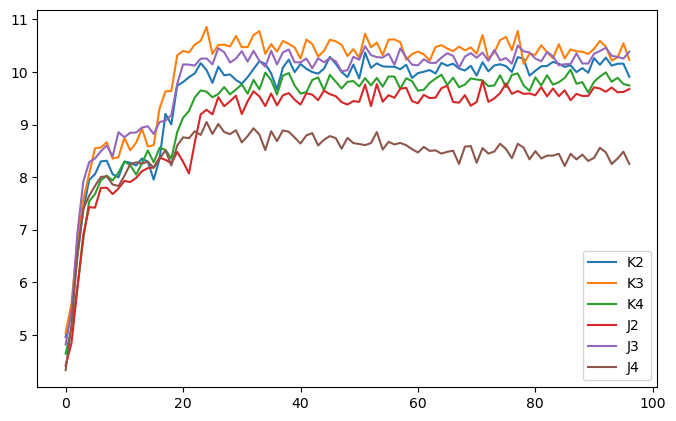

In [37]:
trip[['K2', 'K3', 'K4','J2', 'J3', 'J4']].plot()

#plt.title('ToxR')
plt.legend()
#plt.savefig(path+'ali_2.png',dpi=300)
plt.show()


## Export dataframe 

In [5]:
#pos_targ.to_csv('../results/SHERLOCK/all_targets/pos_targets.csv')